# Inizializzazione

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Biochemical = pd.read_csv("Biochemical_parameters.csv")
Diagnostics = pd.read_csv("Diagnostics.csv")
Glucose = pd.read_csv("Glucose_measurements.csv")
Patient = pd.read_csv("Patient_info.csv")

## Patient

In [19]:
Patient

Patient_ID Sex  Birth_year Initial_measurement_date  \
0    LIB193263   M        1965               2020-06-09   
1    LIB193264   F        1975               2020-06-10   
2    LIB193265   F        1980               2019-01-27   
3    LIB193266   M        1998               2020-10-08   
4    LIB193267   F        1980               2020-06-09   
..         ...  ..         ...                      ...   
731  LIB194162   M        1999               2021-03-23   
732  LIB194163   M        1984               2021-09-09   
733  LIB194164   F        1991               2020-06-25   
734  LIB194165   F        1986               2021-05-12   
735  LIB194166   F        1995               2021-03-23   

    Final_measurement_date  Number_of_days_with_measures  \
0               2022-03-19                           648   
1               2022-03-19                           326   
2               2022-03-19                           581   
3               2022-03-21                           500   
4               2022-03-17                           647   
..                     ...                           ...   
731             2022-03-19                           361   
732             2022-03-19                           192   
733             2022-03-18                           632   
734             2022-03-21                           259   
735             2022-03-17                           315   

     Number_of_measurements Initial_biochemical_parameters_date  \
0                     60097                                 NaN   
1                     26786                                 NaN   
2                     46575                          2018-09-05   
3                     55307                          2020-08-21   
4                     55500                          2018-04-30   
..                      ...                                 ...   
731                   33439                          2020-12-15   
732                   17754                          2020-01-09   
733                   58349                          2020-03-06   
734                   23862                          2021-04-14   
735                   33371                          2020-12-10   

    Final_biochemical_parameters_date  Number_of_biochemical_parameters  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                          2021-10-01                             120.0   
3                          2022-02-22                              74.0   
4                          2022-01-24                             177.0   
..                                ...                               ...   
731                        2020-12-15                              12.0   
732                        2022-01-31                              64.0   
733                        2022-01-12                             158.0   
734                        2022-03-02                              22.0   
735                        2022-02-10                              40.0   

     Number_of_diagnostics  
0                      1.0  
1                      3.0  
2                      NaN  
3                      2.0  
4                      1.0  
..                     ...  
731                    NaN  
732                    NaN  
733                    1.0  
734                    NaN  
735                    NaN  

[736 rows x 11 columns]

Analisi delle caratteristiche e delle distribuzioni dei dati

In [22]:
Patient.info()
Patient.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient_ID                           736 non-null    object 
 1   Sex                                  736 non-null    object 
 2   Birth_year                           736 non-null    int64  
 3   Initial_measurement_date             736 non-null    object 
 4   Final_measurement_date               736 non-null    object 
 5   Number_of_days_with_measures         736 non-null    int64  
 6   Number_of_measurements               736 non-null    int64  
 7   Initial_biochemical_parameters_date  723 non-null    object 
 8   Final_biochemical_parameters_date    723 non-null    object 
 9   Number_of_biochemical_parameters     723 non-null    float64
 10  Number_of_diagnostics                511 non-null    float64
dtypes: float64(2), int64(3), object(

Birth_year  Number_of_days_with_measures  Number_of_measurements  \
count   736.000000                    736.000000              736.000000   
mean   1976.663043                    350.244565            30802.951087   
std      15.772724                    284.146680            25704.868842   
min    1936.000000                      8.000000              400.000000   
25%    1965.000000                    122.000000            10673.000000   
50%    1977.000000                    286.000000            25002.500000   
75%    1990.000000                    525.000000            45686.500000   
max    2005.000000                   1463.000000           137292.000000   

       Number_of_biochemical_parameters  Number_of_diagnostics  
count                        723.000000             511.000000  
mean                         120.998617               3.438356  
std                           87.834182               2.946519  
min                            4.000000               1.000000  
25%                           75.000000               1.000000  
50%                          107.000000               3.000000  
75%                          137.000000               4.000000  
max                          846.000000              24.000000

In [11]:
Patient.describe(include=['O'])

Patient_ID  Sex Initial_measurement_date Final_measurement_date  \
count         736  736                      736                    736   
unique        736    2                      329                    173   
top     LIB194146    F               2021-05-19             2022-03-18   
freq            1  373                       13                    144   

       Initial_biochemical_parameters_date Final_biochemical_parameters_date  
count                                  723                               723  
unique                                 271                               238  
top                             2018-02-14                        2022-03-08  
freq                                    13                                15

conto il numero di valori NaN

In [122]:
nan_mask = Patient.isna()
nan_count = nan_mask.sum()

nan_count

Patient_ID                               0
Sex                                      0
Birth_year                               0
Initial_measurement_date                 0
Final_measurement_date                   0
Number_of_days_with_measures             0
Number_of_measurements                   0
Initial_biochemical_parameters_date     13
Final_biochemical_parameters_date       13
Number_of_biochemical_parameters        13
Number_of_diagnostics                  225
dtype: int64

## Diagnostics

In [4]:
Diagnostics

Patient_ID    Code                                        Description
0     LIB193263   272.4               Other and unspecified hyperlipidemia
1     LIB193264   354.0                             Carpal tunnel syndrome
2     LIB193264  574.00  Calculus of gallbladder with acute cholecystit...
3     LIB193264  719.41                     Pain in joint, shoulder region
4     LIB193266   253.5                                 Diabetes insipidus
...         ...     ...                                                ...
1752  LIB194161   272.4               Other and unspecified hyperlipidemia
1753  LIB194161   401.9                 Unspecified essential hypertension
1754  LIB194161   435.9            Unspecified transient cerebral ischemia
1755  LIB194161     920   Contusion of face, scalp, and neck except eye(s)
1756  LIB194164   637.9  Unspecified abortion, without mention of compl...

[1757 rows x 3 columns]

In [5]:
Diagnostics.info()
Diagnostics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient_ID   1757 non-null   object
 1   Code         1757 non-null   object
 2   Description  1757 non-null   object
dtypes: object(3)
memory usage: 41.3+ KB


Patient_ID   Code                          Description
count        1757   1757                                 1757
unique        511    594                                  594
top     LIB193830  244.9  Unspecified acquired hypothyroidism
freq           24     94                                   94

In [6]:
Diagnostics['Description'].value_counts()

Description
Unspecified acquired hypothyroidism                                                                 94
Unspecified essential hypertension                                                                  68
Diabetes with ophthalmic manifestations, type II or unspecified type, not stated as uncontrolled    67
Other and unspecified hyperlipidemia                                                                43
Pure hypercholesterolemia                                                                           21
                                                                                                    ..
Other unspecified back disorders                                                                     1
Lumbosacral spondylosis without myelopathy                                                           1
Hip joint replacement                                                                                1
Mild or unspecified pre-eclampsia, delivered, with or without

In [7]:
Number_Description = Diagnostics.groupby('Patient_ID')['Description'].count()
Number_Description

Patient_ID
LIB193263    1
LIB193264    3
LIB193266    2
LIB193267    1
LIB193269    1
            ..
LIB194150    1
LIB194153    1
LIB194159    2
LIB194161    5
LIB194164    1
Name: Description, Length: 511, dtype: int64

In [8]:
Number_Description.describe()

count    511.000000
mean       3.438356
std        2.946519
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       24.000000
Name: Description, dtype: float64

## Biochemical_parameters

In [9]:
Biochemical

Patient_ID Reception_date                              Name   Value
0      LIB193265     2018-09-05                         Potassium    4.50
1      LIB193265     2018-09-05                   HDL cholesterol   64.00
2      LIB193265     2018-09-05  Gamma-glutamyl Transferase (GGT)   11.00
3      LIB193265     2018-09-05                        Creatinine    0.90
4      LIB193265     2018-09-05                           Glucose  127.00
...          ...            ...                               ...     ...
87477  LIB194166     2022-02-10                         Potassium    4.20
87478  LIB194166     2022-02-10                        Creatinine    0.82
87479  LIB194166     2022-02-10                   HDL cholesterol   71.00
87480  LIB194166     2022-02-10                     Triglycerides  182.00
87481  LIB194166     2022-02-10                 Total cholesterol  207.00

[87482 rows x 4 columns]

In [10]:
Biochemical.info()
Biochemical.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87482 entries, 0 to 87481
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      87482 non-null  object 
 1   Reception_date  87482 non-null  object 
 2   Name            87482 non-null  object 
 3   Value           87482 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.7+ MB


Value
count  87482.000000
mean      64.690070
std       89.381967
min       -4.000000
25%        4.300000
50%       24.340000
75%      124.000000
max     6446.740000

In [11]:
Biochemical.describe(include=['O'])

Patient_ID Reception_date        Name
count       87482          87482       87482
unique        723           1370          17
top     LIB193438     2021-04-14  Creatinine
freq          846            254        8495

In [12]:
nan_mask = Biochemical.isna()
nan_count = nan_mask.sum()

nan_count

Patient_ID        0
Reception_date    0
Name              0
Value             0
dtype: int64

In [13]:
number = Biochemical.groupby(['Patient_ID', 'Name']).size().reset_index(name='Count')
number

Patient_ID                        Name  Count
0      LIB193265  Alanine transaminase (GPT)     10
1      LIB193265             Albumin (urine)      2
2      LIB193265                    Chlorine     10
3      LIB193265                  Creatinine     10
4      LIB193265          Creatinine (urine)      2
...          ...                         ...    ...
10584  LIB194166                      Sodium      3
10585  LIB194166           Thyrotropin (TSH)      3
10586  LIB194166           Total cholesterol      3
10587  LIB194166               Triglycerides      3
10588  LIB194166                   Uric acid      1

[10589 rows x 3 columns]

In [14]:
number.describe(include=['O'])

Patient_ID        Name
count       10589       10589
unique        723          17
top     LIB193852  Creatinine
freq           17         723

In [15]:
number.groupby('Patient_ID')['Name'].count()

Patient_ID
LIB193265    15
LIB193266    15
LIB193267    15
LIB193268    15
LIB193272    14
             ..
LIB194162    12
LIB194163    14
LIB194164    15
LIB194165    14
LIB194166    14
Name: Name, Length: 723, dtype: int64

In [16]:
number.groupby(['Name'])['Count'].sum()

Name
Alanine transaminase (GPT)          7134
Albumin (urine)                     4283
Chlorine                            1935
Creatinine                          8495
Creatinine (urine)                  4412
Gamma-glutamyl Transferase (GGT)    6085
Glucose                             8349
Glycated hemoglobin (A1c)           4776
HDL cholesterol                     5062
IA2 ANTIBODIES                        66
Insulin                               64
Potassium                           7853
Sodium                              7814
Thyrotropin (TSH)                   4570
Total cholesterol                   5954
Triglycerides                       5791
Uric acid                           4839
Name: Count, dtype: int64

#### Creatine

In [17]:
creatinine_subset = Biochemical[(Biochemical['Name'] == 'Creatinine')].copy()
creatinine_subset.drop(['Name'], axis=1, inplace=True)
creatinine_subset.describe()

Value
count  8495.000000
mean      1.044406
std       0.947799
min       0.150000
25%       0.670000
50%       0.800000
75%       1.000000
max      11.550000

In [18]:
creatinine_diagnostic = pd.merge(creatinine_subset, Diagnostics, on='Patient_ID').copy()
creatinine_diagnostic.drop(['Code'], axis=1, inplace=True)
creatinine_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-21   0.76   
1      LIB193266     2020-08-21   0.76   
2      LIB193266     2020-08-21   0.82   
3      LIB193266     2020-08-21   0.82   
4      LIB193266     2020-08-24   0.73   
...          ...            ...    ...   
29879  LIB194164     2021-08-26   0.63   
29880  LIB194164     2021-09-20   0.56   
29881  LIB194164     2021-11-19   0.56   
29882  LIB194164     2021-11-23   0.66   
29883  LIB194164     2022-01-12   0.48   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
29879  Unspecified abortion, without mention of compl...  
29880  Unspecified abortion, without mention of compl...  
29881  Unspecified abortion, without mention of compl...  
29882  Unspecified abortion, without mention of compl...  
29883  Unspecified abortion, without mention of compl...  

[29884 rows x 4 columns]

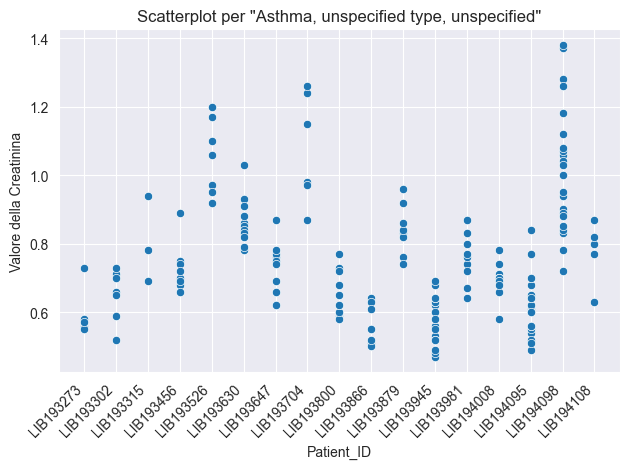

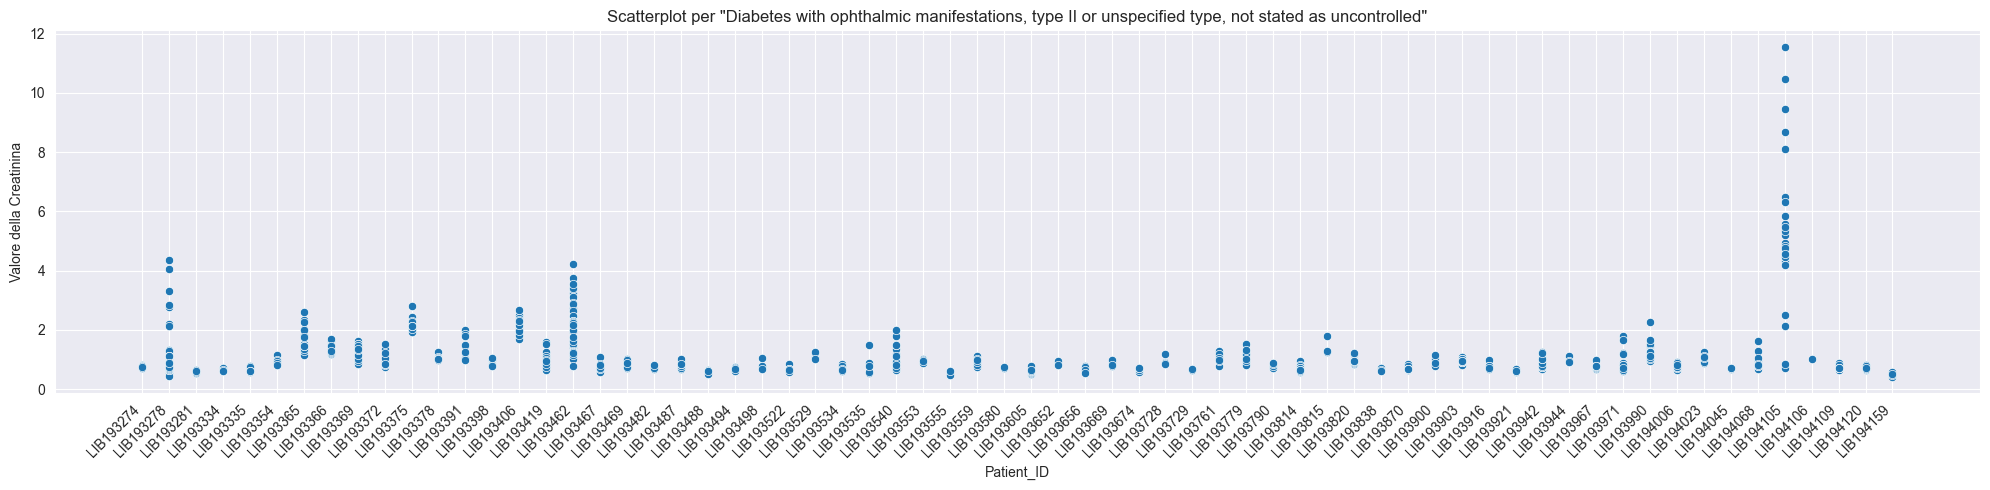

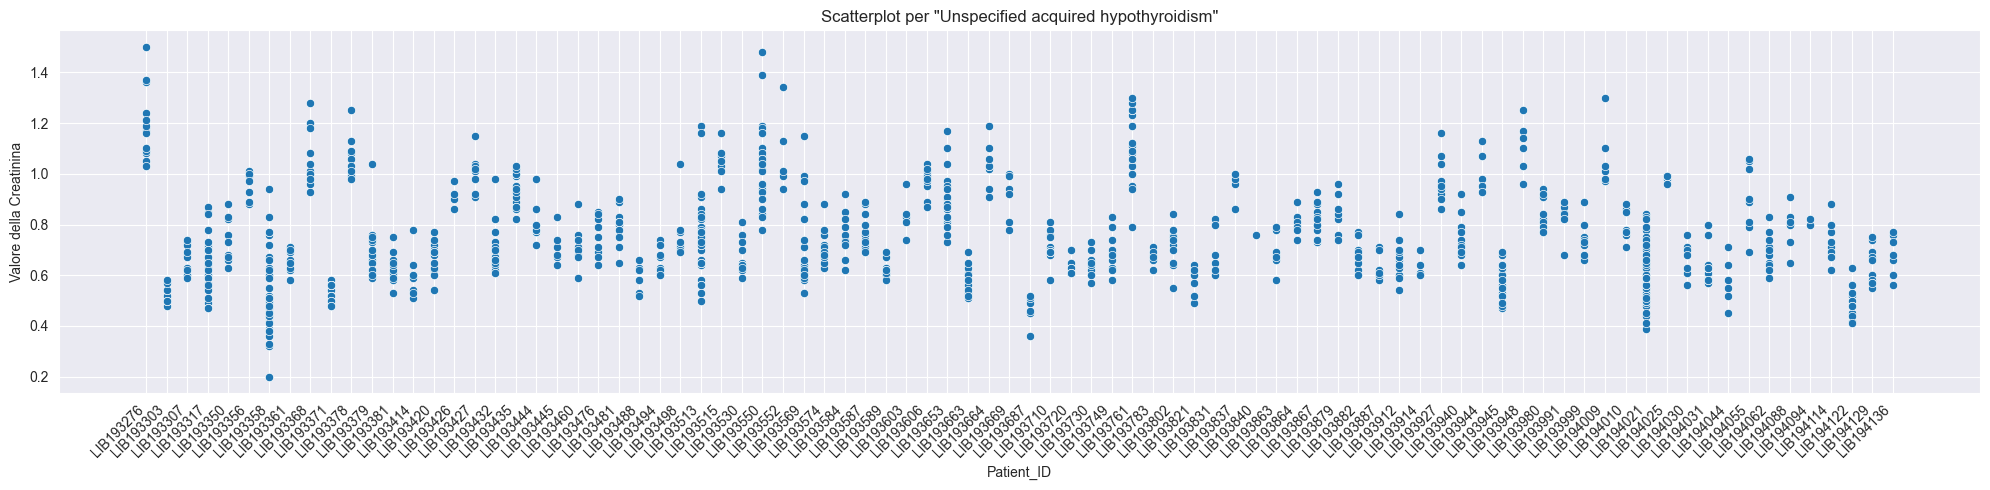

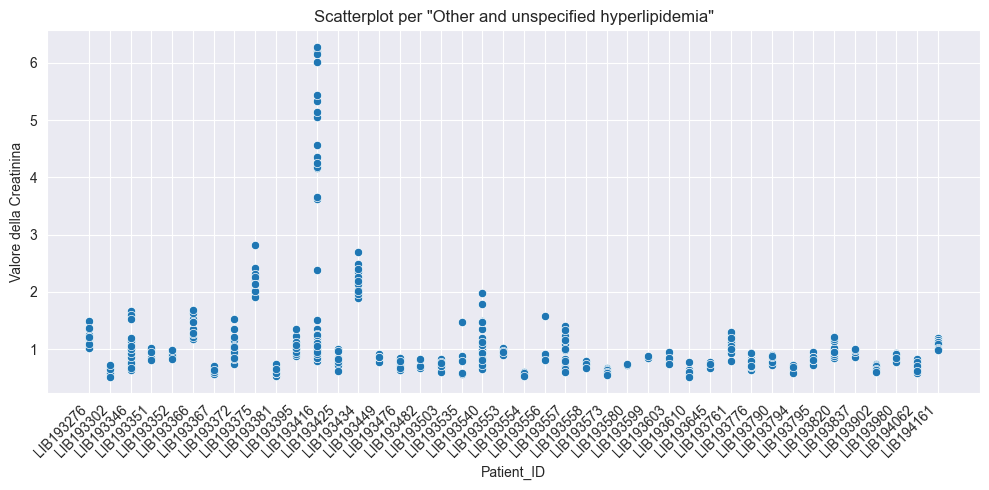

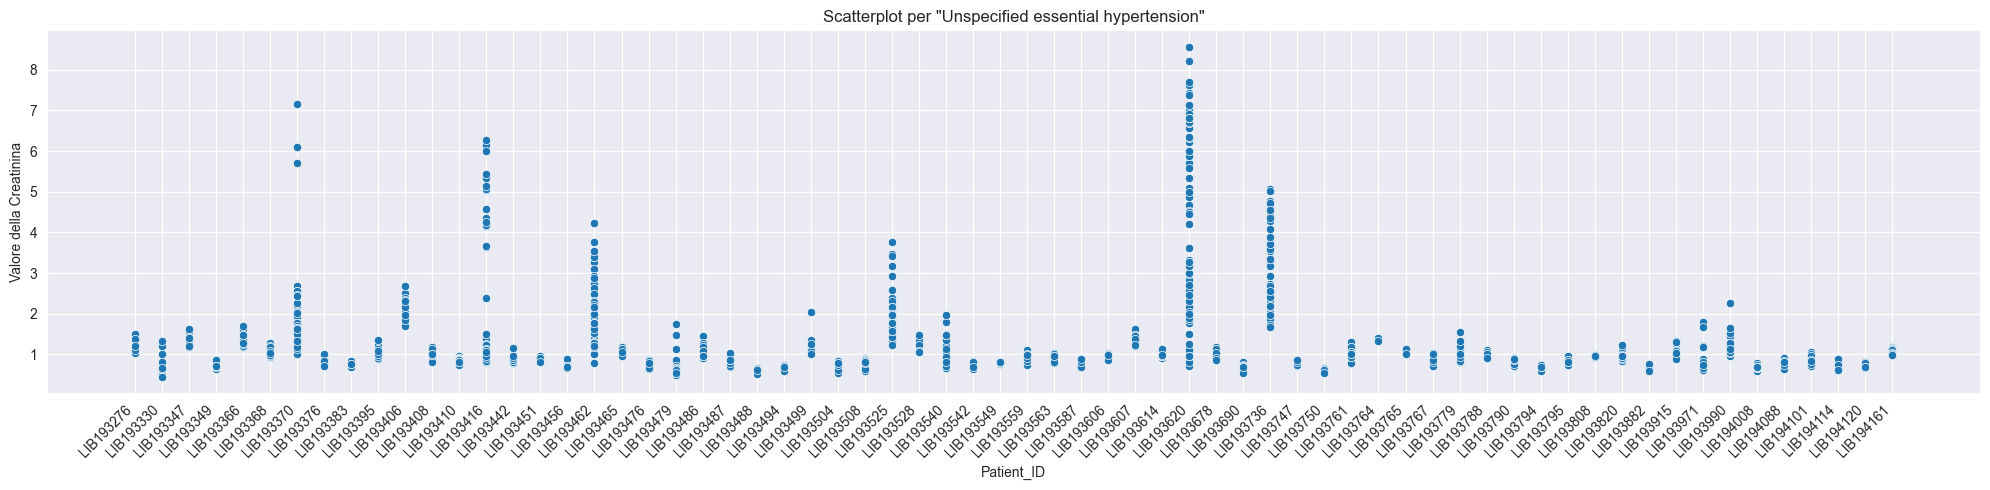

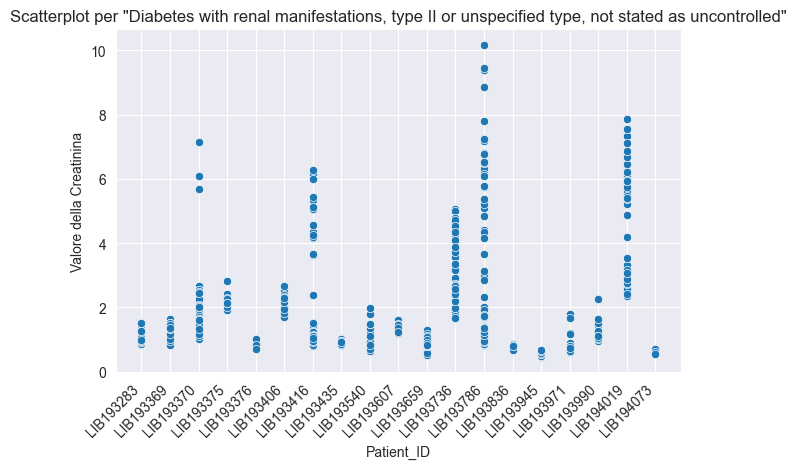

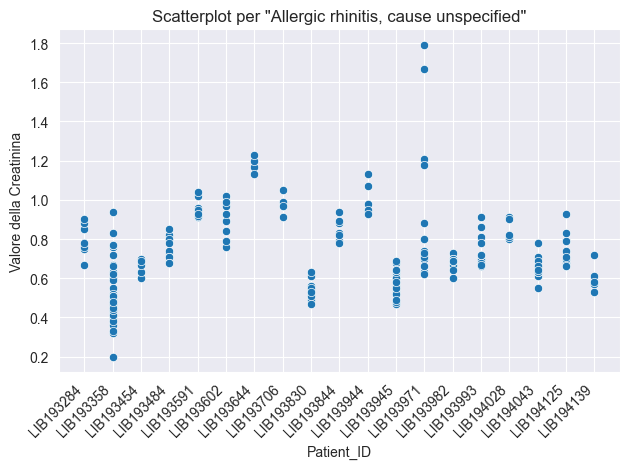

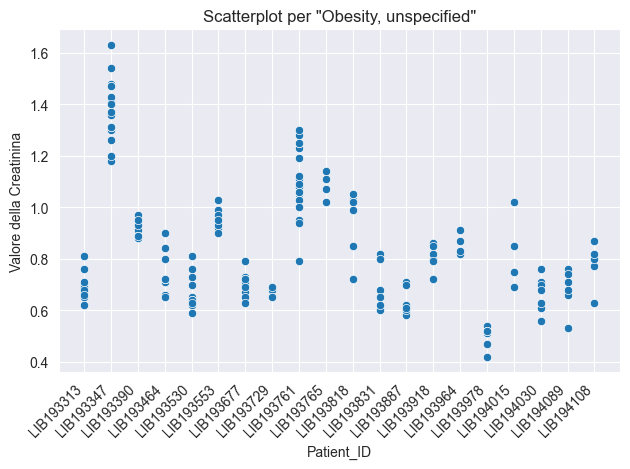

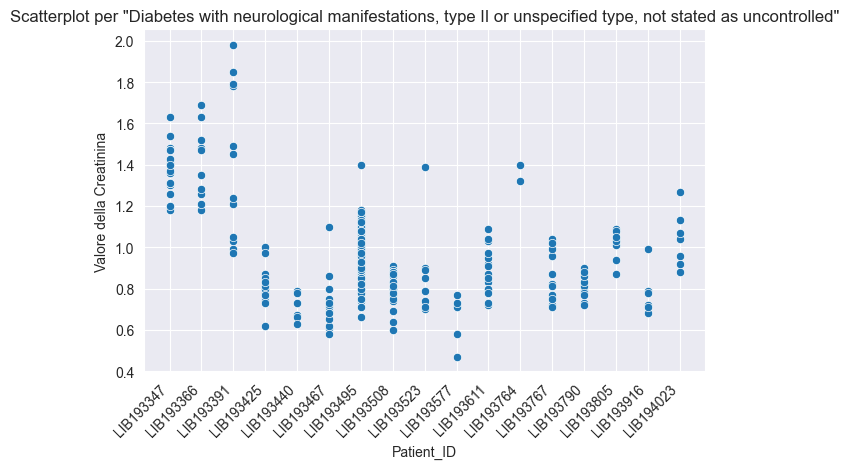

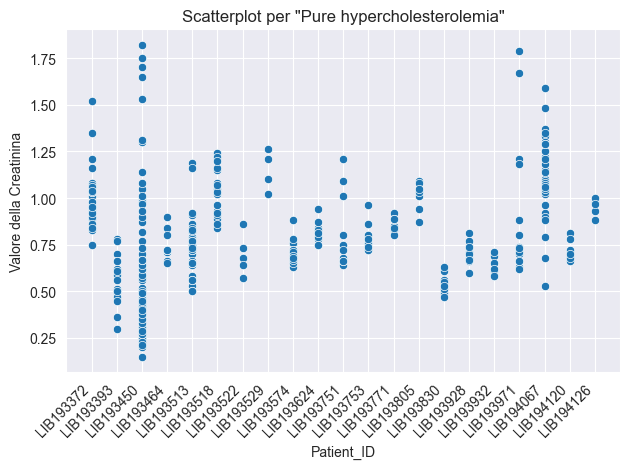

In [101]:
for description in creatinine_diagnostic['Description'].unique():
    subset = creatinine_diagnostic[creatinine_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Creatinina')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.grid(True)
        plt.show()

#### Glucose

In [30]:
glucose_subset = Biochemical[(Biochemical['Name'] == 'Glucose')].copy()
glucose_subset.drop(['Name'], axis=1, inplace=True)
glucose_subset.describe()

Value
count  8349.000000
mean    163.035274
std      85.403559
min      10.000000
25%     103.000000
50%     146.000000
75%     205.000000
max     979.000000

In [31]:
glucose_diagnostic = pd.merge(glucose_subset, Diagnostics, on='Patient_ID').copy()
glucose_diagnostic.drop(['Code'], axis=1, inplace=True)
glucose_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-21  244.0   
1      LIB193266     2020-08-21  244.0   
2      LIB193266     2020-08-21  198.0   
3      LIB193266     2020-08-21  198.0   
4      LIB193266     2020-08-24   97.0   
...          ...            ...    ...   
29178  LIB194164     2021-08-26  121.0   
29179  LIB194164     2021-09-20   74.0   
29180  LIB194164     2021-11-19  117.0   
29181  LIB194164     2021-11-23  150.0   
29182  LIB194164     2022-01-12  146.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
29178  Unspecified abortion, without mention of compl...  
29179  Unspecified abortion, without mention of compl...  
29180  Unspecified abortion, without mention of compl...  
29181  Unspecified abortion, without mention of compl...  
29182  Unspecified abortion, without mention of compl...  

[29183 rows x 4 columns]

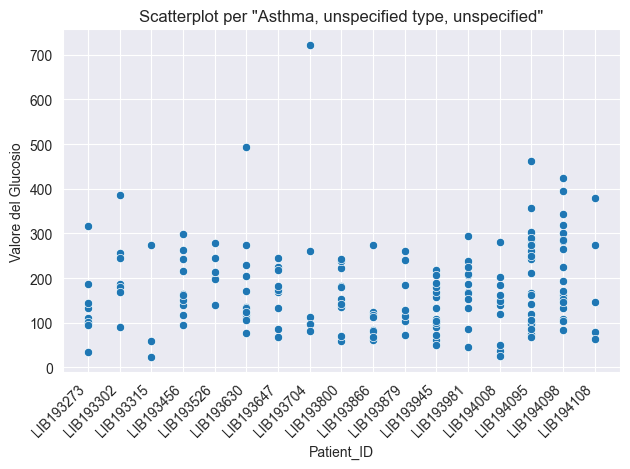

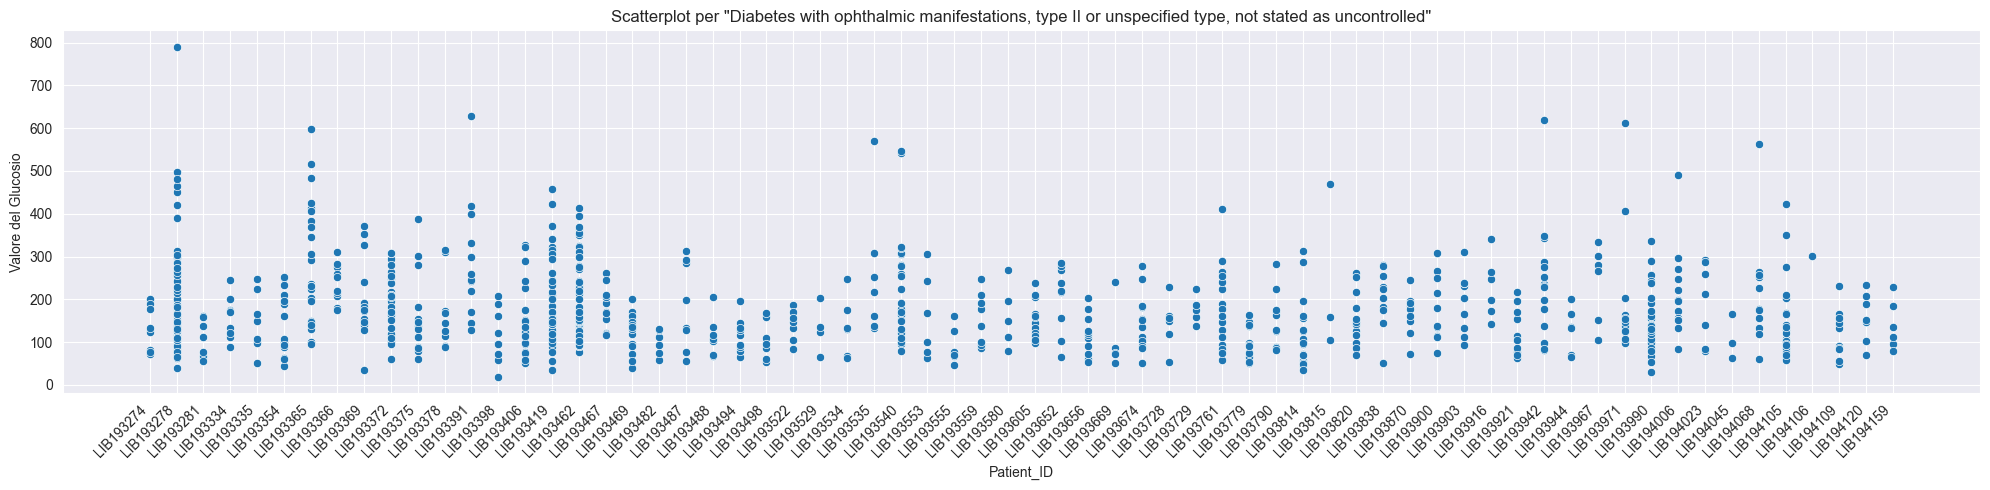

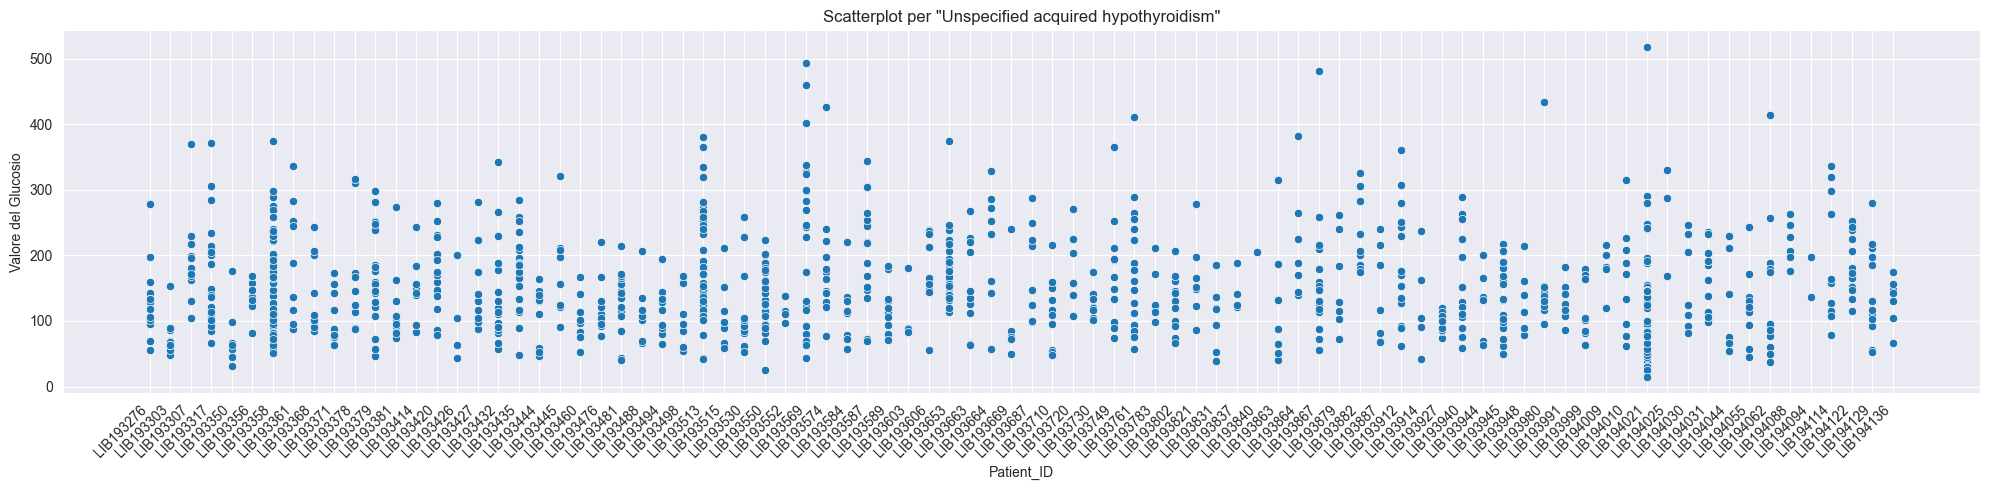

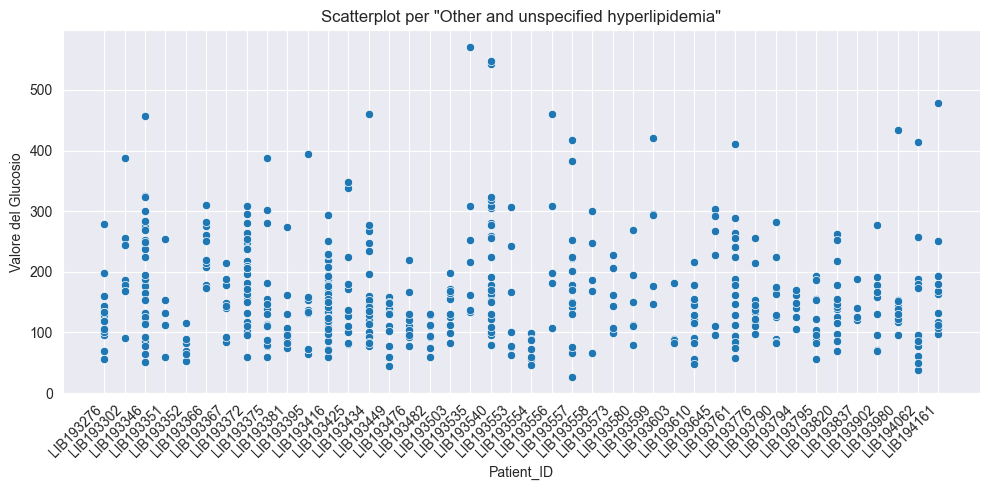

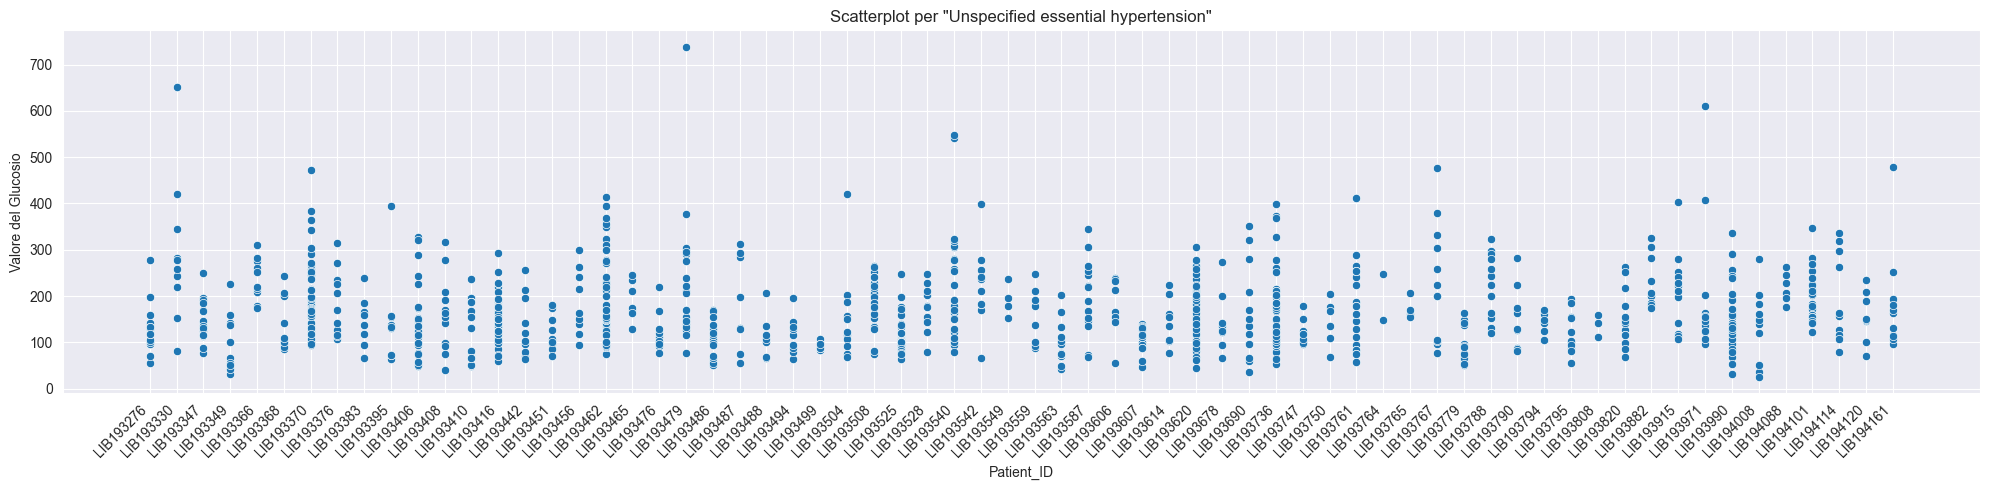

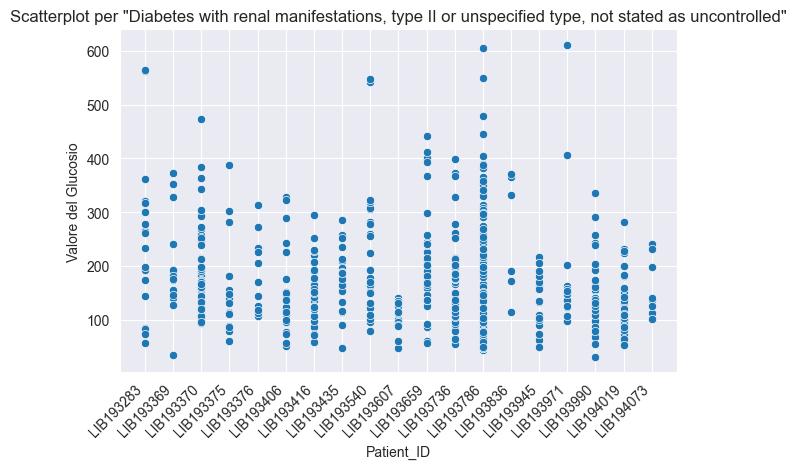

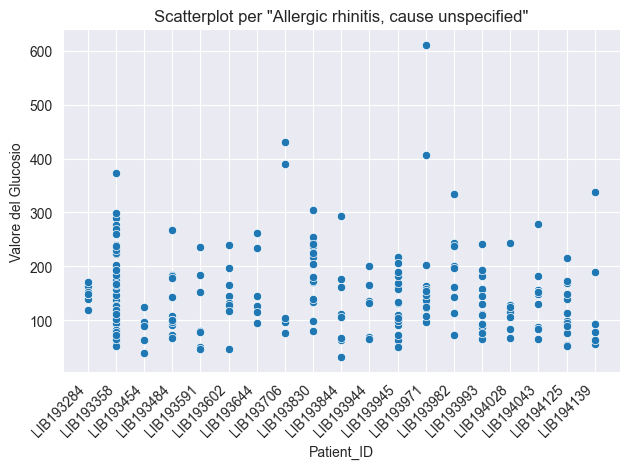

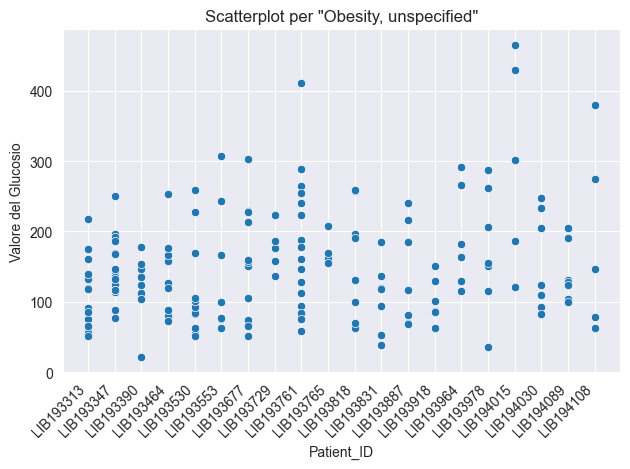

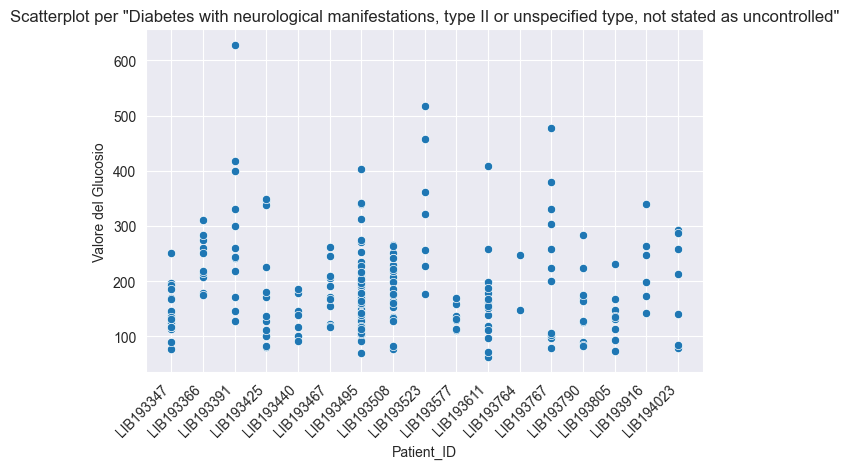

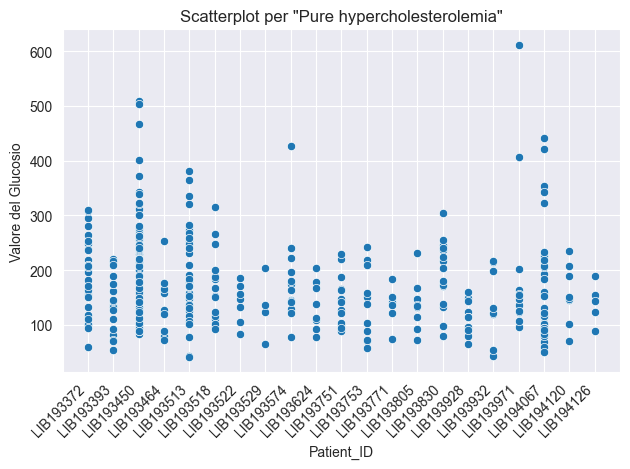

In [44]:
for description in glucose_diagnostic['Description'].unique():
    subset = glucose_diagnostic[glucose_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Glucosio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Potassium

In [46]:
potassium_subset = Biochemical[(Biochemical['Name'] == 'Potassium')].copy()
potassium_subset.drop(['Name'], axis=1, inplace=True)
potassium_subset.describe()

Value
count  7853.000000
mean      4.430804
std       0.658540
min       1.900000
25%       4.100000
50%       4.400000
75%       4.720000
max      22.600000

In [47]:
potassium_diagnostic = pd.merge(potassium_subset, Diagnostics, on='Patient_ID').copy()
potassium_diagnostic.drop(['Code'], axis=1, inplace=True)
potassium_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-21   2.50   
1      LIB193266     2020-08-21   2.50   
2      LIB193266     2020-08-21   2.70   
3      LIB193266     2020-08-21   2.70   
4      LIB193266     2020-08-24   3.46   
...          ...            ...    ...   
27614  LIB194164     2021-08-26   3.80   
27615  LIB194164     2021-09-20   4.64   
27616  LIB194164     2021-11-19   4.16   
27617  LIB194164     2021-11-23   3.90   
27618  LIB194164     2022-01-12   4.30   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
27614  Unspecified abortion, without mention of compl...  
27615  Unspecified abortion, without mention of compl...  
27616  Unspecified abortion, without mention of compl...  
27617  Unspecified abortion, without mention of compl...  
27618  Unspecified abortion, without mention of compl...  

[27619 rows x 4 columns]

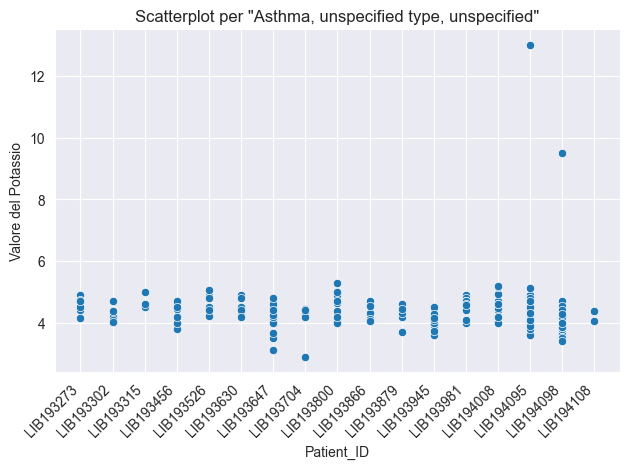

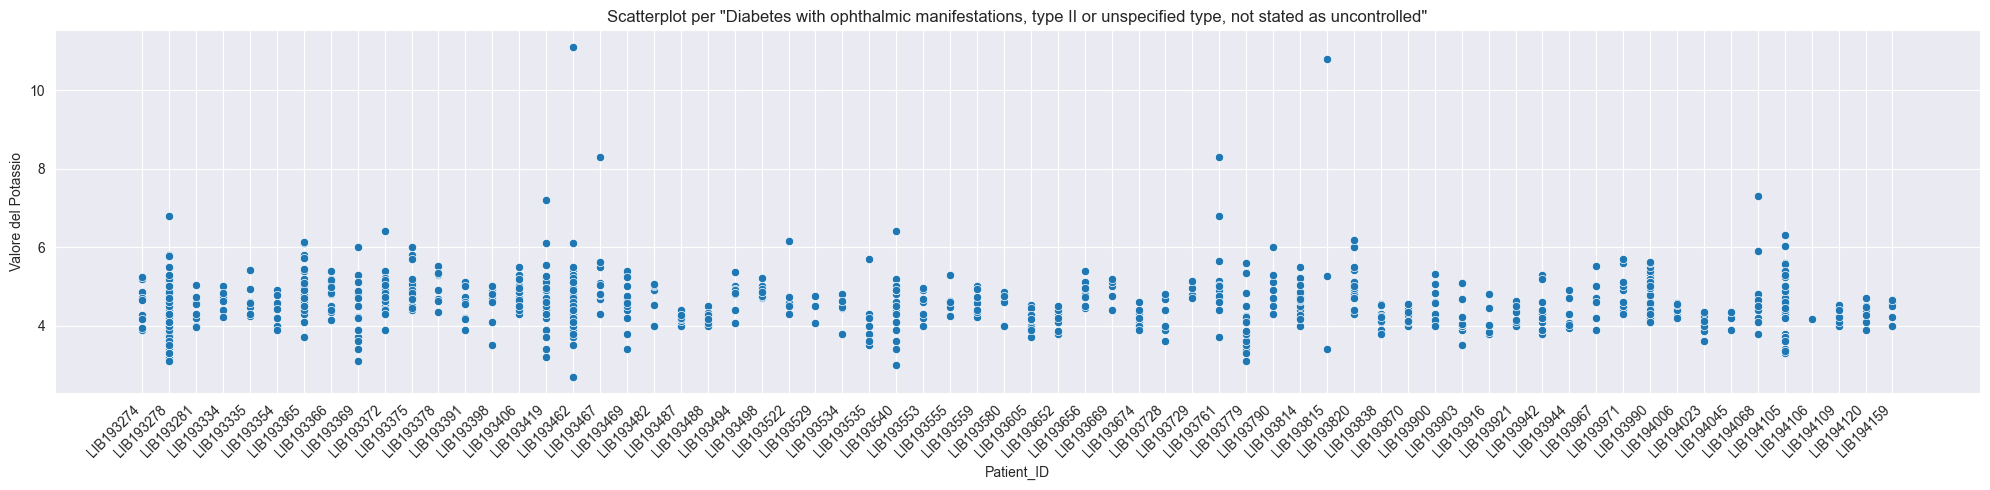

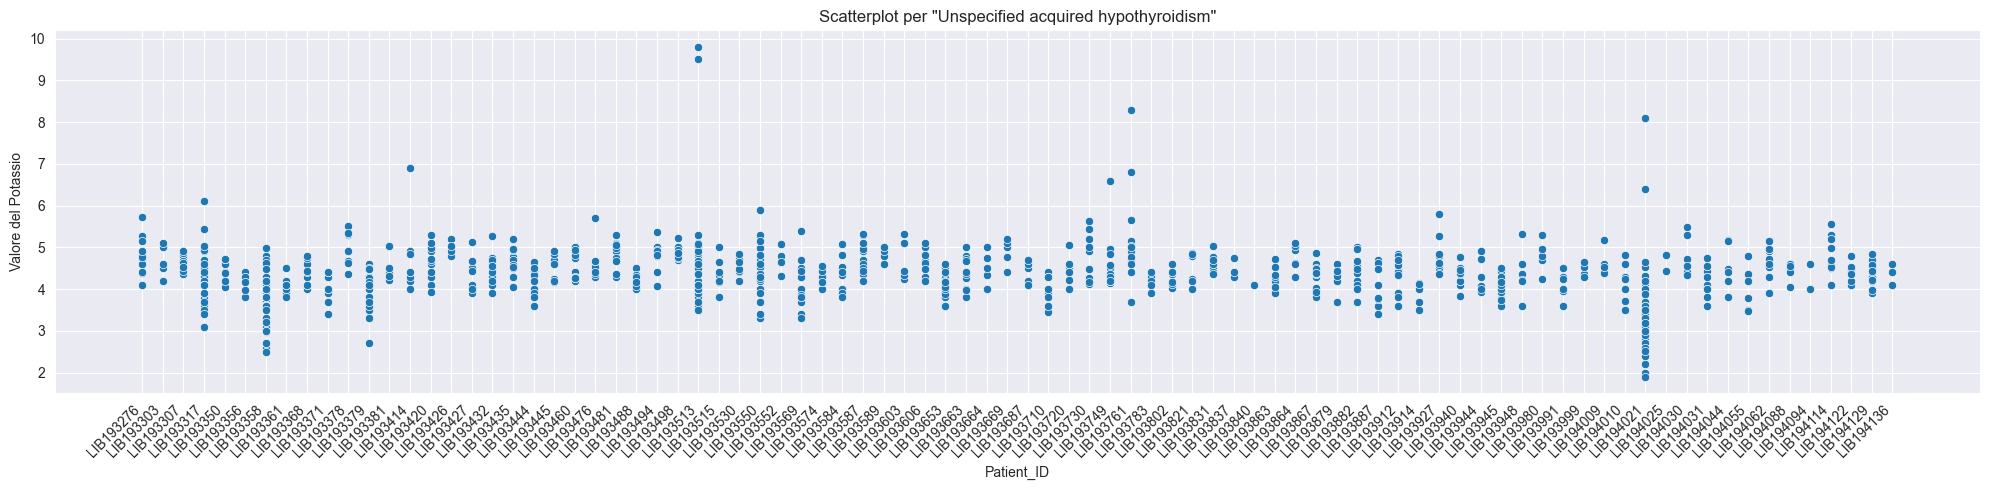

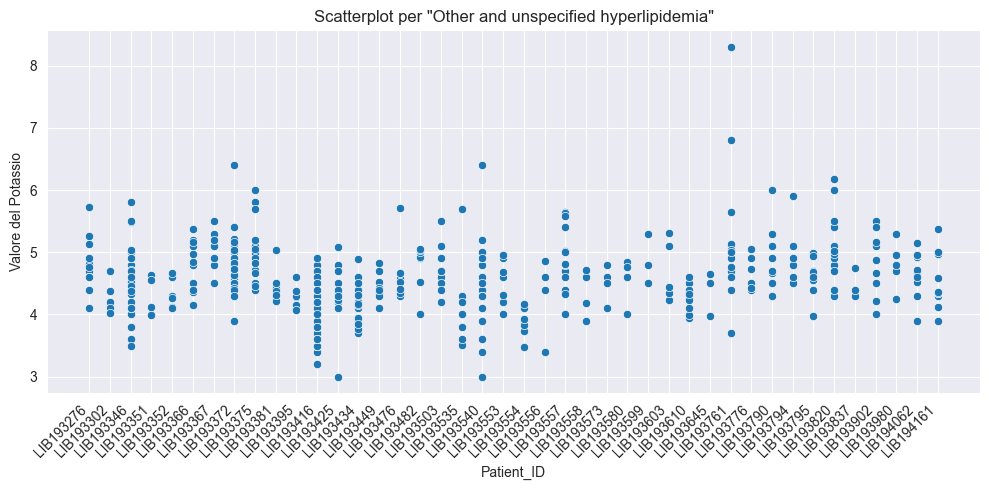

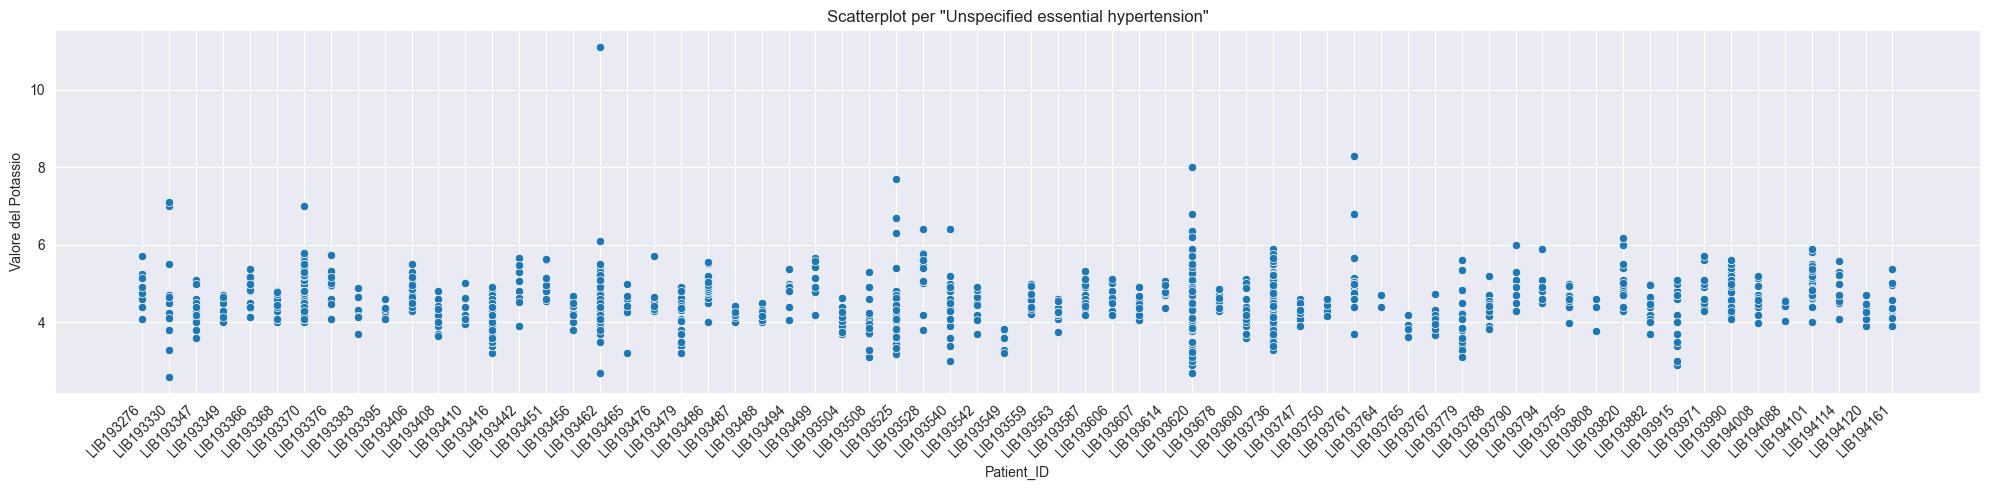

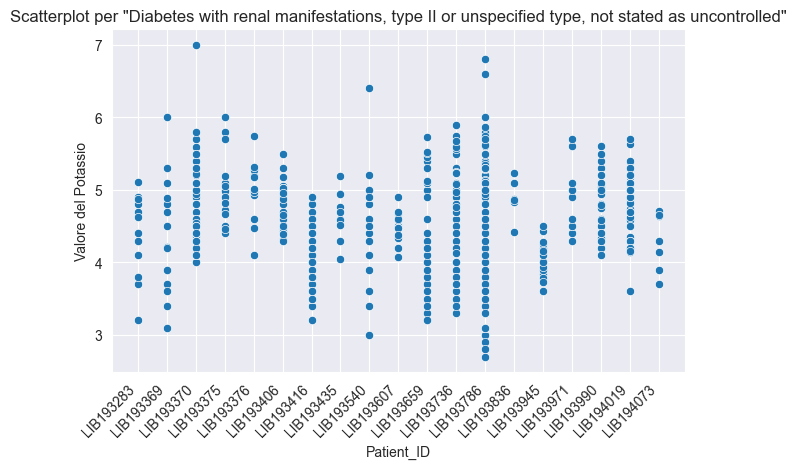

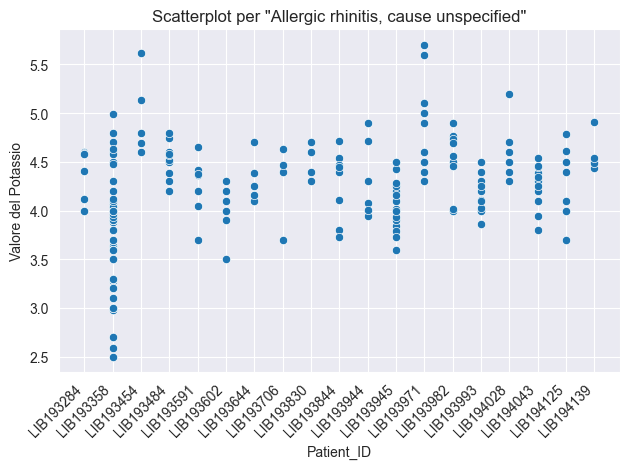

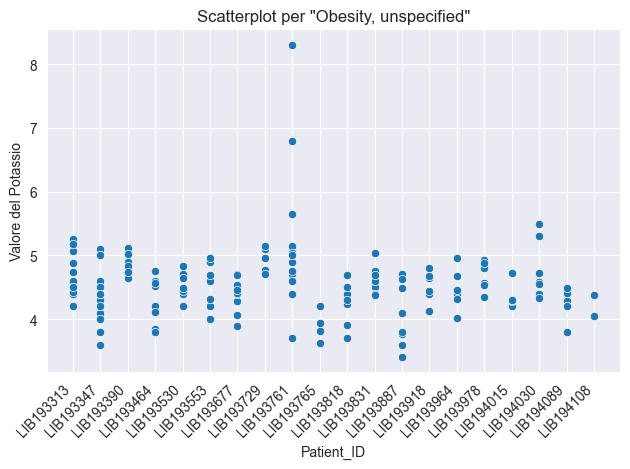

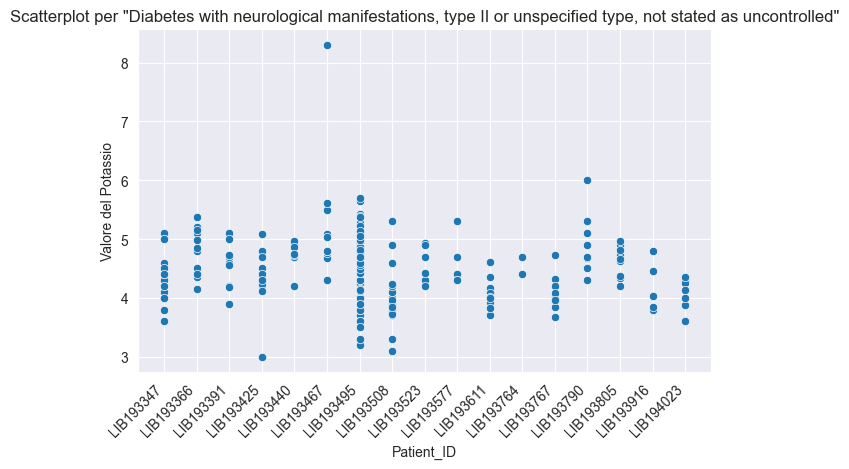

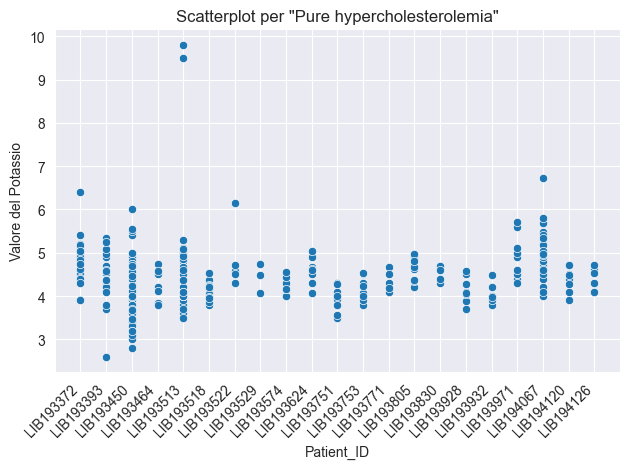

In [49]:
for description in potassium_diagnostic['Description'].unique():
    subset = potassium_diagnostic[potassium_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Potassio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Sodium

In [50]:
sodium_subset = Biochemical[(Biochemical['Name'] == 'Sodium')].copy()
sodium_subset.drop(['Name'], axis=1, inplace=True)
sodium_subset.describe()

Value
count  7814.000000
mean    138.163053
std       3.466266
min     117.000000
25%     136.000000
50%     138.000000
75%     140.000000
max     168.000000

In [51]:
sodium_diagnostic = pd.merge(sodium_subset, Diagnostics, on='Patient_ID').copy()
sodium_diagnostic.drop(['Code'], axis=1, inplace=True)
sodium_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-21  136.0   
1      LIB193266     2020-08-21  136.0   
2      LIB193266     2020-08-21  137.0   
3      LIB193266     2020-08-21  137.0   
4      LIB193266     2020-08-24  143.0   
...          ...            ...    ...   
27338  LIB194164     2021-08-26  133.0   
27339  LIB194164     2021-09-20  138.0   
27340  LIB194164     2021-11-19  137.0   
27341  LIB194164     2021-11-23  140.0   
27342  LIB194164     2022-01-12  139.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
27338  Unspecified abortion, without mention of compl...  
27339  Unspecified abortion, without mention of compl...  
27340  Unspecified abortion, without mention of compl...  
27341  Unspecified abortion, without mention of compl...  
27342  Unspecified abortion, without mention of compl...  

[27343 rows x 4 columns]

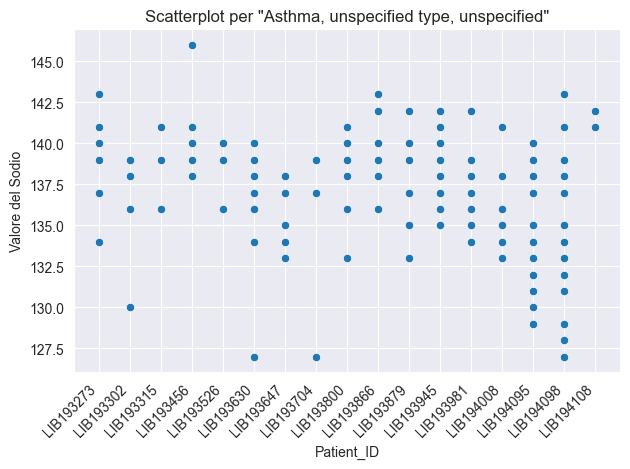

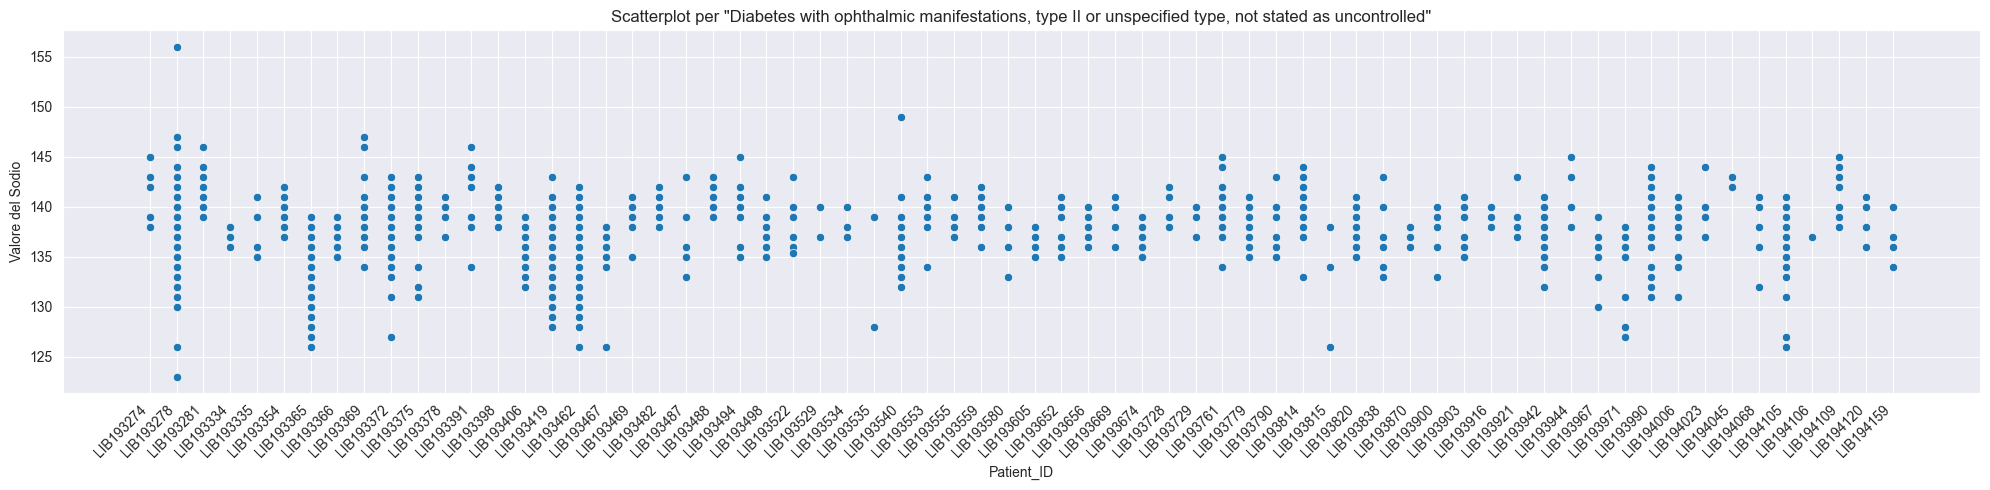

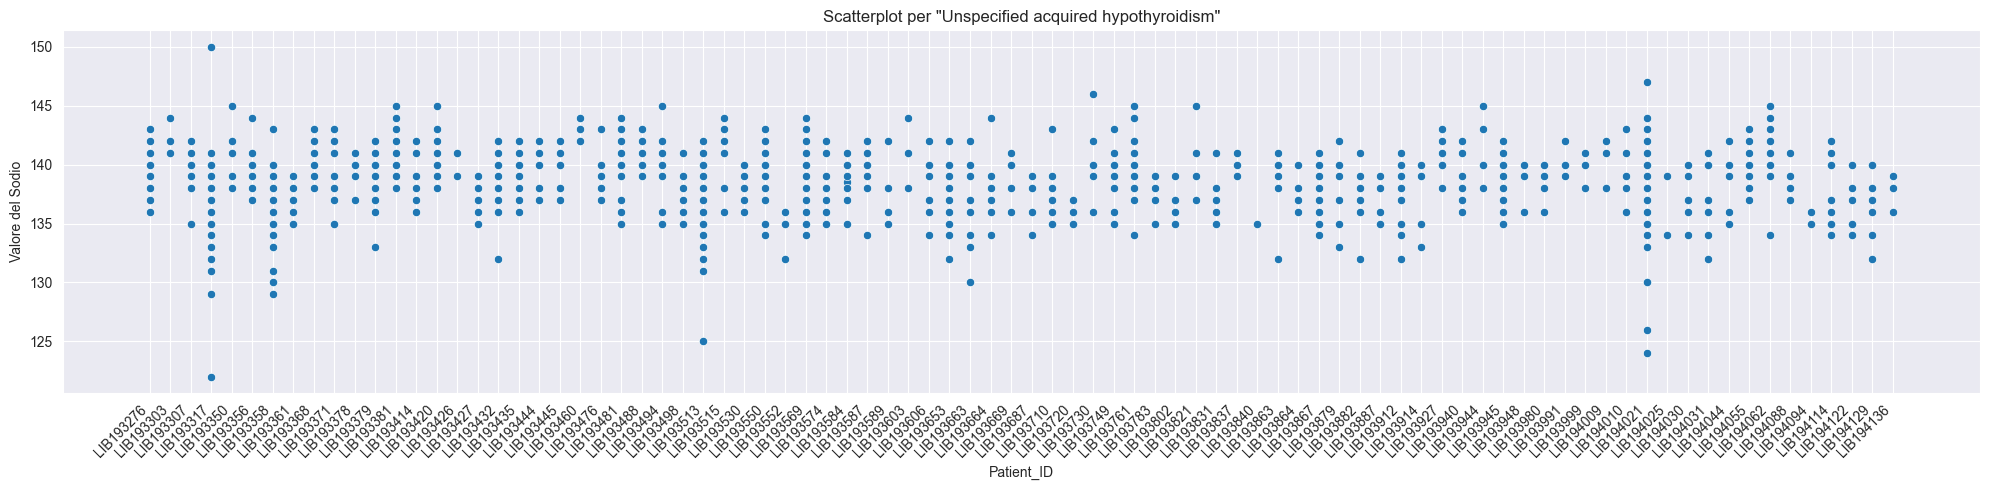

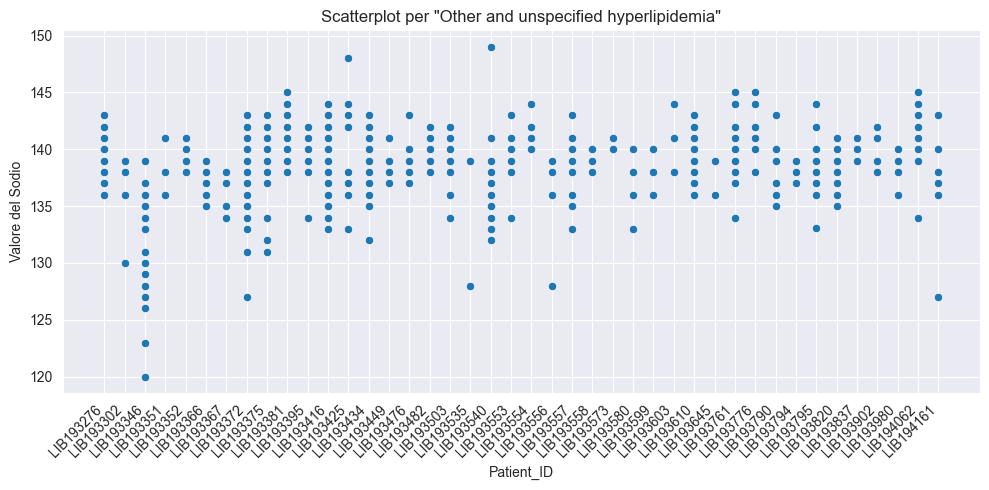

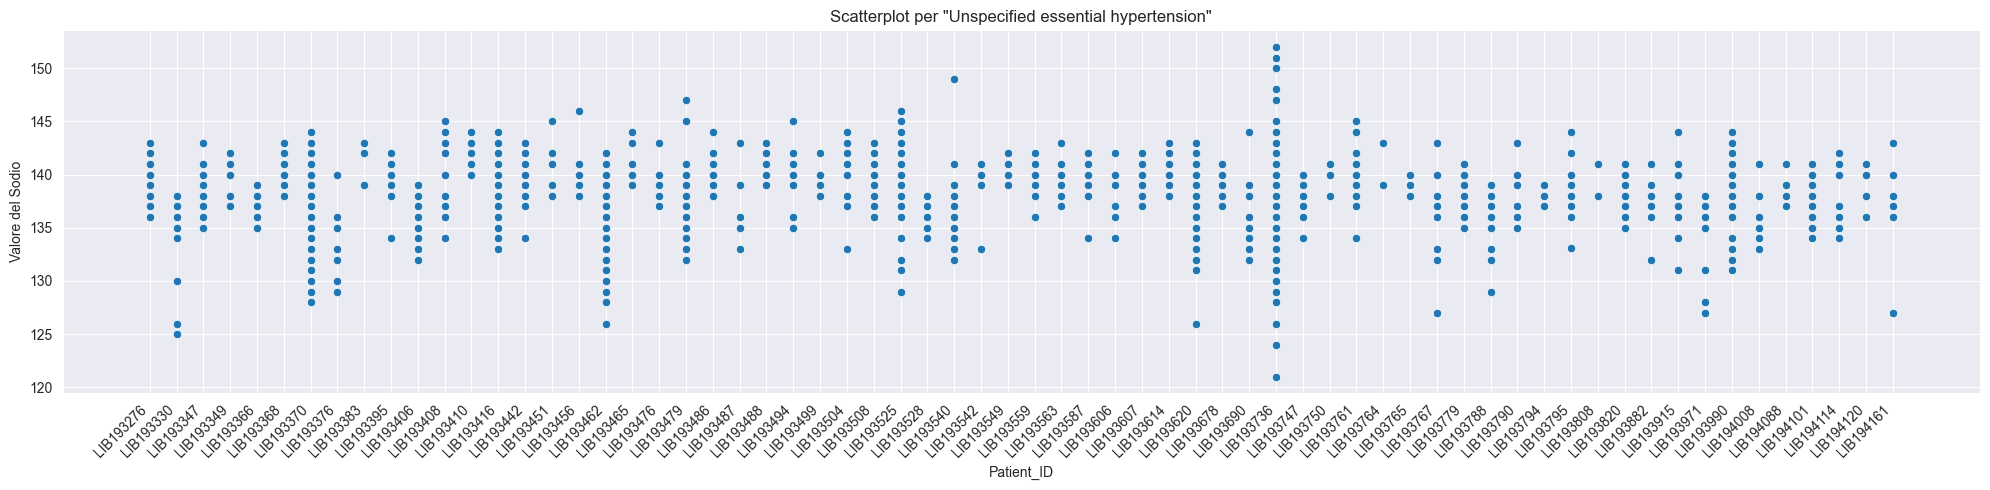

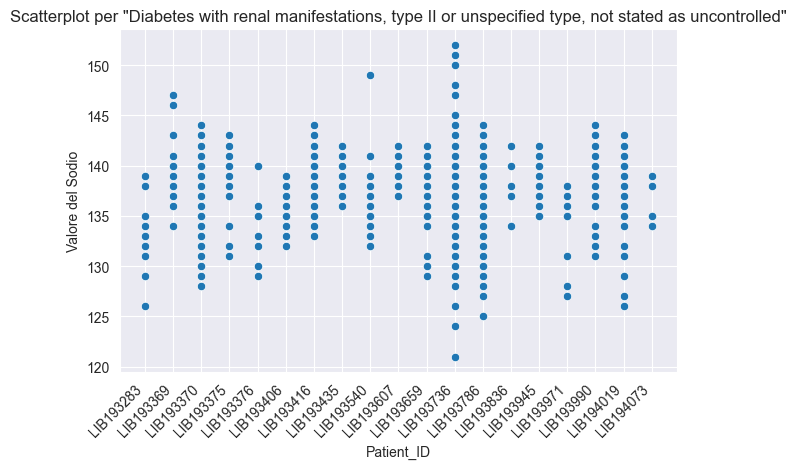

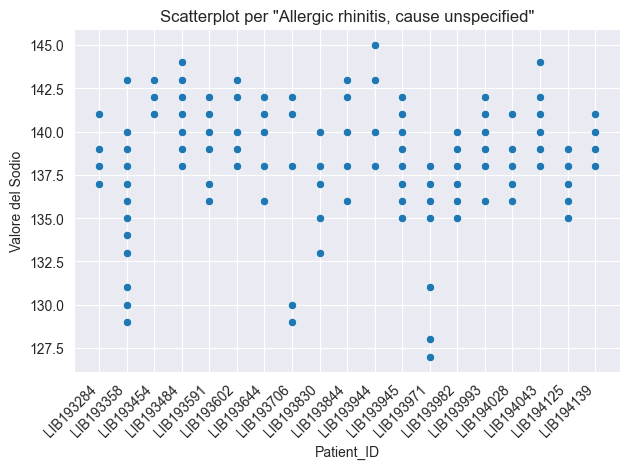

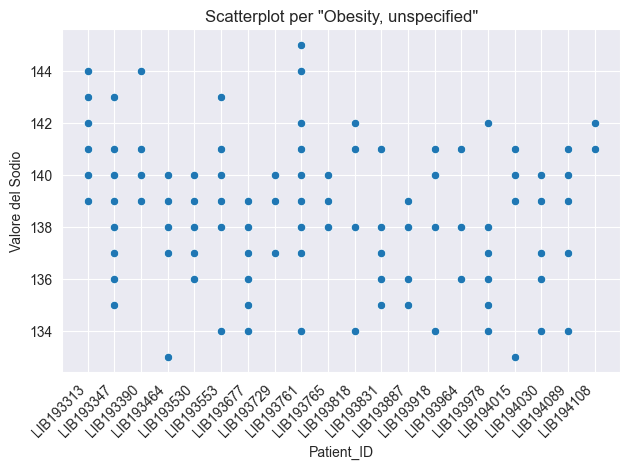

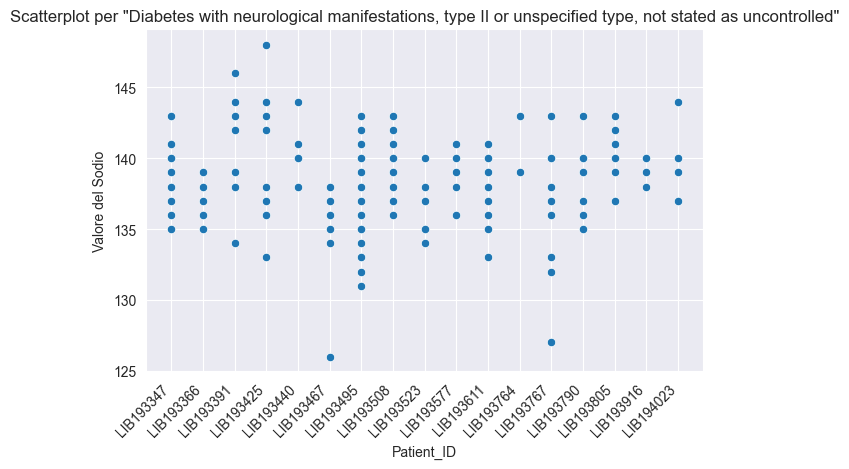

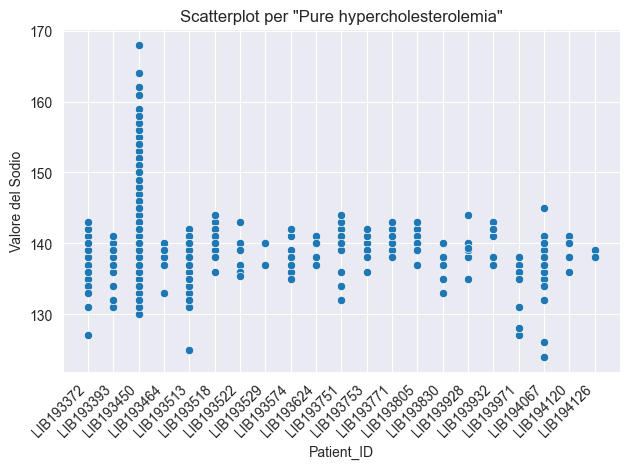

In [56]:
for description in sodium_diagnostic['Description'].unique():
    subset = sodium_diagnostic[sodium_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Sodio')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Alanine transaminase (GPT)

In [53]:
GPT_subset = Biochemical[(Biochemical['Name'] == 'Alanine transaminase (GPT)')].copy()
GPT_subset.drop(['Name'], axis=1, inplace=True)
GPT_subset.describe()

Value
count  7134.000000
mean     26.981679
std      44.617123
min      -4.000000
25%      14.000000
50%      19.000000
75%      27.000000
max     868.000000

In [54]:
GPT_diagnostic = pd.merge(GPT_subset, Diagnostics, on='Patient_ID').copy()
GPT_diagnostic.drop(['Code'], axis=1, inplace=True)
GPT_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-21   11.0   
1      LIB193266     2020-08-21   11.0   
2      LIB193266     2020-08-24   16.0   
3      LIB193266     2020-08-24   16.0   
4      LIB193266     2021-04-05   25.0   
...          ...            ...    ...   
24069  LIB194164     2021-05-28   14.0   
24070  LIB194164     2021-08-26   12.0   
24071  LIB194164     2021-09-20   10.0   
24072  LIB194164     2021-11-23   10.0   
24073  LIB194164     2022-01-12   11.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
24069  Unspecified abortion, without mention of compl...  
24070  Unspecified abortion, without mention of compl...  
24071  Unspecified abortion, without mention of compl...  
24072  Unspecified abortion, without mention of compl...  
24073  Unspecified abortion, without mention of compl...  

[24074 rows x 4 columns]

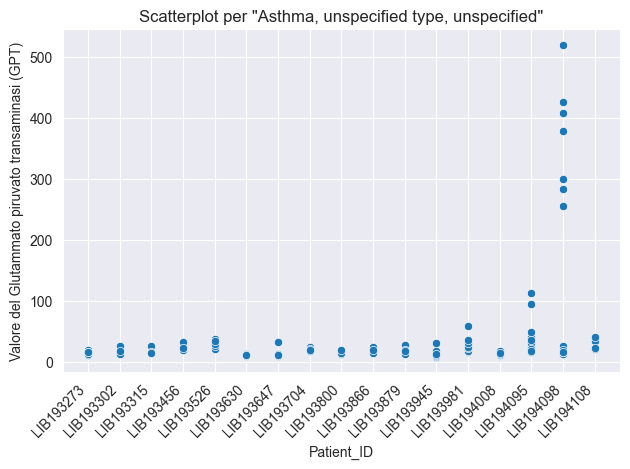

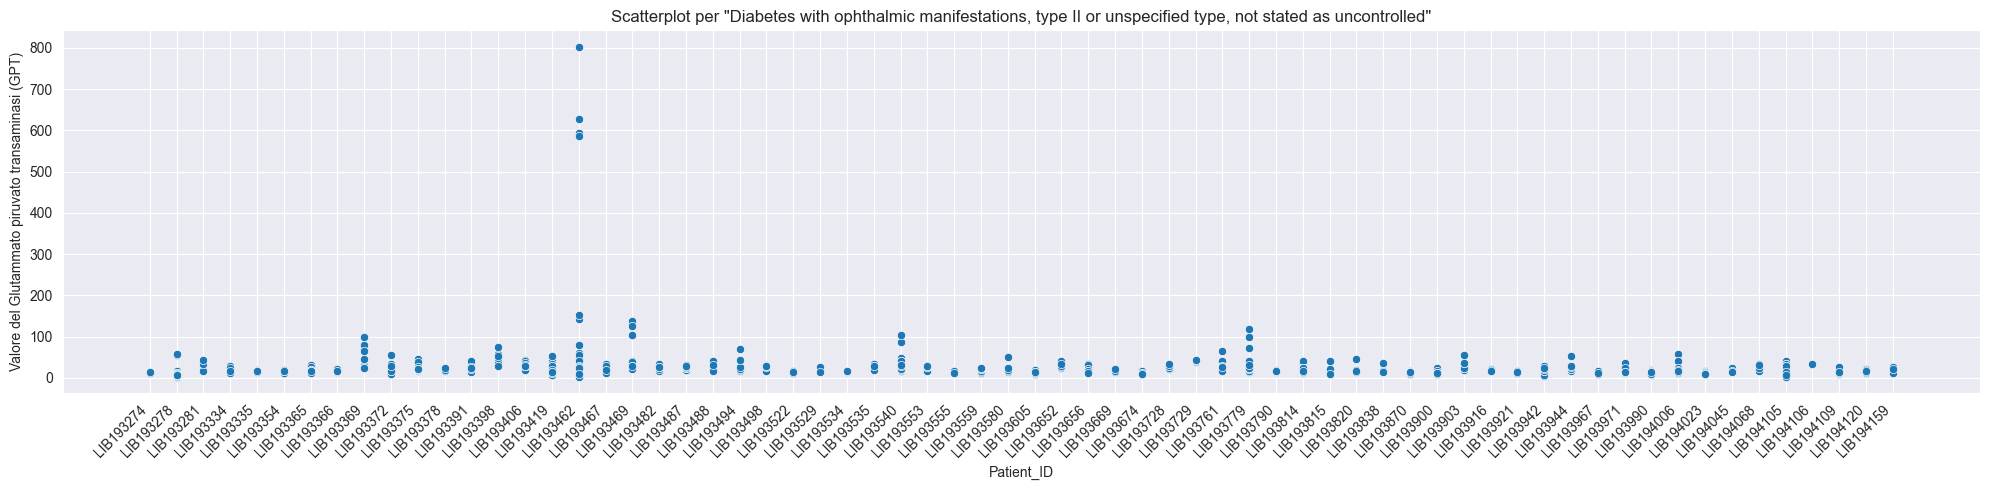

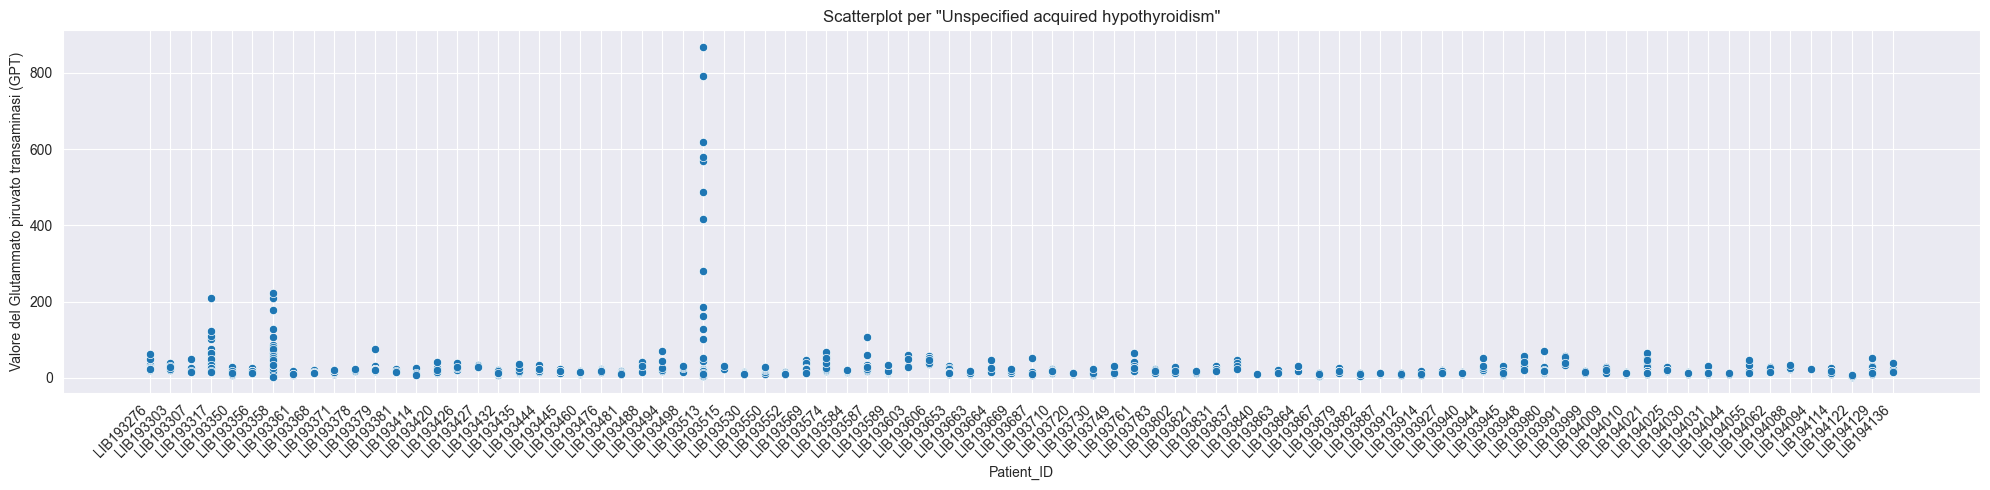

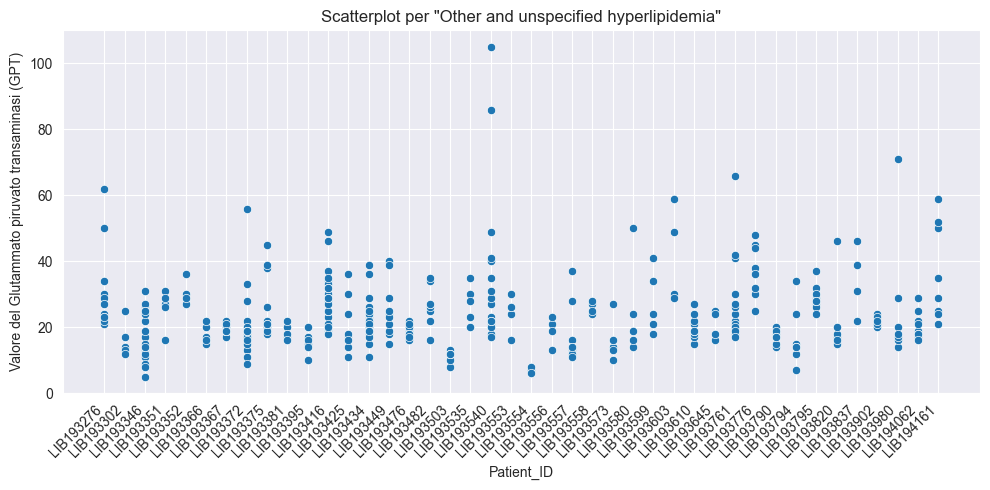

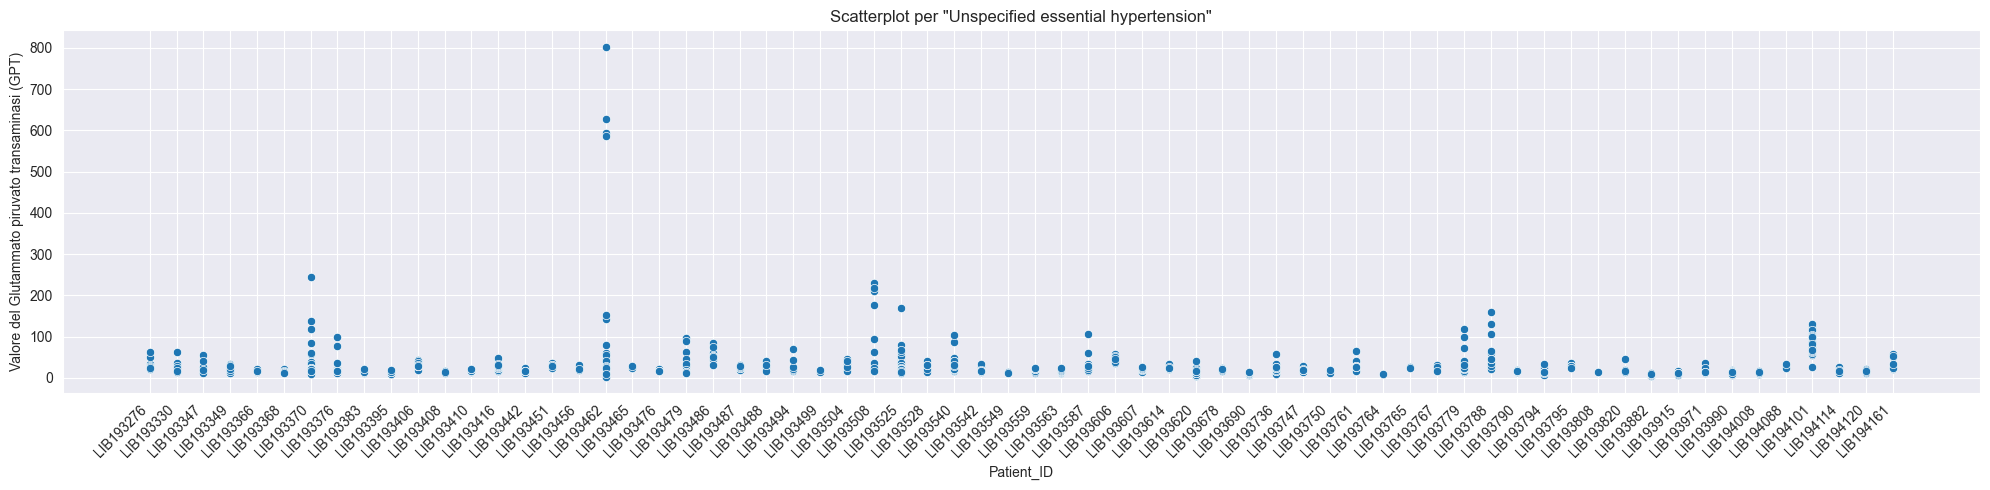

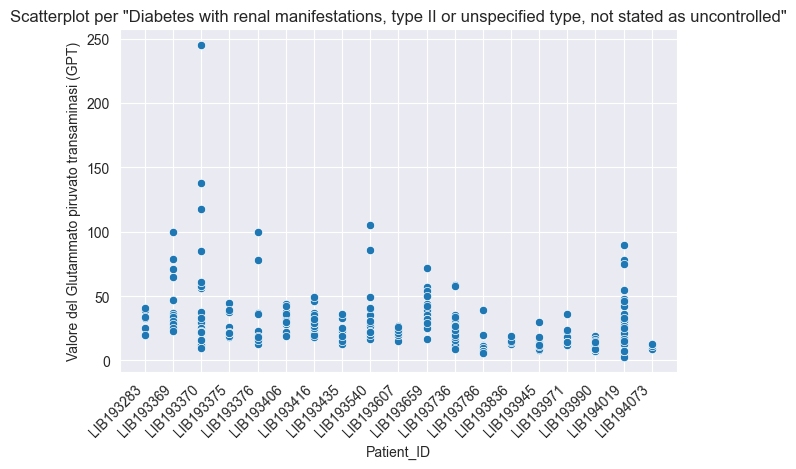

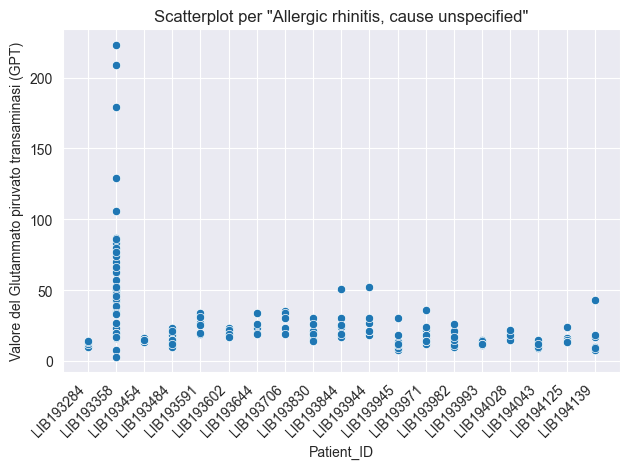

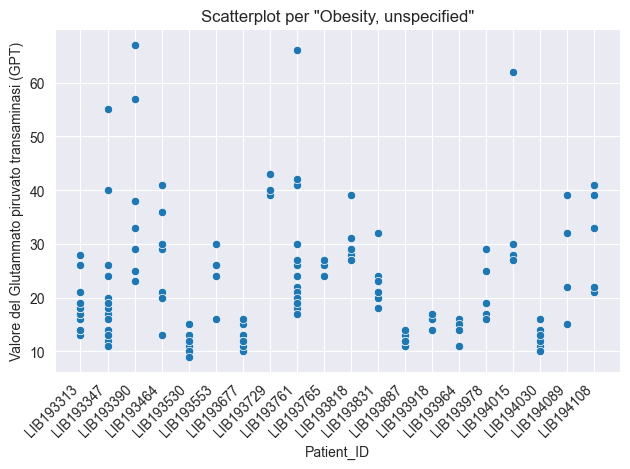

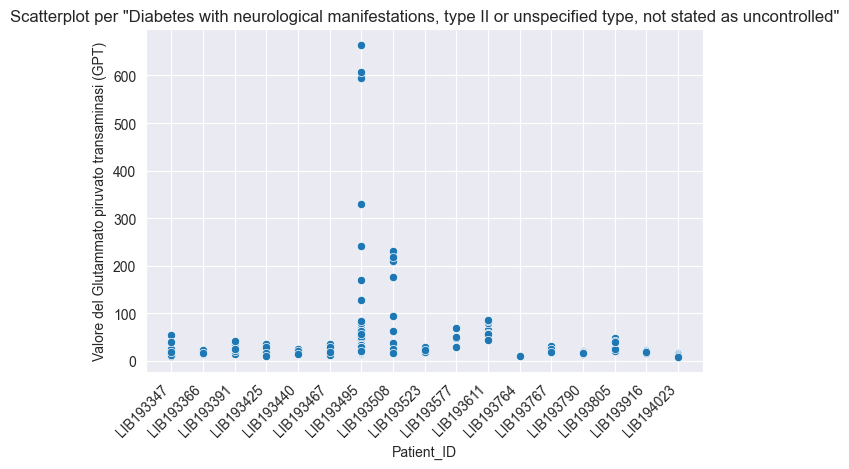

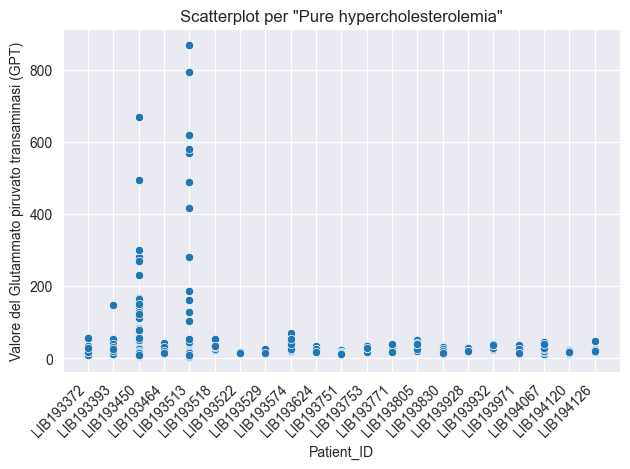

In [58]:
for description in GPT_diagnostic['Description'].unique():
    subset = GPT_diagnostic[GPT_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Glutammato piruvato transaminasi (GPT)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Gamma-glutamyl Transferase (GGT)

In [61]:
GGT_subset = Biochemical[(Biochemical['Name'] == 'Gamma-glutamyl Transferase (GGT)')].copy()
GGT_subset.drop(['Name'], axis=1, inplace=True)
GGT_subset.describe()

Value
count  6085.000000
mean     43.800016
std     113.549983
min       5.000000
25%      14.000000
50%      19.000000
75%      31.000000
max    2051.000000

In [62]:
GGT_diagnostic = pd.merge(GGT_subset, Diagnostics, on='Patient_ID').copy()
GGT_diagnostic.drop(['Code'], axis=1, inplace=True)
GGT_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24   18.0   
1      LIB193266     2020-08-24   18.0   
2      LIB193266     2021-04-05   13.0   
3      LIB193266     2021-04-05   13.0   
4      LIB193266     2021-11-05   16.0   
...          ...            ...    ...   
20224  LIB194164     2021-02-11    8.0   
20225  LIB194164     2021-02-24   14.0   
20226  LIB194164     2021-05-18    5.0   
20227  LIB194164     2021-09-20    8.0   
20228  LIB194164     2022-01-12    7.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
20224  Unspecified abortion, without mention of compl...  
20225  Unspecified abortion, without mention of compl...  
20226  Unspecified abortion, without mention of compl...  
20227  Unspecified abortion, without mention of compl...  
20228  Unspecified abortion, without mention of compl...  

[20229 rows x 4 columns]

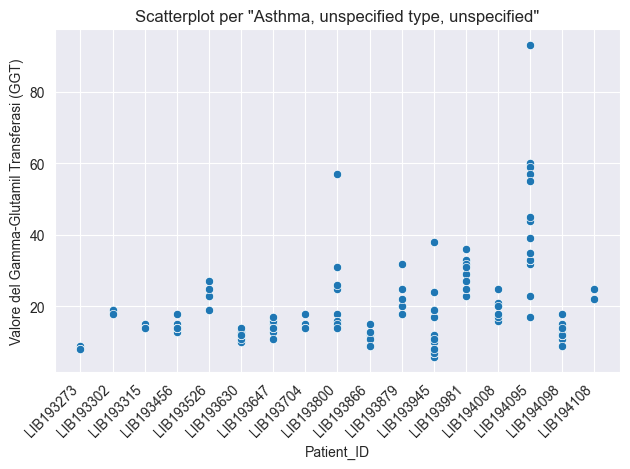

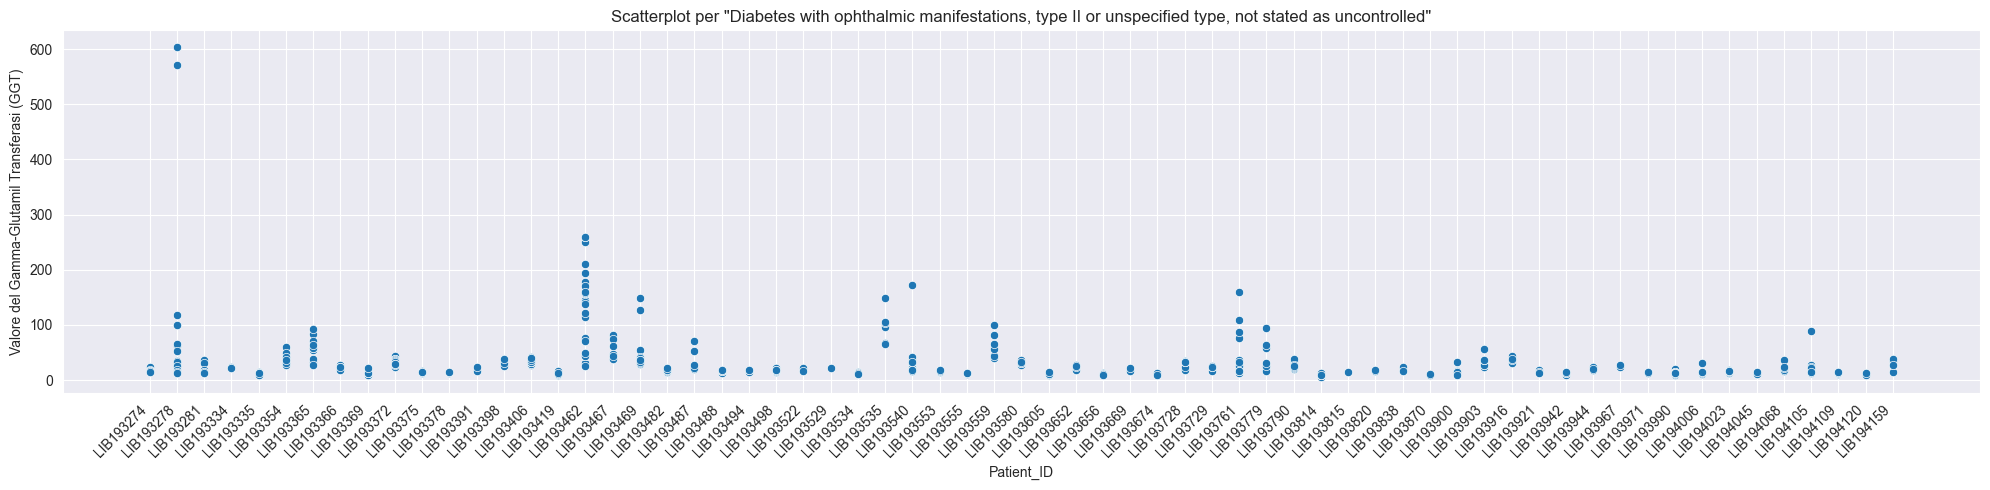

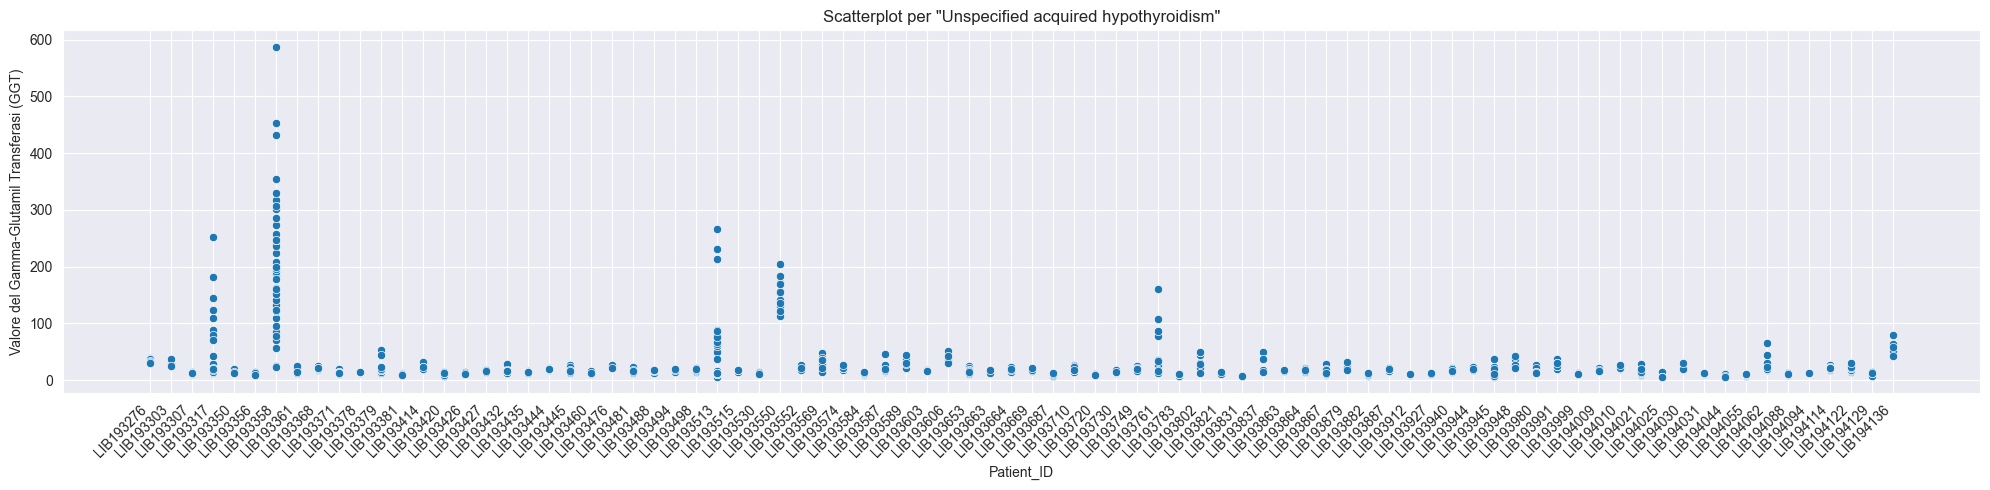

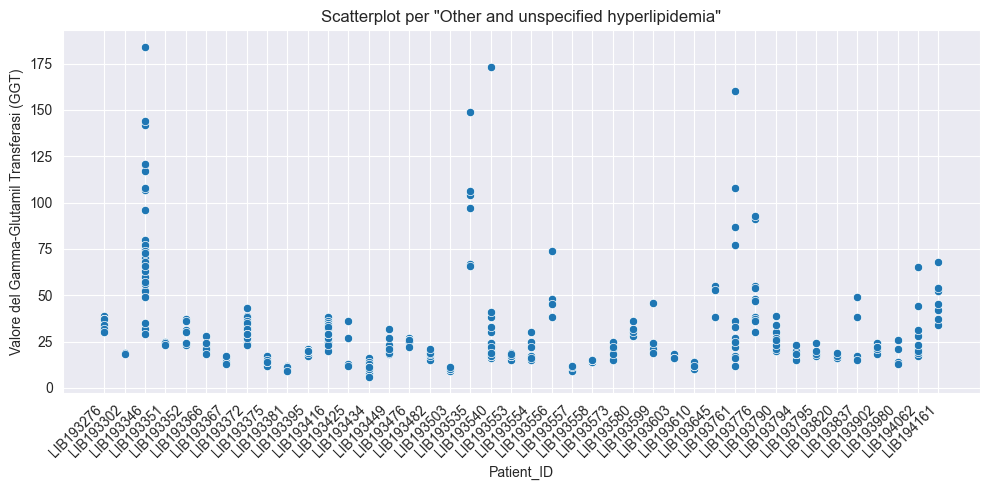

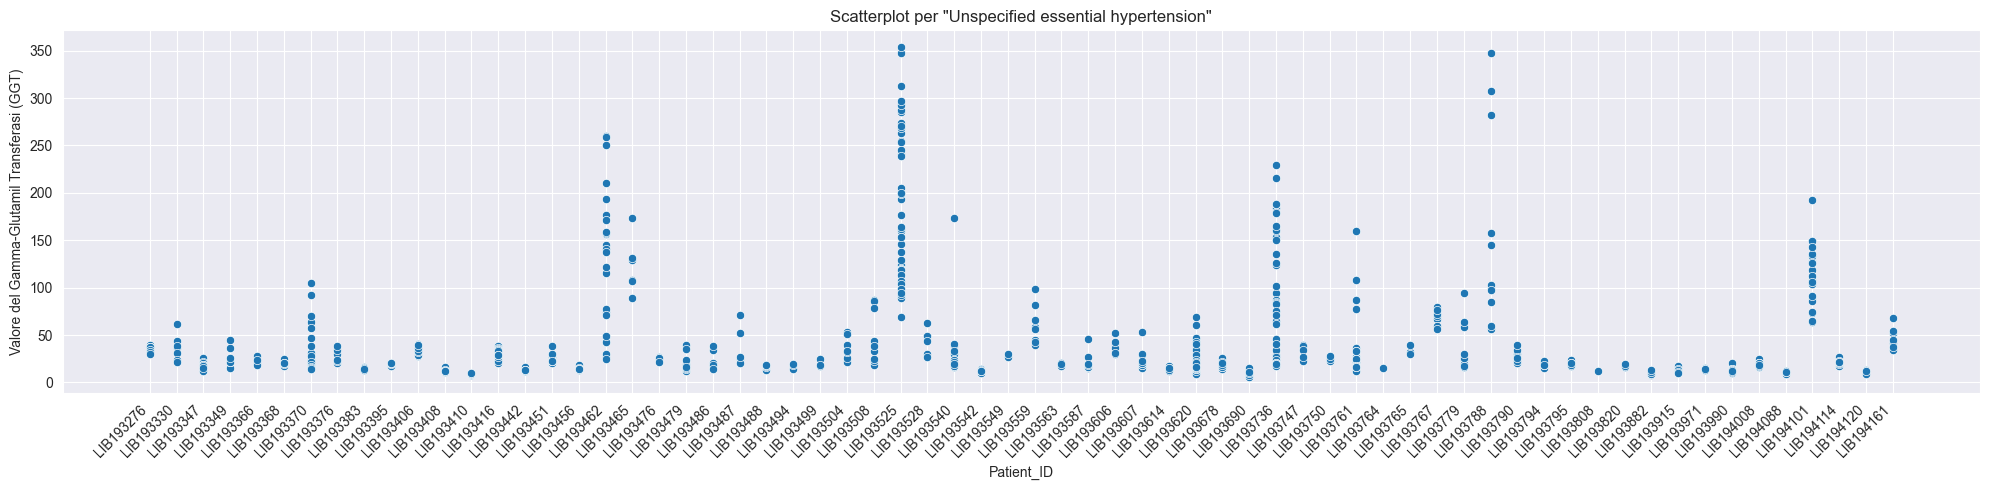

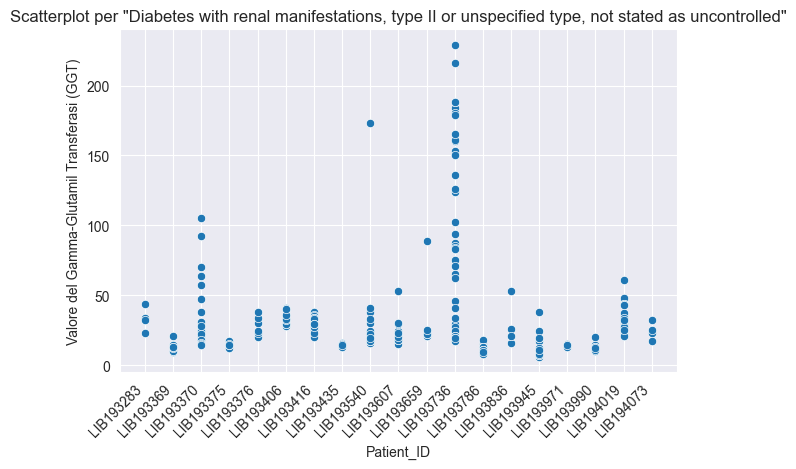

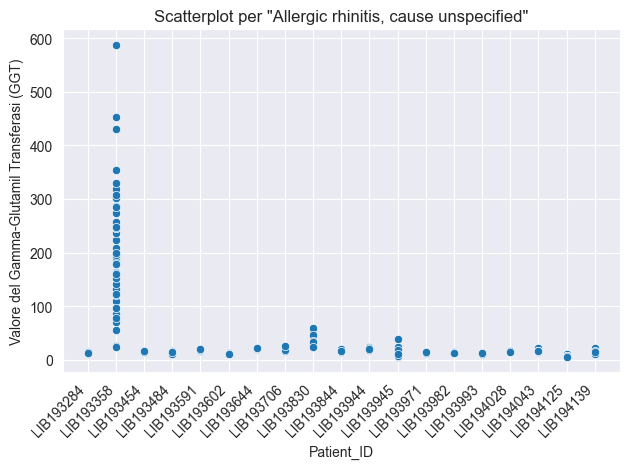

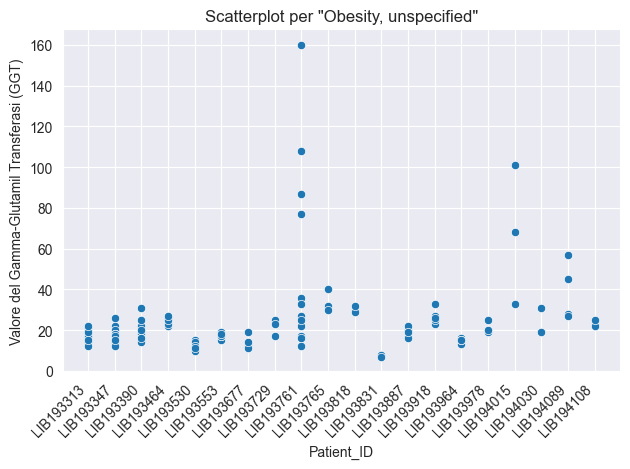

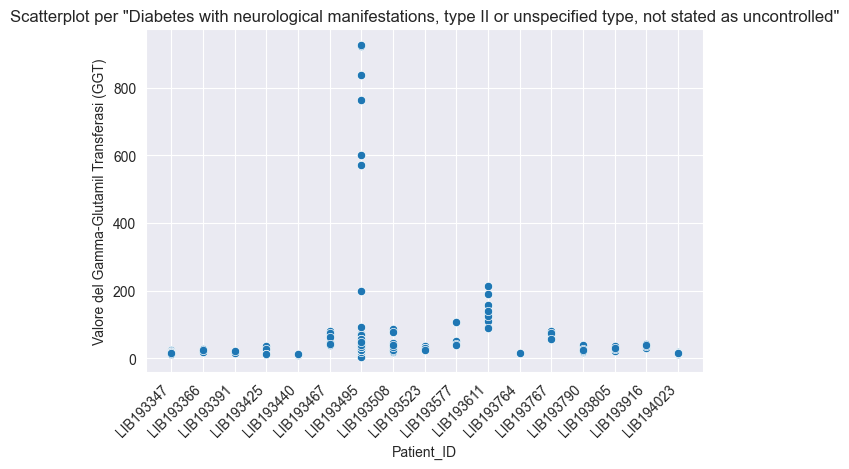

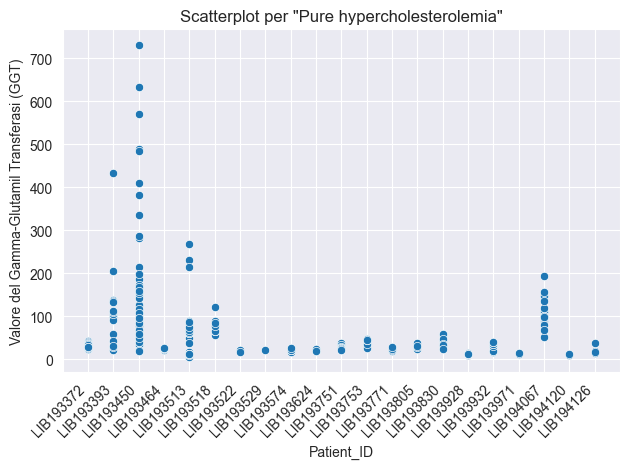

In [63]:
for description in GGT_diagnostic['Description'].unique():
    subset = GGT_diagnostic[GGT_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Gamma-Glutamil Transferasi (GGT)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Total cholesterol

In [64]:
cholesterol_subset = Biochemical[(Biochemical['Name'] == 'Total cholesterol')].copy()
cholesterol_subset.drop(['Name'], axis=1, inplace=True)
cholesterol_subset.describe()

Value
count  5954.000000
mean    169.454825
std      39.933470
min      27.000000
25%     144.000000
50%     167.000000
75%     192.000000
max     703.000000

In [65]:
cholesterol_diagnostic = pd.merge(cholesterol_subset, Diagnostics, on='Patient_ID').copy()
cholesterol_diagnostic.drop(['Code'], axis=1, inplace=True)
cholesterol_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24  168.0   
1      LIB193266     2020-08-24  168.0   
2      LIB193266     2020-12-15  159.0   
3      LIB193266     2020-12-15  159.0   
4      LIB193266     2021-04-05  133.0   
...          ...            ...    ...   
18308  LIB194164     2020-12-30  167.0   
18309  LIB194164     2021-02-24  191.0   
18310  LIB194164     2021-09-20  186.0   
18311  LIB194164     2021-11-19  159.0   
18312  LIB194164     2022-01-12  163.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
18308  Unspecified abortion, without mention of compl...  
18309  Unspecified abortion, without mention of compl...  
18310  Unspecified abortion, without mention of compl...  
18311  Unspecified abortion, without mention of compl...  
18312  Unspecified abortion, without mention of compl...  

[18313 rows x 4 columns]

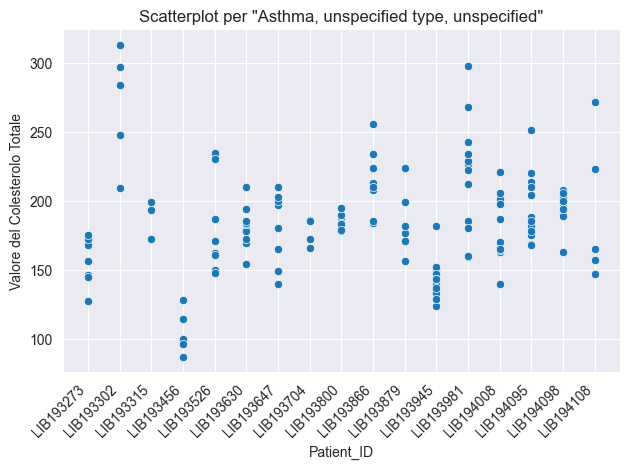

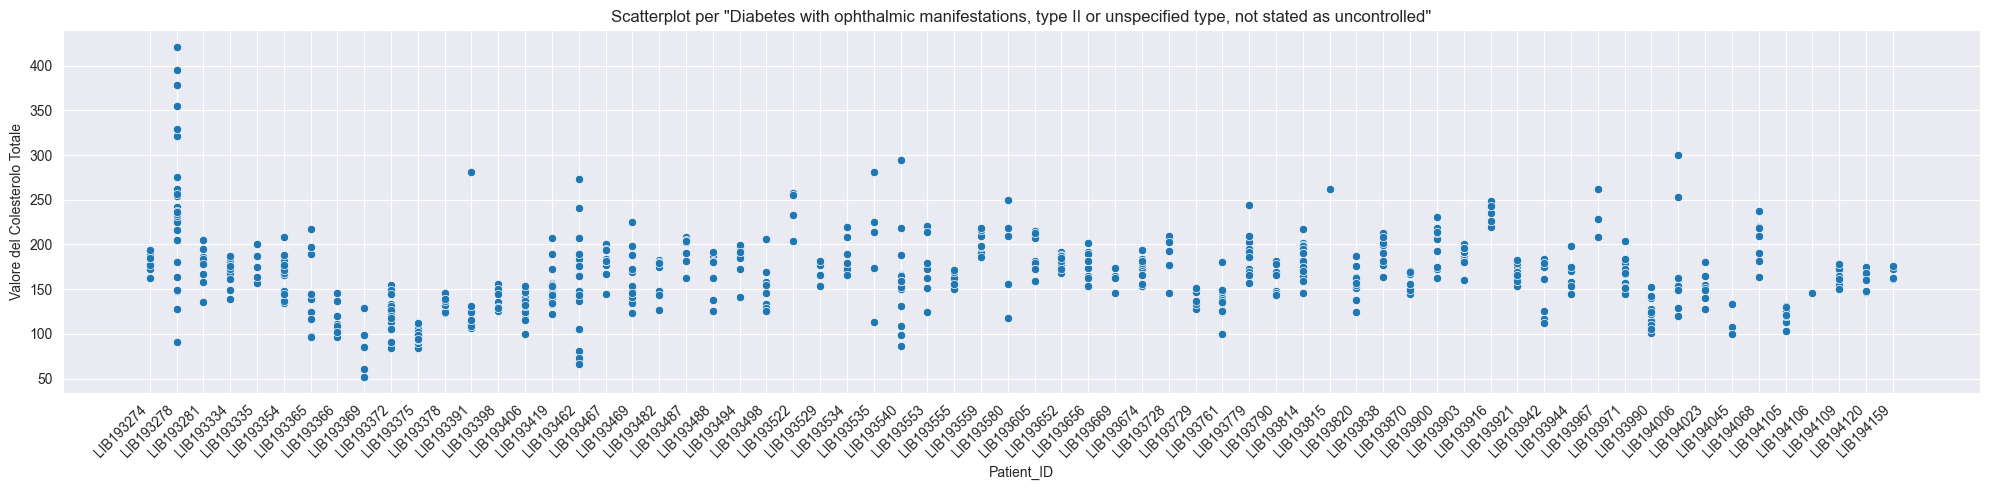

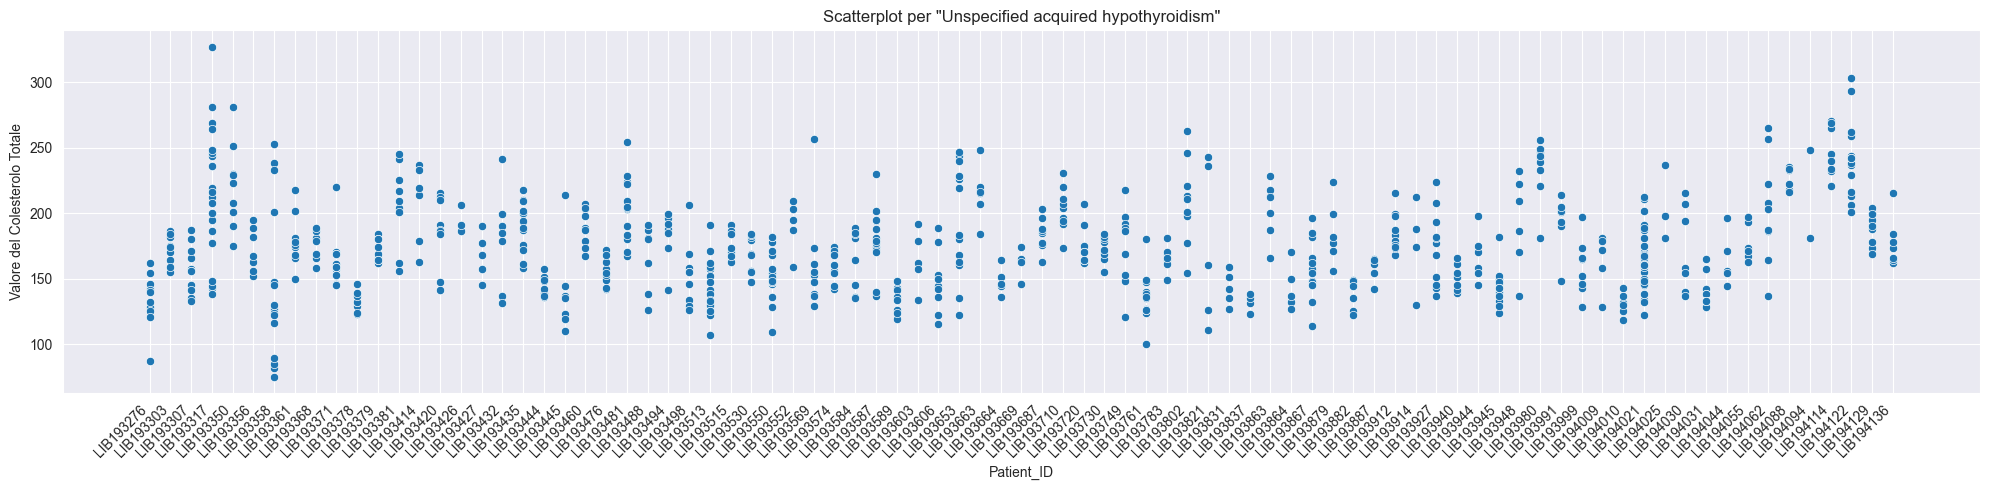

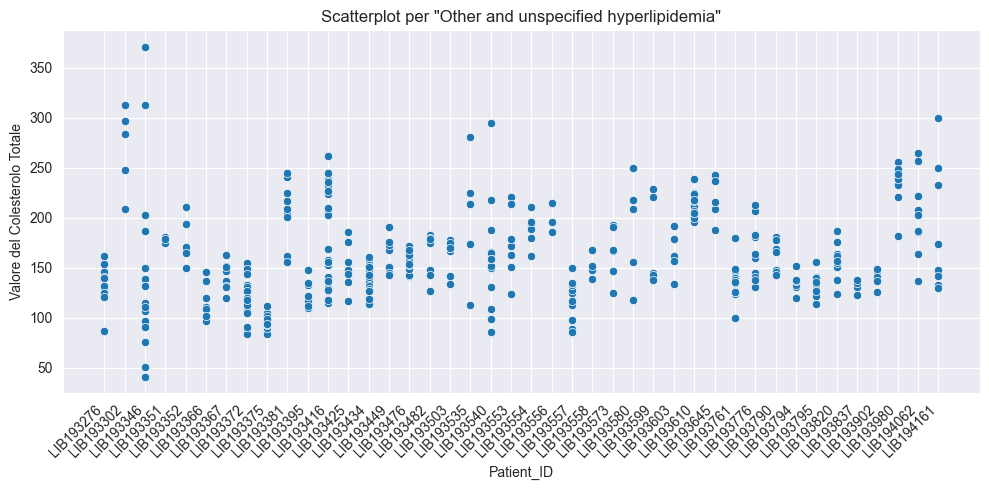

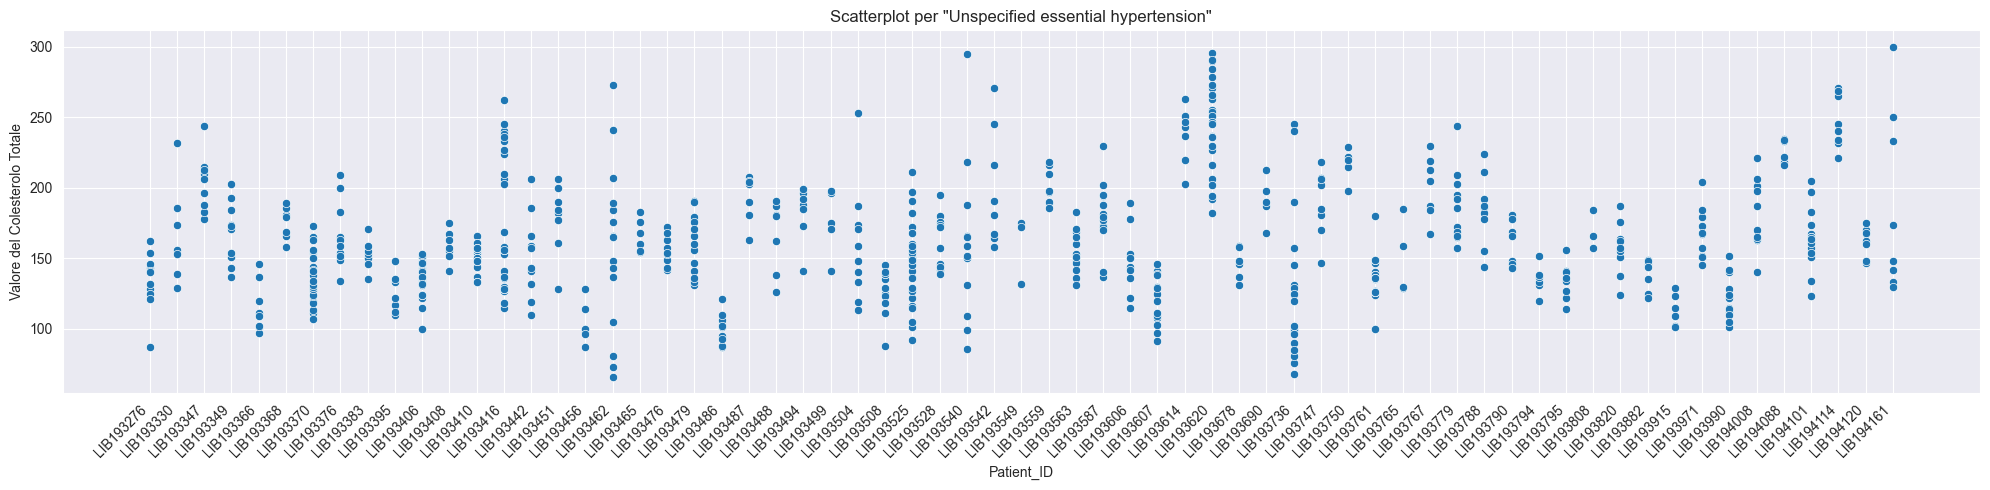

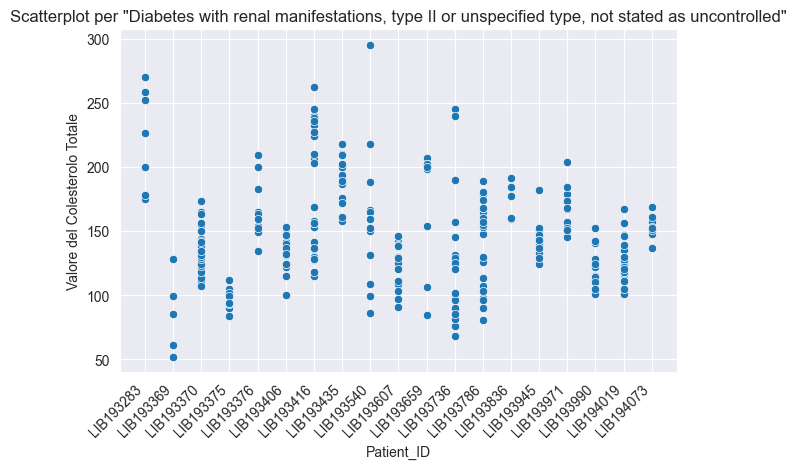

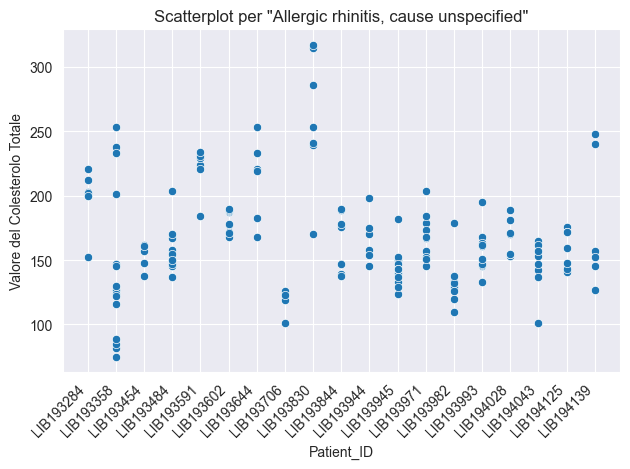

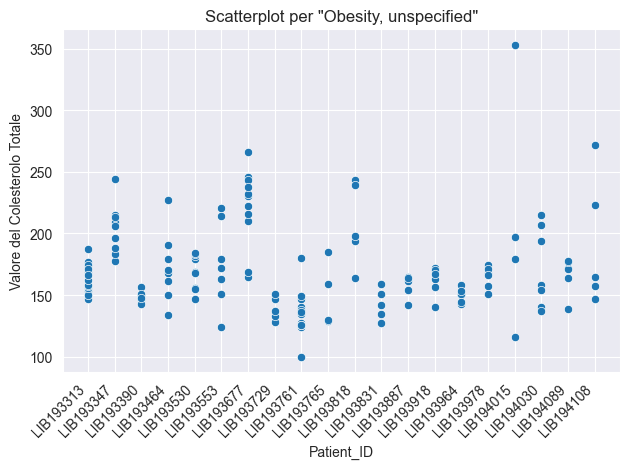

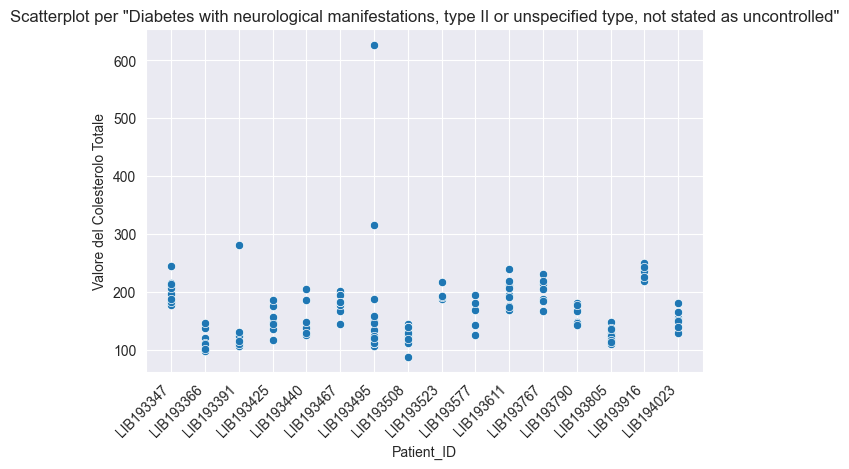

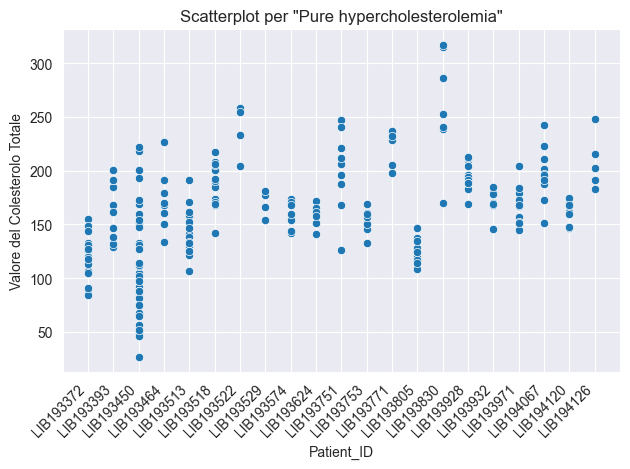

In [68]:
for description in cholesterol_diagnostic['Description'].unique():
    subset = cholesterol_diagnostic[cholesterol_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Colesterolo Totale')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Triglycerides

In [86]:
triglycerides_subset = Biochemical[(Biochemical['Name'] == 'Triglycerides')].copy()
triglycerides_subset.drop(['Name'], axis=1, inplace=True)
triglycerides_subset.describe()

Value
count  5791.000000
mean    102.973925
std      94.692856
min      23.000000
25%      61.000000
50%      81.000000
75%     116.000000
max    3447.000000

In [87]:
triglycerides_diagnostic = pd.merge(triglycerides_subset, Diagnostics, on='Patient_ID').copy()
triglycerides_diagnostic.drop(['Code'], axis=1, inplace=True)
triglycerides_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24   70.0   
1      LIB193266     2020-08-24   70.0   
2      LIB193266     2020-12-15   65.0   
3      LIB193266     2020-12-15   65.0   
4      LIB193266     2021-04-05   89.0   
...          ...            ...    ...   
17640  LIB194164     2020-12-30   73.0   
17641  LIB194164     2021-02-24  112.0   
17642  LIB194164     2021-09-20   83.0   
17643  LIB194164     2021-11-19   76.0   
17644  LIB194164     2022-01-12   70.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
17640  Unspecified abortion, without mention of compl...  
17641  Unspecified abortion, without mention of compl...  
17642  Unspecified abortion, without mention of compl...  
17643  Unspecified abortion, without mention of compl...  
17644  Unspecified abortion, without mention of compl...  

[17645 rows x 4 columns]

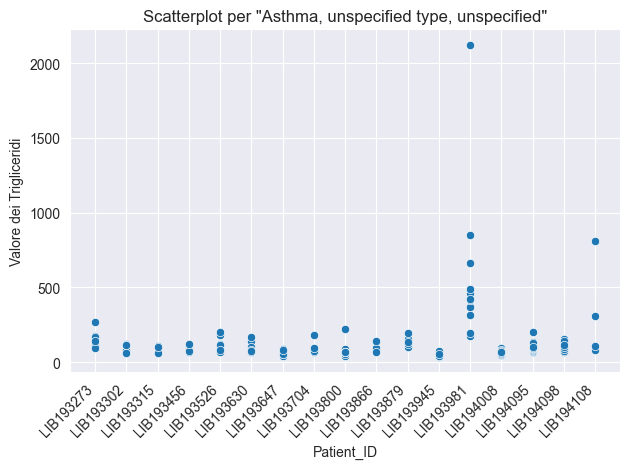

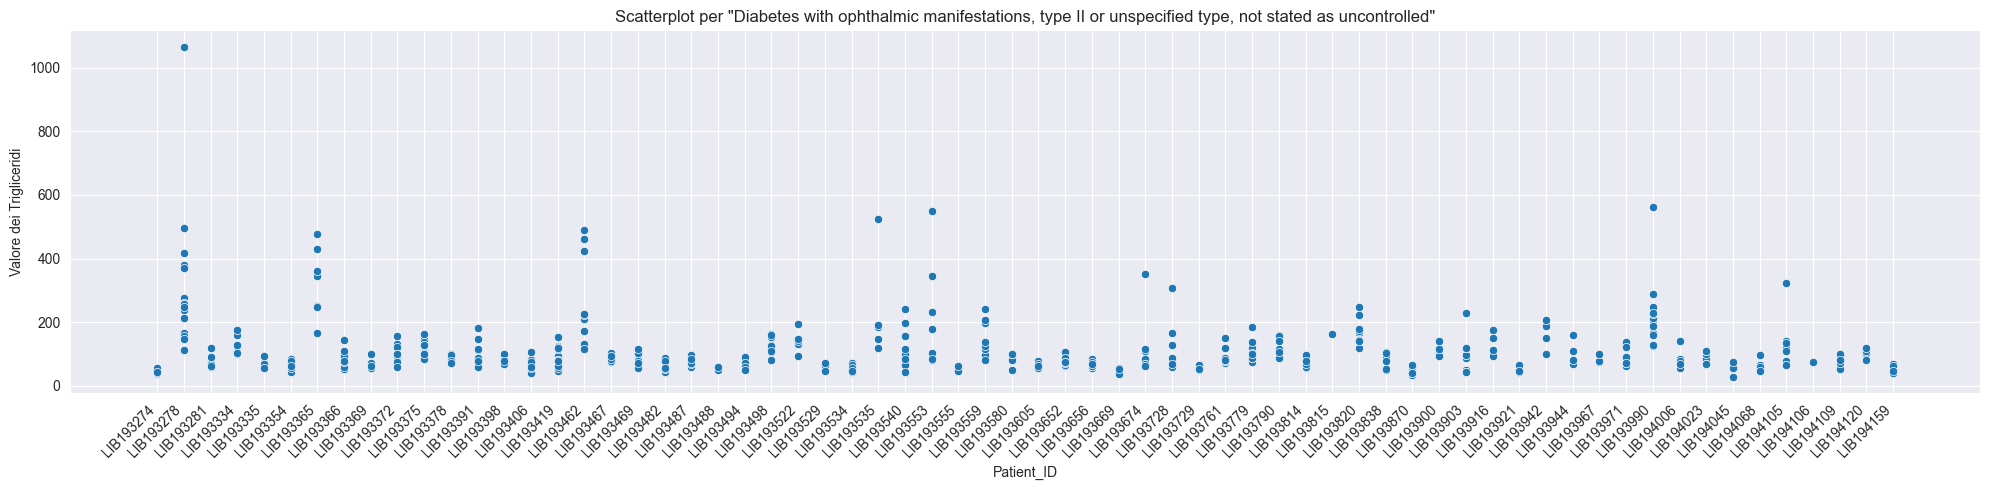

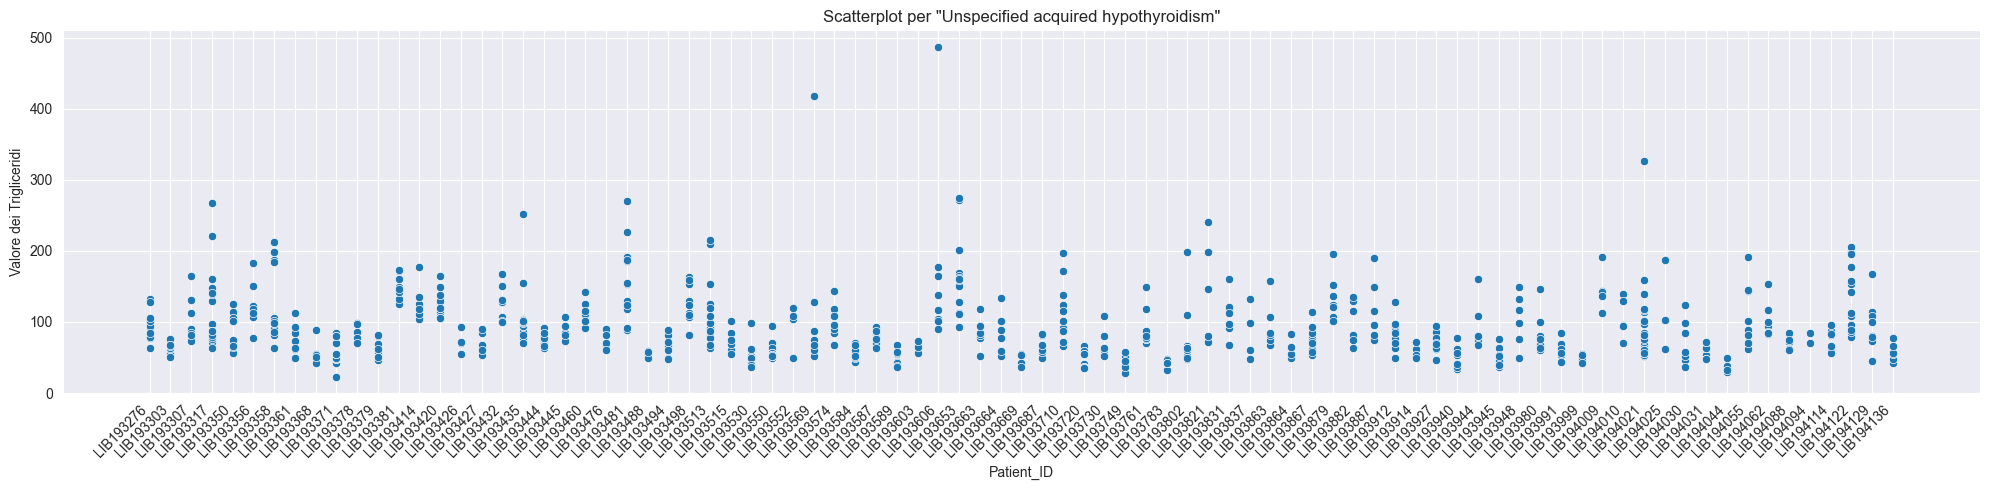

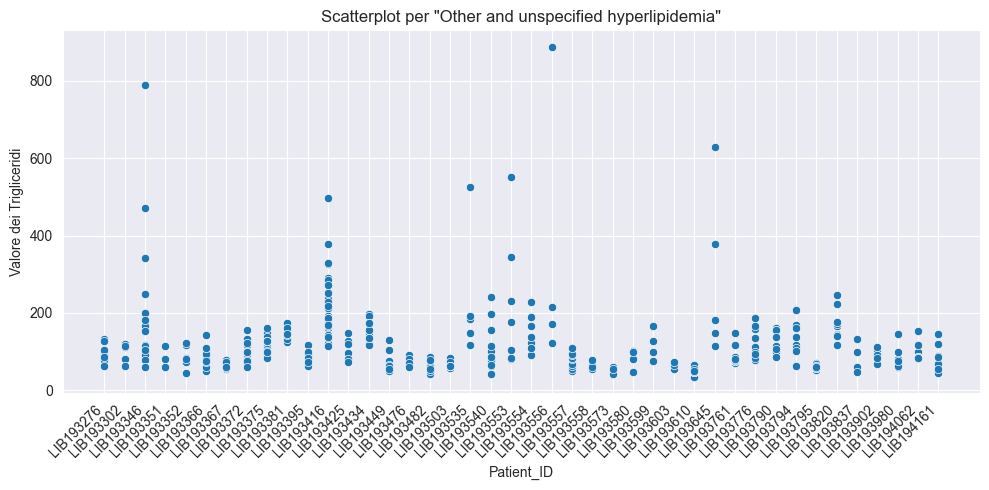

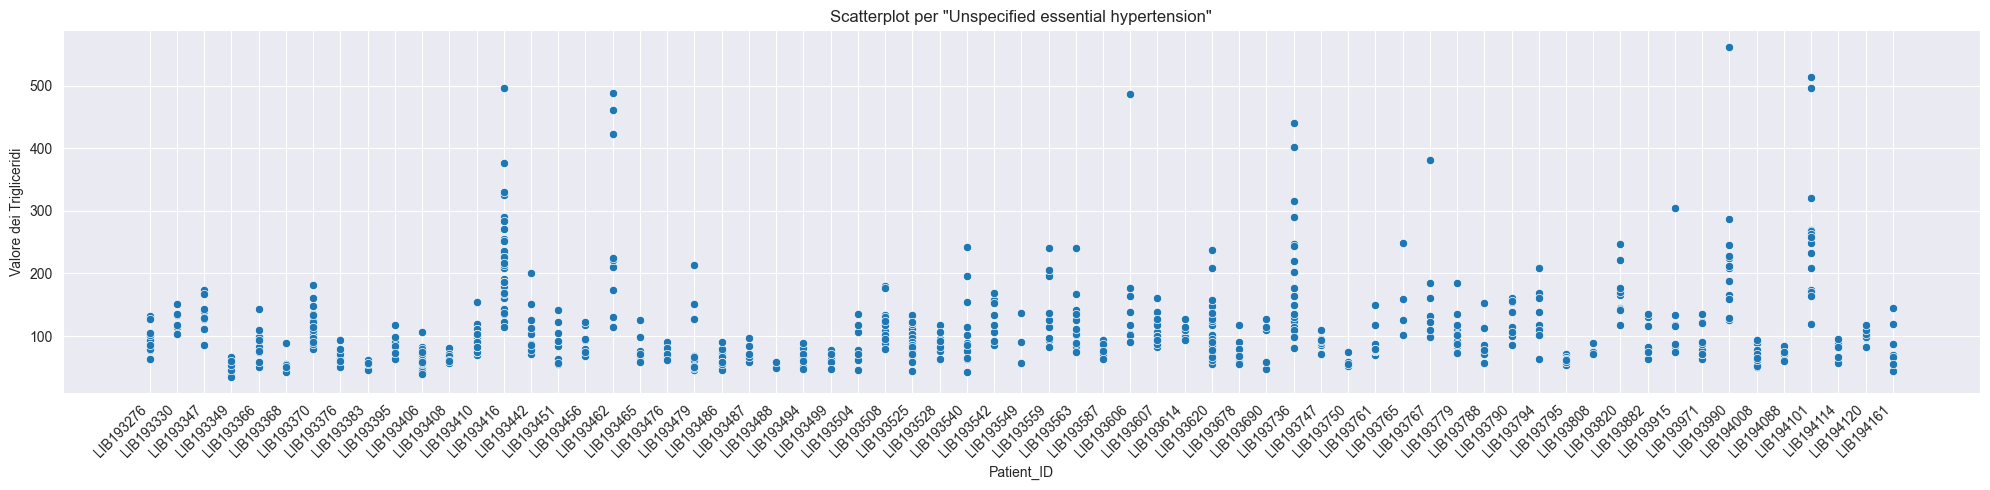

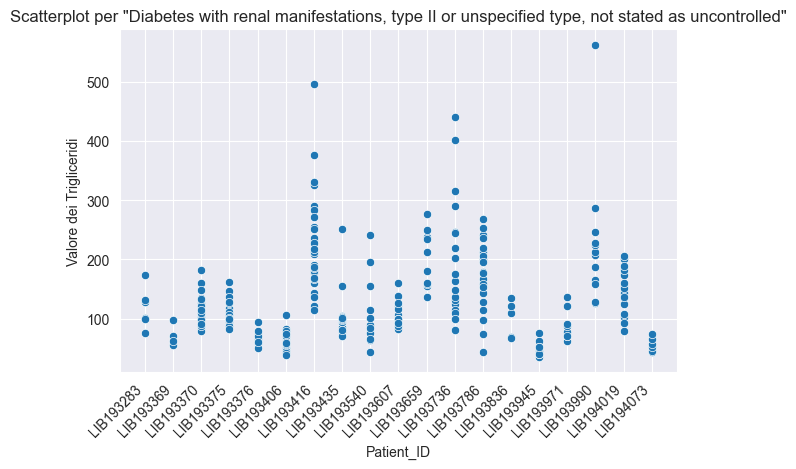

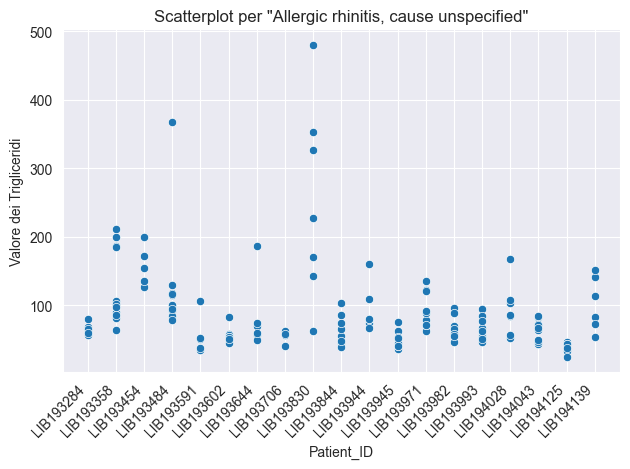

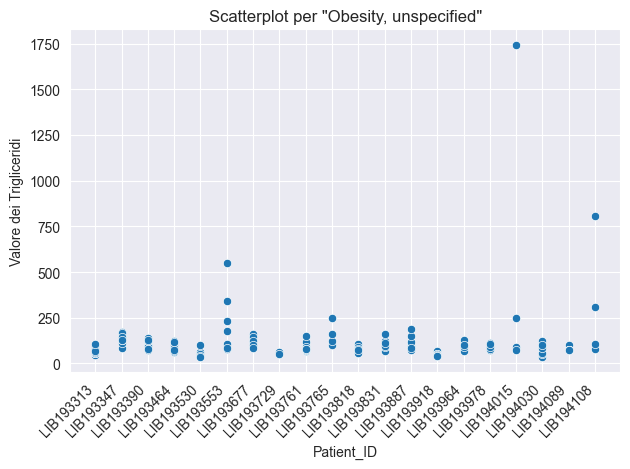

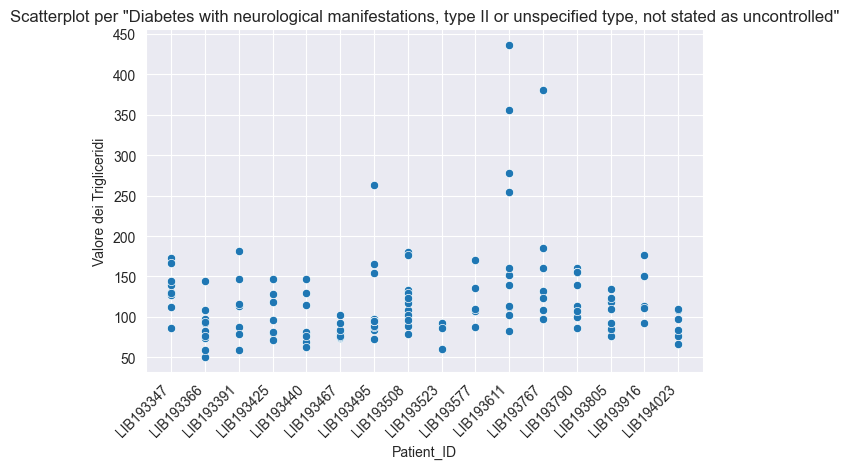

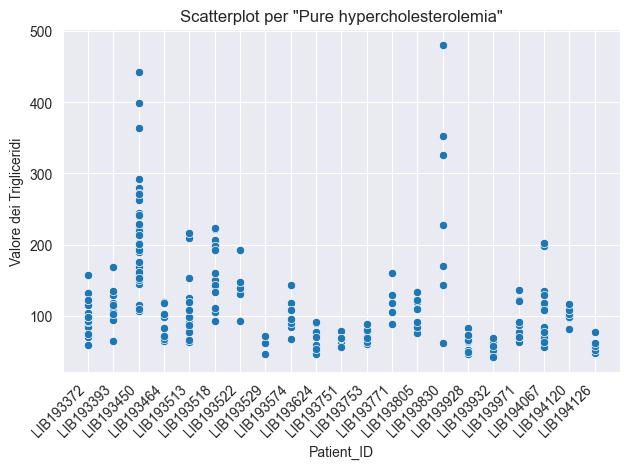

In [88]:
for description in triglycerides_diagnostic['Description'].unique():
    subset = triglycerides_diagnostic[triglycerides_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore dei Trigliceridi')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### HDL cholesterol

In [89]:
HDL_subset = Biochemical[(Biochemical['Name'] == 'HDL cholesterol')].copy()
HDL_subset.drop(['Name'], axis=1, inplace=True)
HDL_subset.describe()

Value
count  5062.000000
mean     56.626827
std      14.367272
min       7.000000
25%      47.000000
50%      55.000000
75%      65.000000
max     137.000000

In [90]:
HDL_diagnostic = pd.merge(HDL_subset, Diagnostics, on='Patient_ID').copy()
HDL_diagnostic.drop(['Code'], axis=1, inplace=True)
HDL_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24   51.0   
1      LIB193266     2020-08-24   51.0   
2      LIB193266     2020-12-15   50.0   
3      LIB193266     2020-12-15   50.0   
4      LIB193266     2021-04-05   41.0   
...          ...            ...    ...   
14416  LIB194164     2020-08-17   62.0   
14417  LIB194164     2020-12-30   53.0   
14418  LIB194164     2021-02-24   54.0   
14419  LIB194164     2021-09-20   57.0   
14420  LIB194164     2022-01-12   55.0   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
14416  Unspecified abortion, without mention of compl...  
14417  Unspecified abortion, without mention of compl...  
14418  Unspecified abortion, without mention of compl...  
14419  Unspecified abortion, without mention of compl...  
14420  Unspecified abortion, without mention of compl...  

[14421 rows x 4 columns]

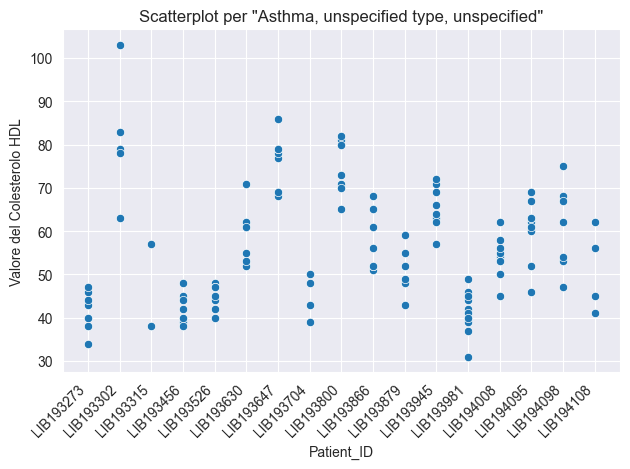

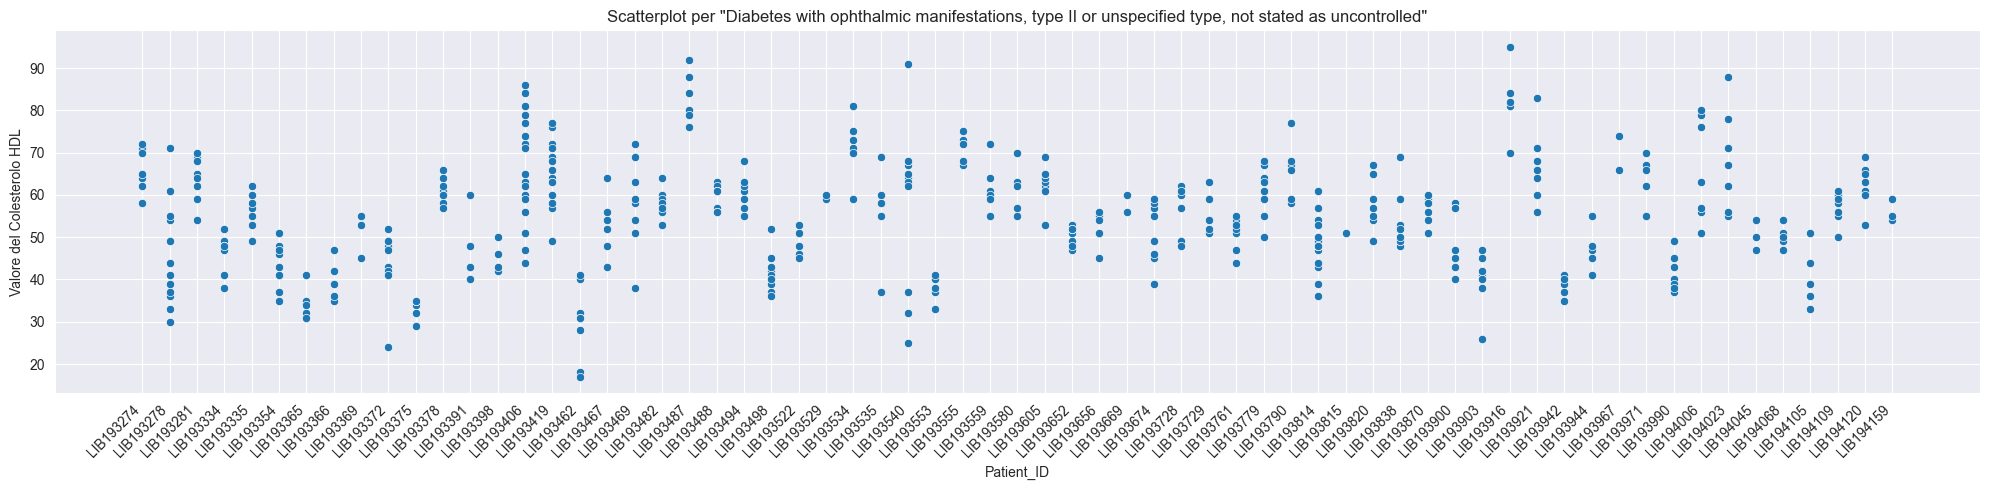

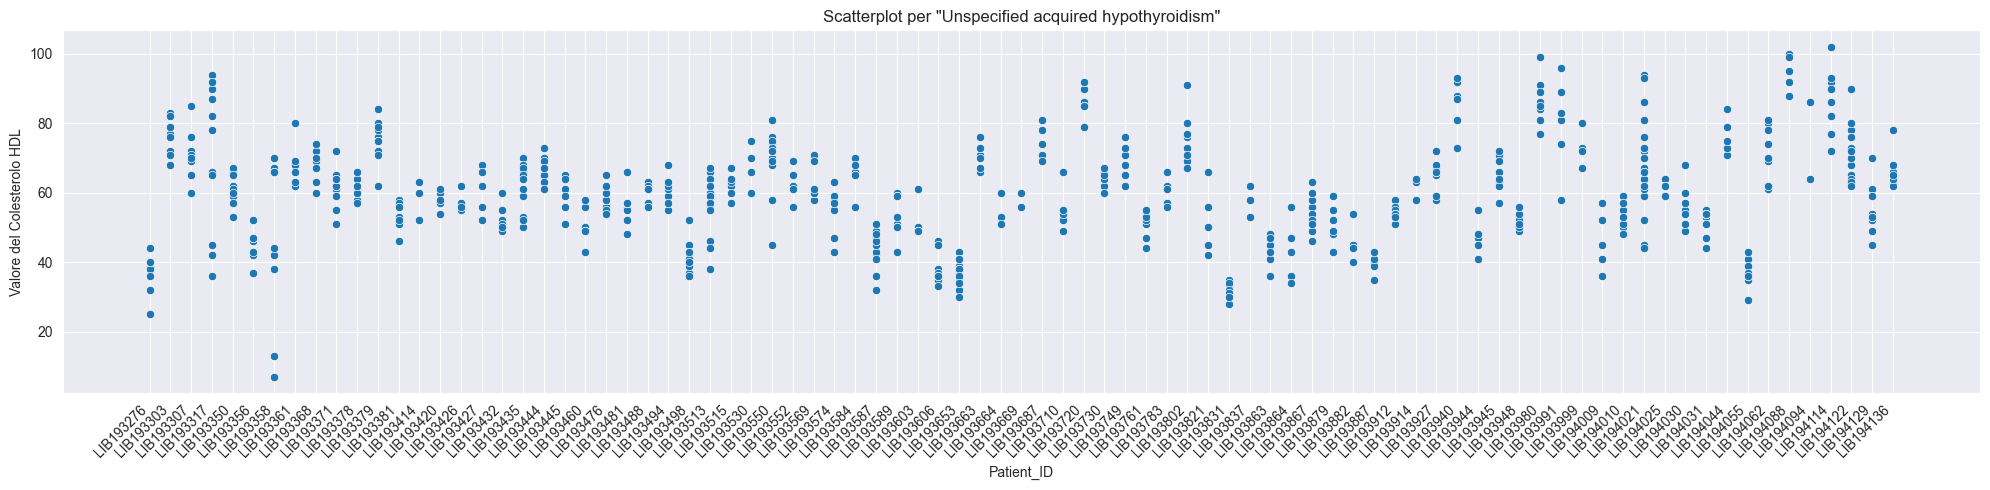

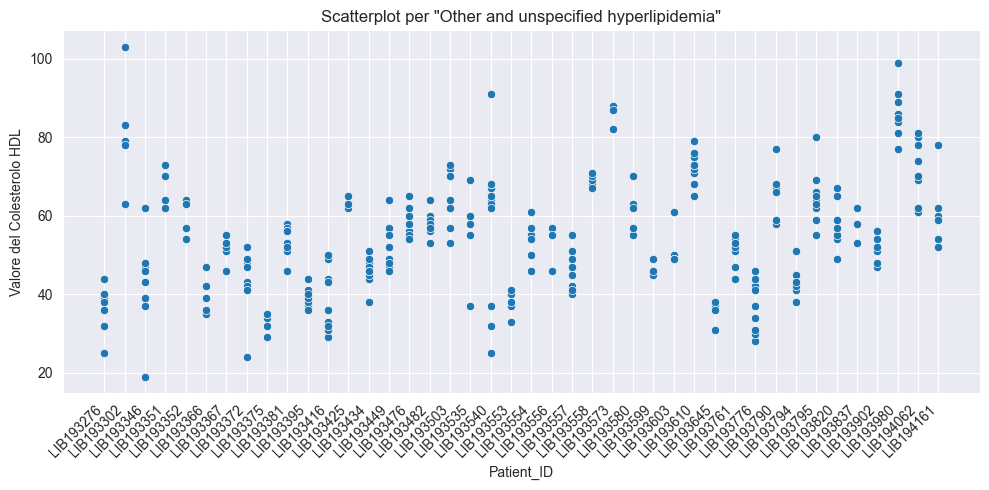

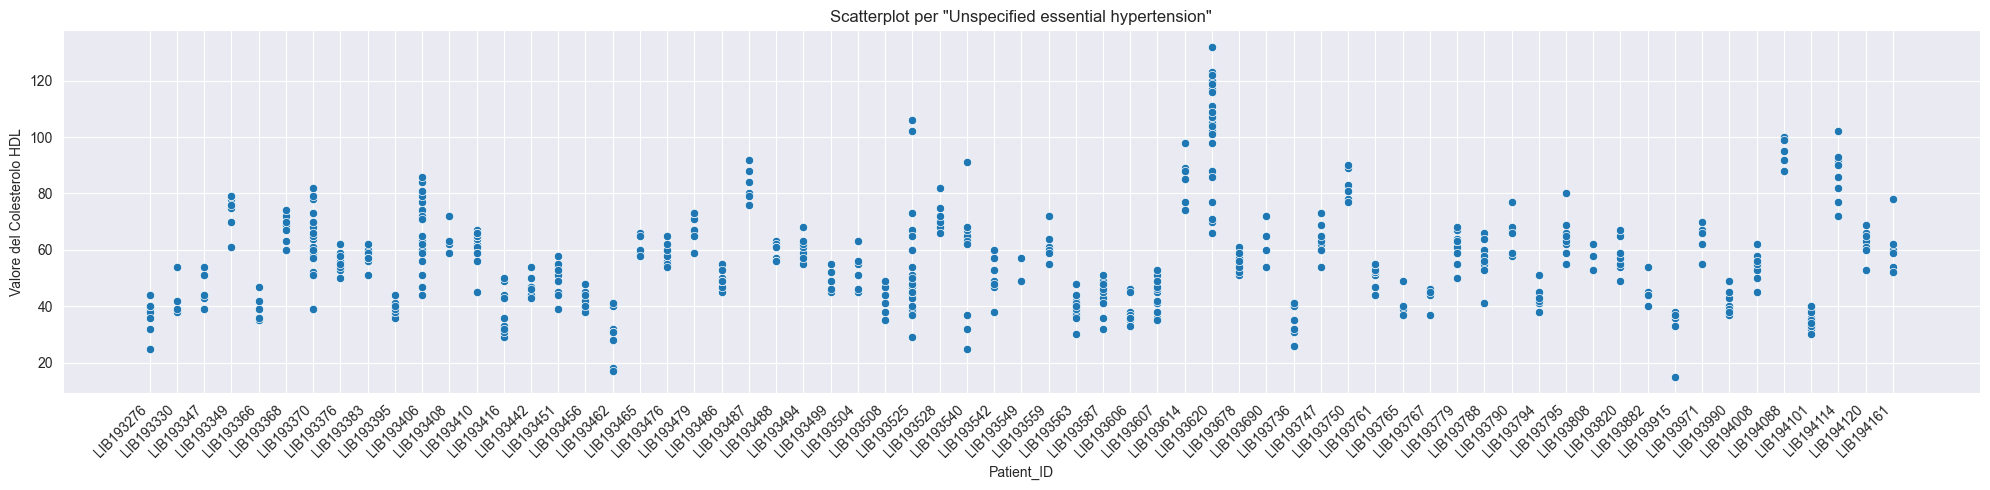

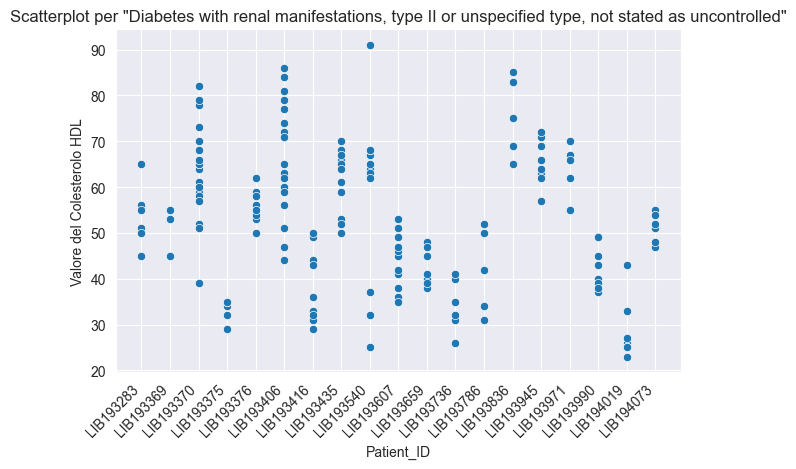

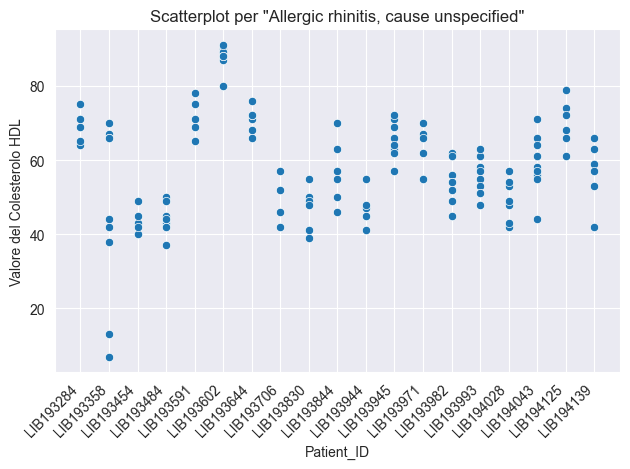

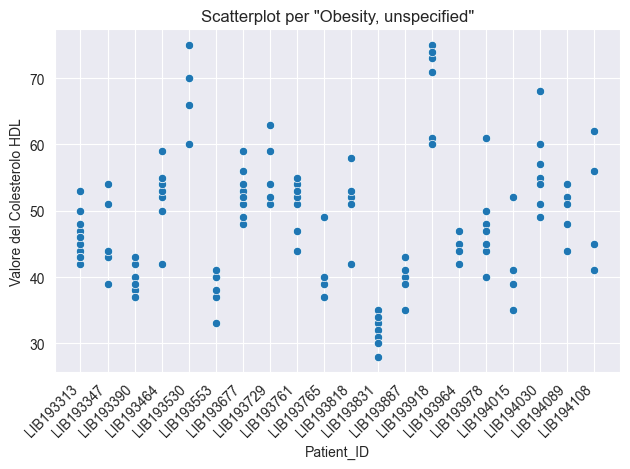

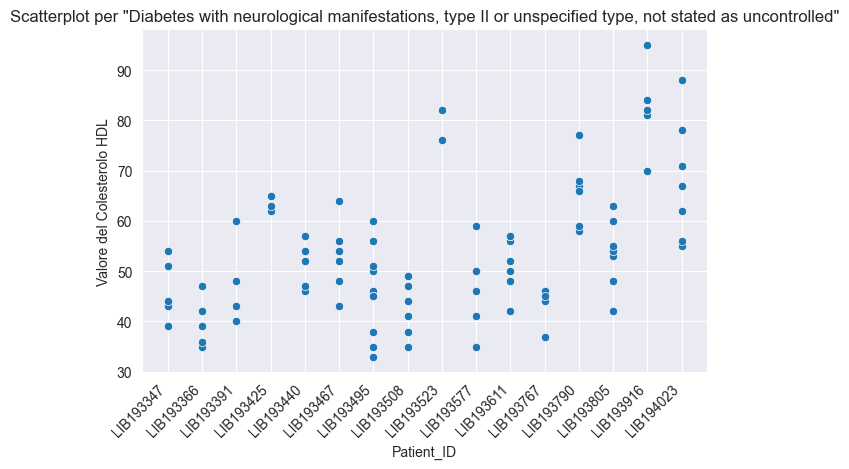

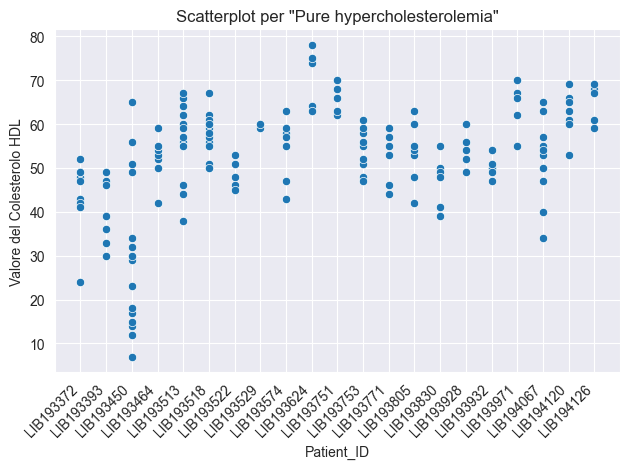

In [91]:
for description in HDL_diagnostic['Description'].unique():
    subset = HDL_diagnostic[HDL_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore del Colesterolo HDL')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Uric acid

In [92]:
uric_subset = Biochemical[(Biochemical['Name'] == 'Uric acid')].copy()
uric_subset.drop(['Name'], axis=1, inplace=True)
uric_subset.describe()

Value
count  4839.000000
mean      4.392238
std       1.537233
min       1.000000
25%       3.300000
50%       4.200000
75%       5.100000
max      14.200000

In [93]:
uric_diagnostic = pd.merge(uric_subset, Diagnostics, on='Patient_ID').copy()
uric_diagnostic.drop(['Code'], axis=1, inplace=True)
uric_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24    2.5   
1      LIB193266     2020-08-24    2.5   
2      LIB193266     2021-04-05    5.0   
3      LIB193266     2021-04-05    5.0   
4      LIB193266     2021-11-05    6.0   
...          ...            ...    ...   
14851  LIB194164     2020-08-17    3.0   
14852  LIB194164     2020-12-30    4.3   
14853  LIB194164     2021-02-24    2.7   
14854  LIB194164     2021-09-20    3.9   
14855  LIB194164     2022-01-12    3.3   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
14851  Unspecified abortion, without mention of compl...  
14852  Unspecified abortion, without mention of compl...  
14853  Unspecified abortion, without mention of compl...  
14854  Unspecified abortion, without mention of compl...  
14855  Unspecified abortion, without mention of compl...  

[14856 rows x 4 columns]

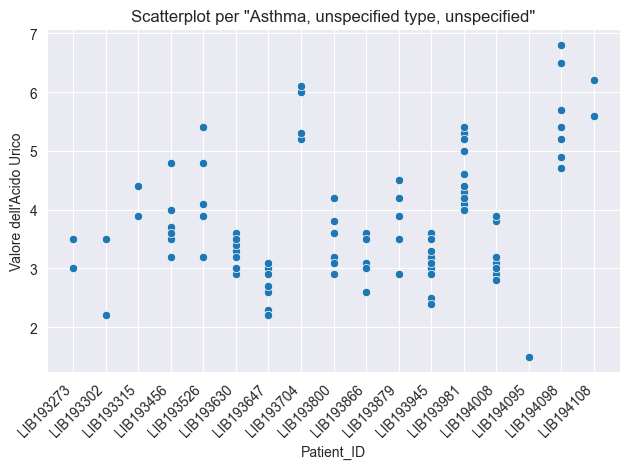

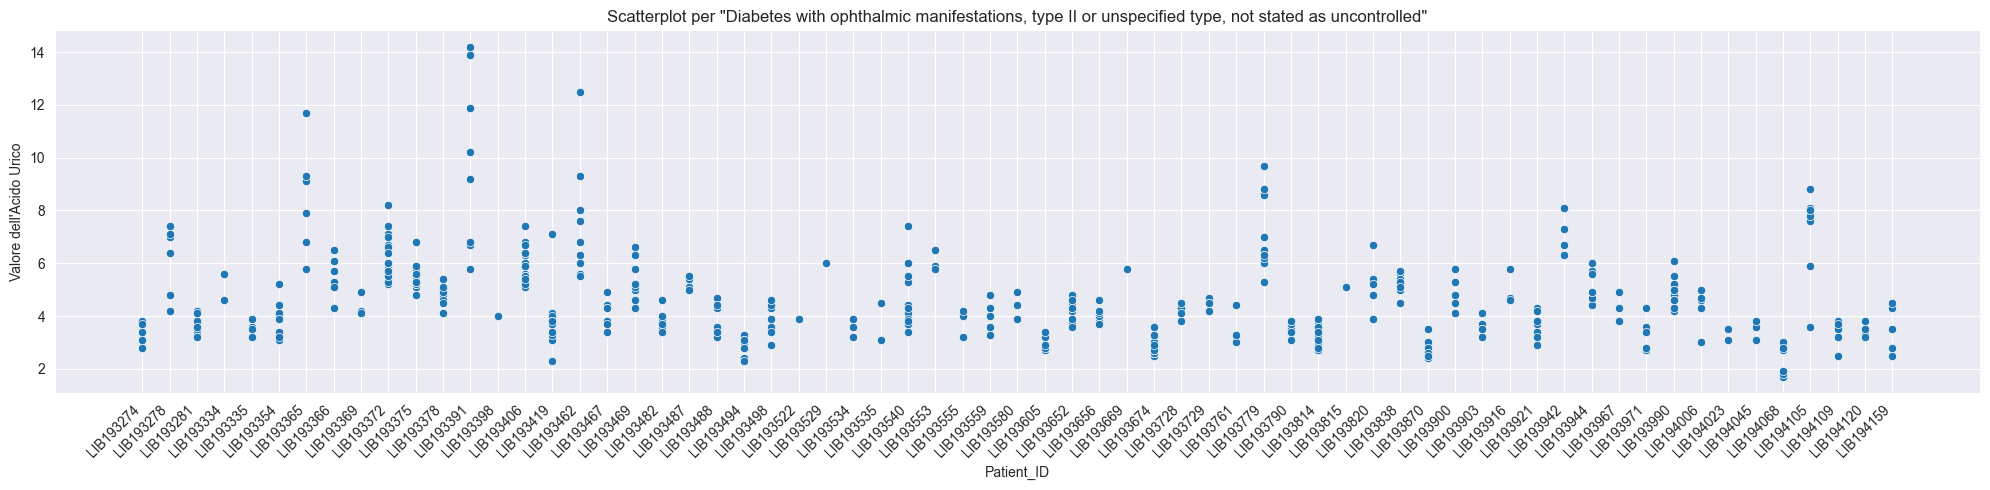

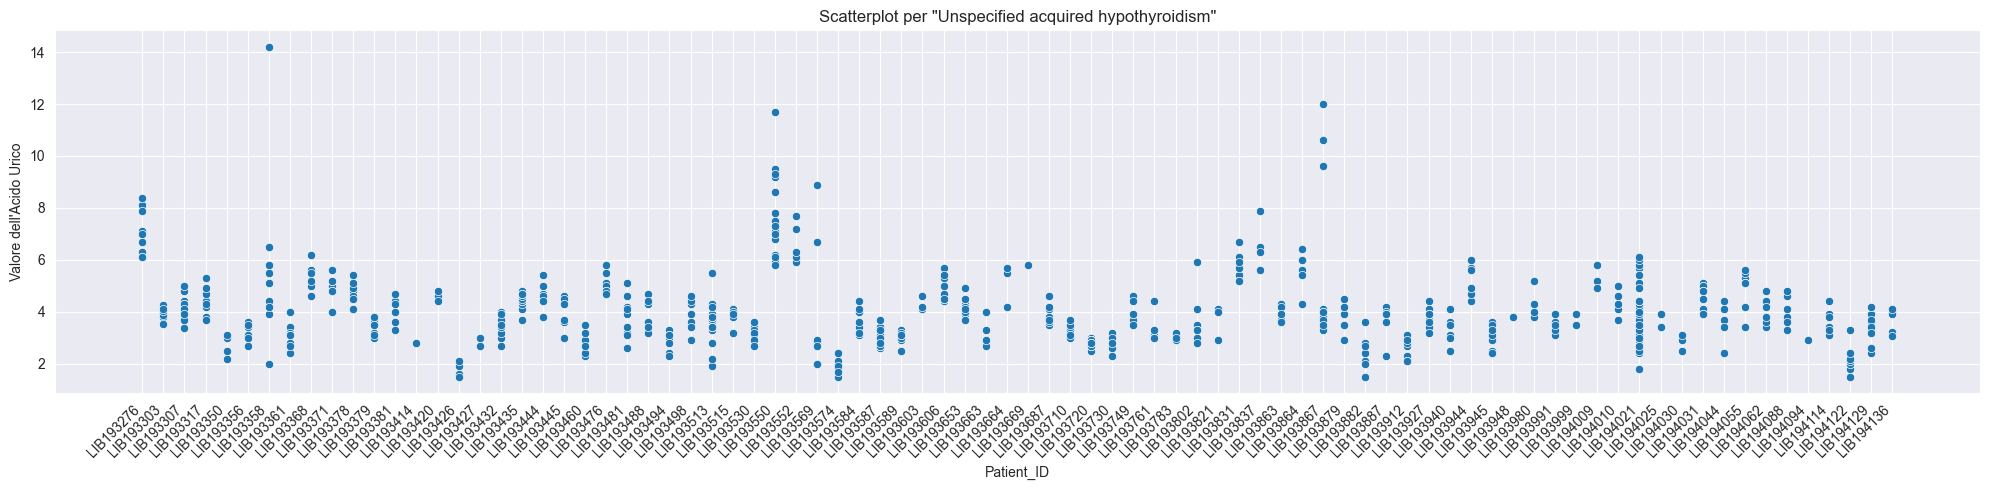

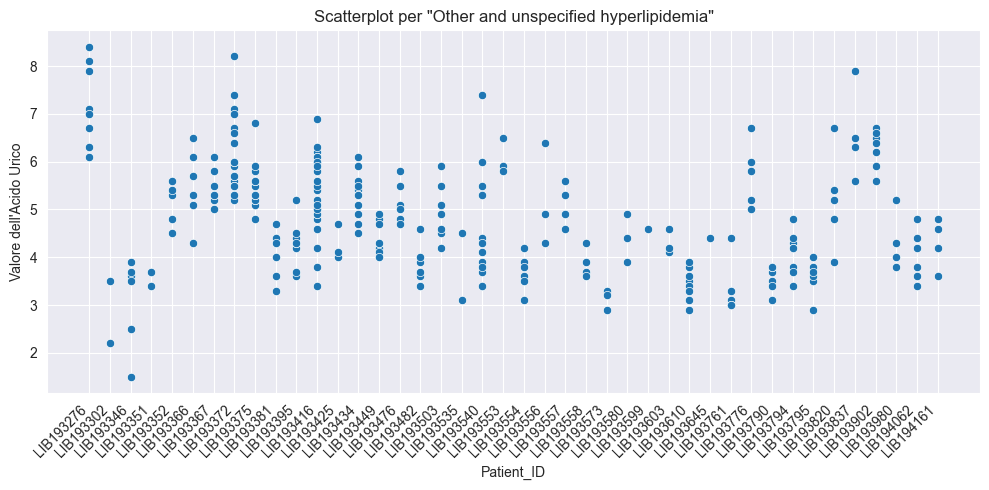

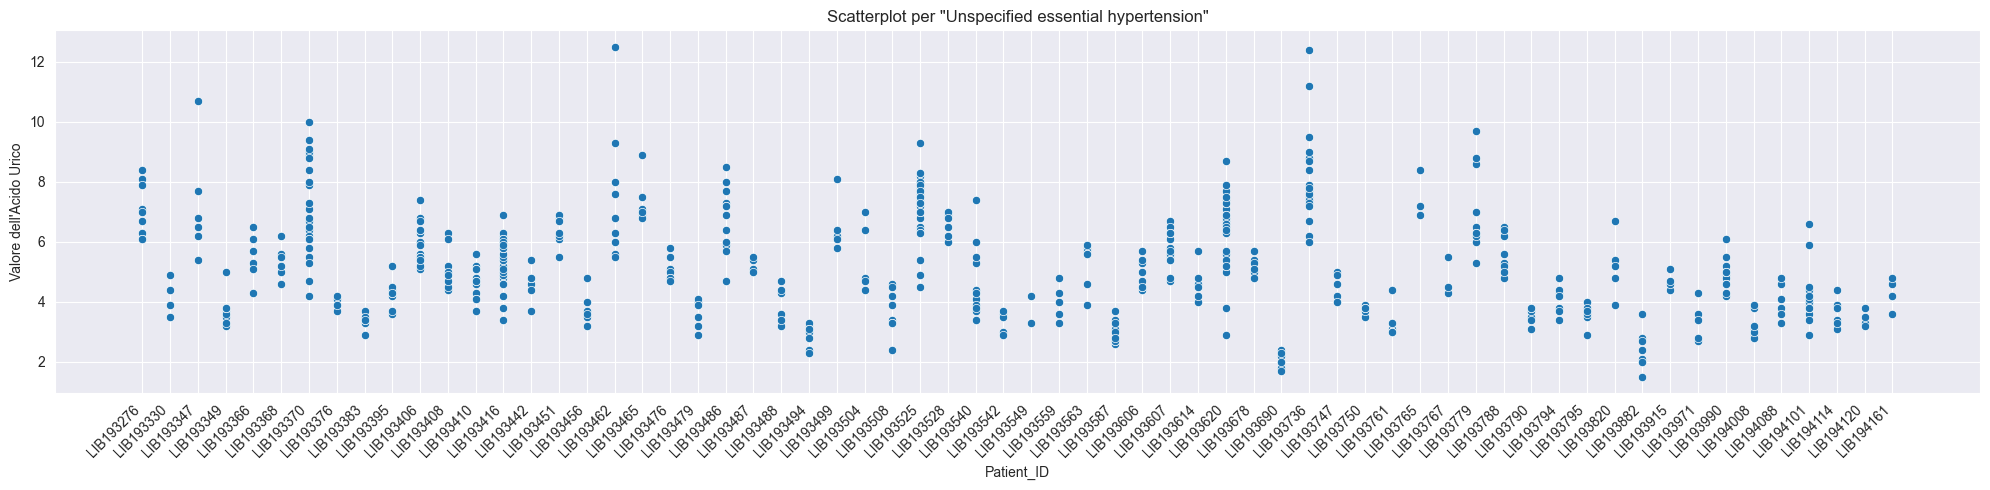

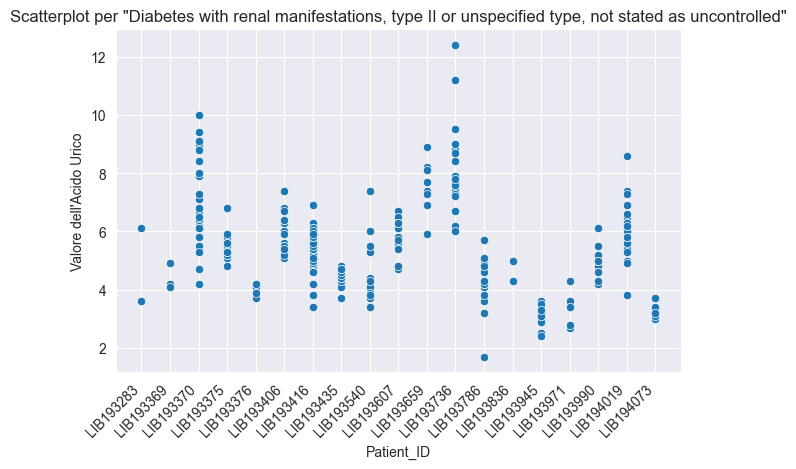

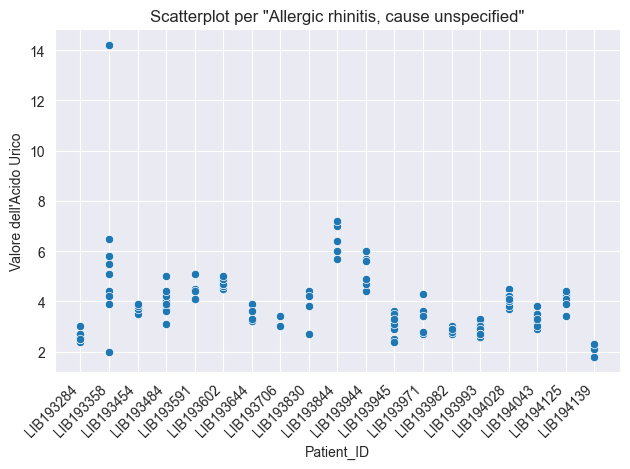

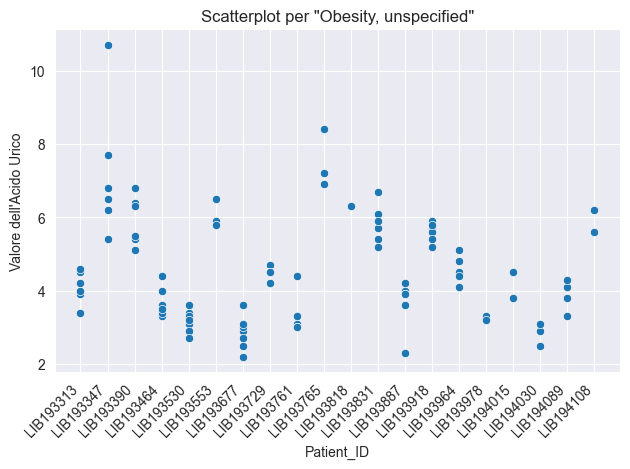

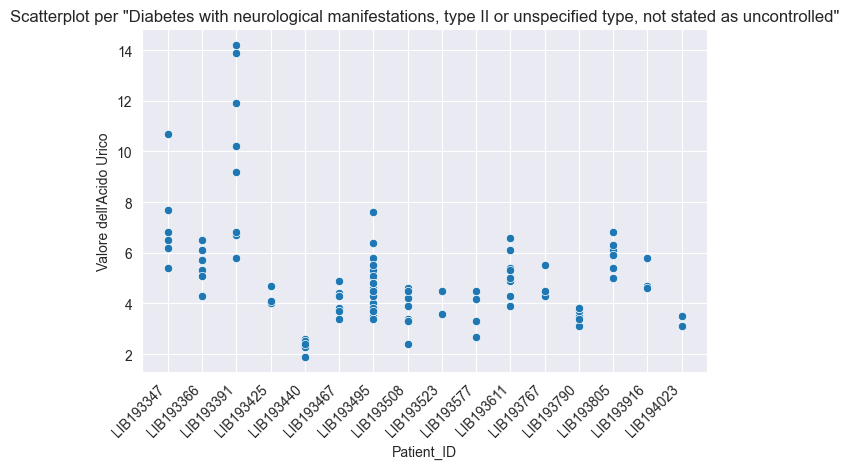

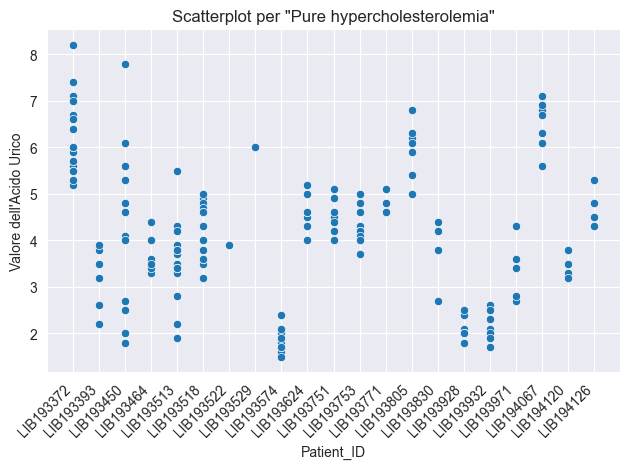

In [94]:
for description in uric_diagnostic['Description'].unique():
    subset = uric_diagnostic[uric_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()
    
    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20,5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore dell\'Acido Urico')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout() 
        plt.show()

#### Glycated hemoglobin (A1c)

In [95]:
A1c_subset = Biochemical[(Biochemical['Name'] == 'Glycated hemoglobin (A1c)')].copy()
A1c_subset.drop(['Name'], axis=1, inplace=True)
A1c_subset.describe()

Value
count  4776.000000
mean      7.823137
std       1.385512
min       4.000000
25%       6.900000
50%       7.600000
75%       8.400000
max      18.000000

In [96]:
A1c_diagnostic = pd.merge(A1c_subset, Diagnostics, on='Patient_ID').copy()
A1c_diagnostic.drop(['Code'], axis=1, inplace=True)
A1c_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24   15.7   
1      LIB193266     2020-08-24   15.7   
2      LIB193266     2020-12-15    6.9   
3      LIB193266     2020-12-15    6.9   
4      LIB193266     2021-04-05    7.5   
...          ...            ...    ...   
12723  LIB194164     2020-12-30    6.7   
12724  LIB194164     2021-02-24    6.7   
12725  LIB194164     2021-04-14    6.6   
12726  LIB194164     2021-09-20    7.2   
12727  LIB194164     2022-01-12    7.2   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
12723  Unspecified abortion, without mention of compl...  
12724  Unspecified abortion, without mention of compl...  
12725  Unspecified abortion, without mention of compl...  
12726  Unspecified abortion, without mention of compl...  
12727  Unspecified abortion, without mention of compl...  

[12728 rows x 4 columns]

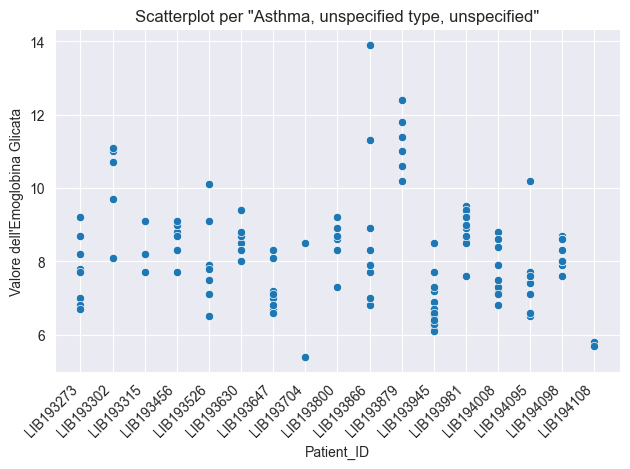

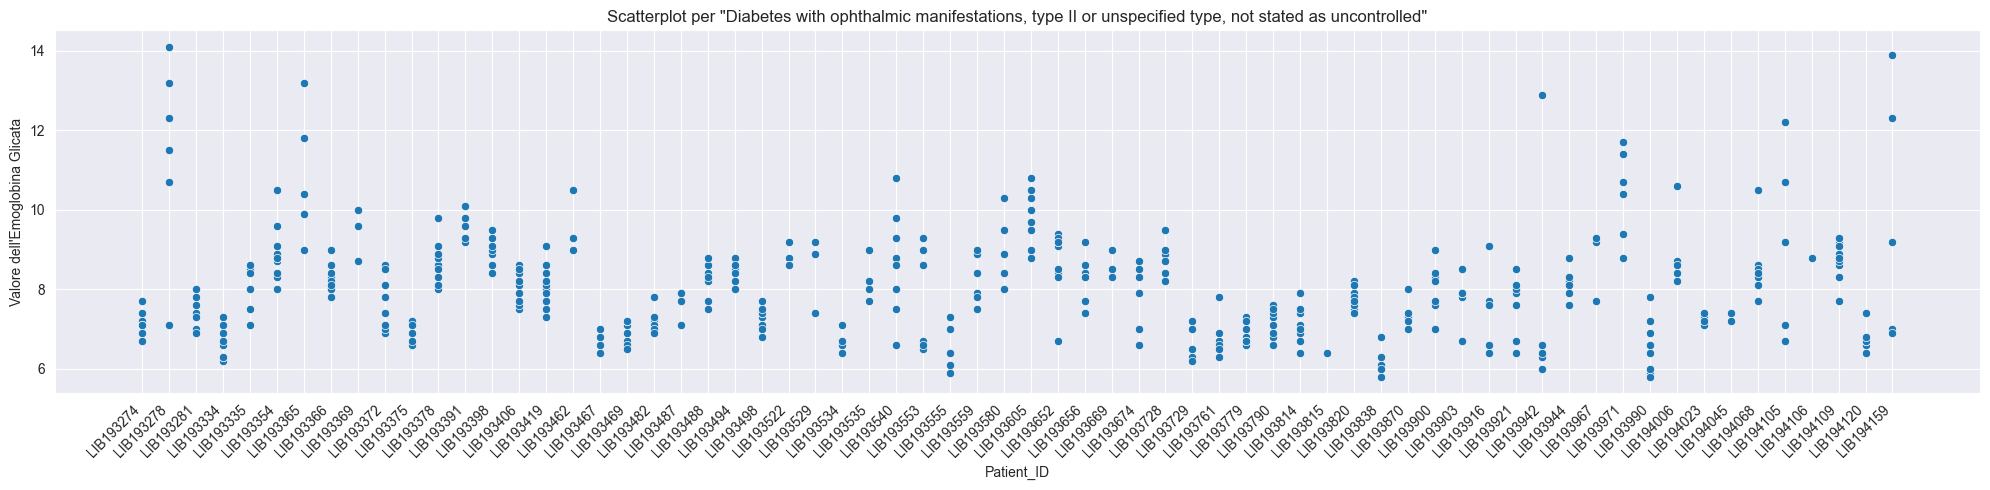

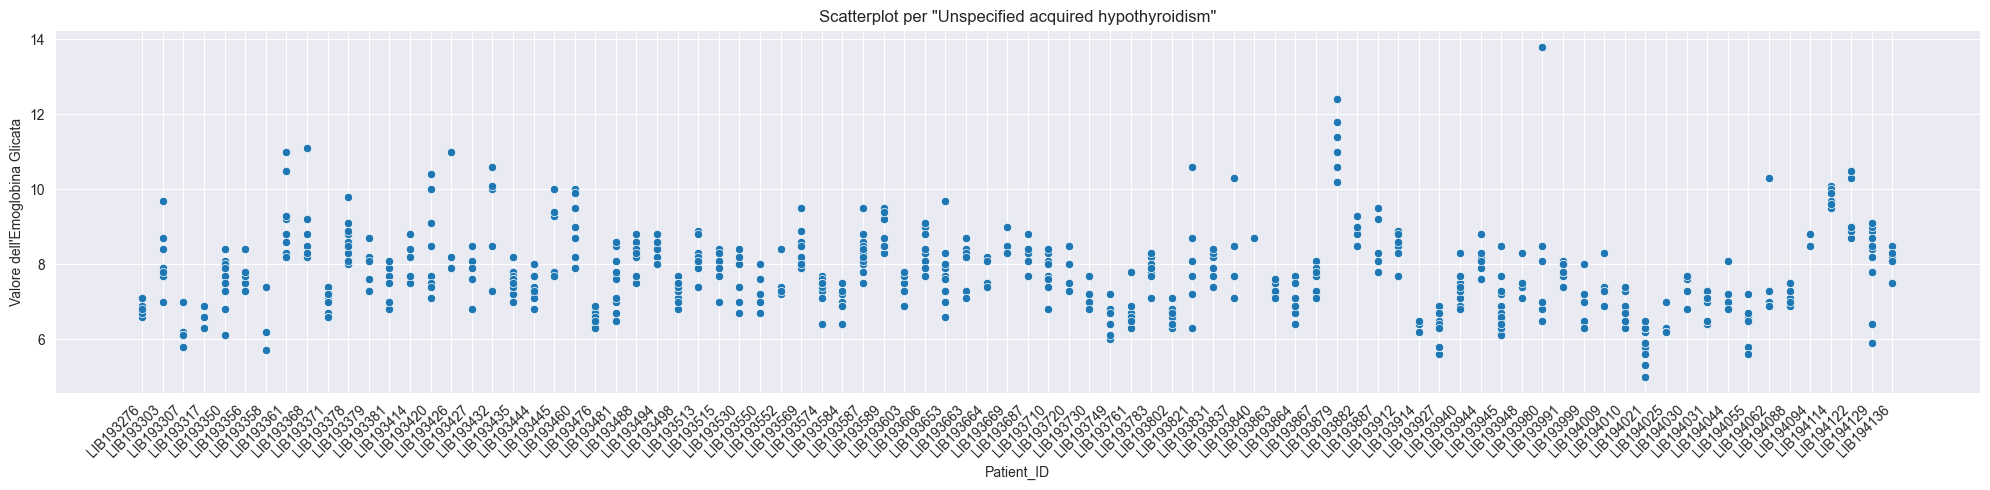

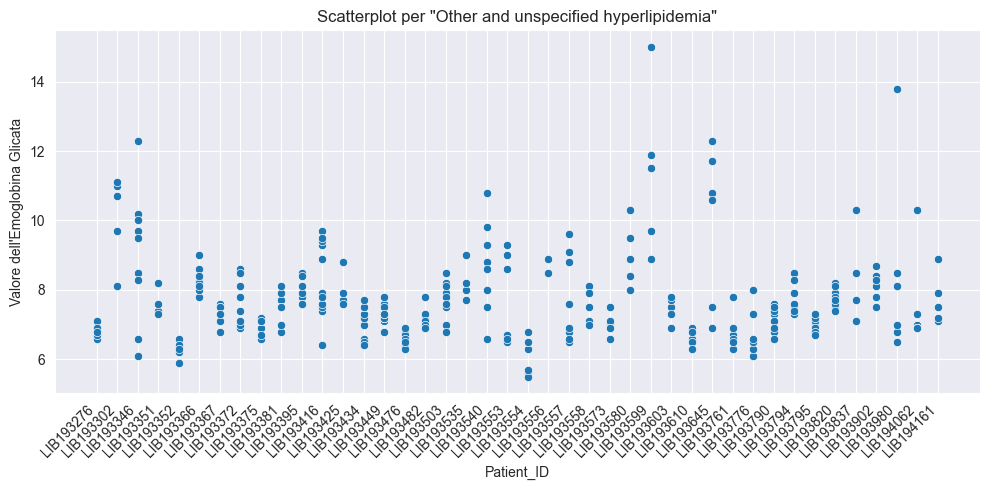

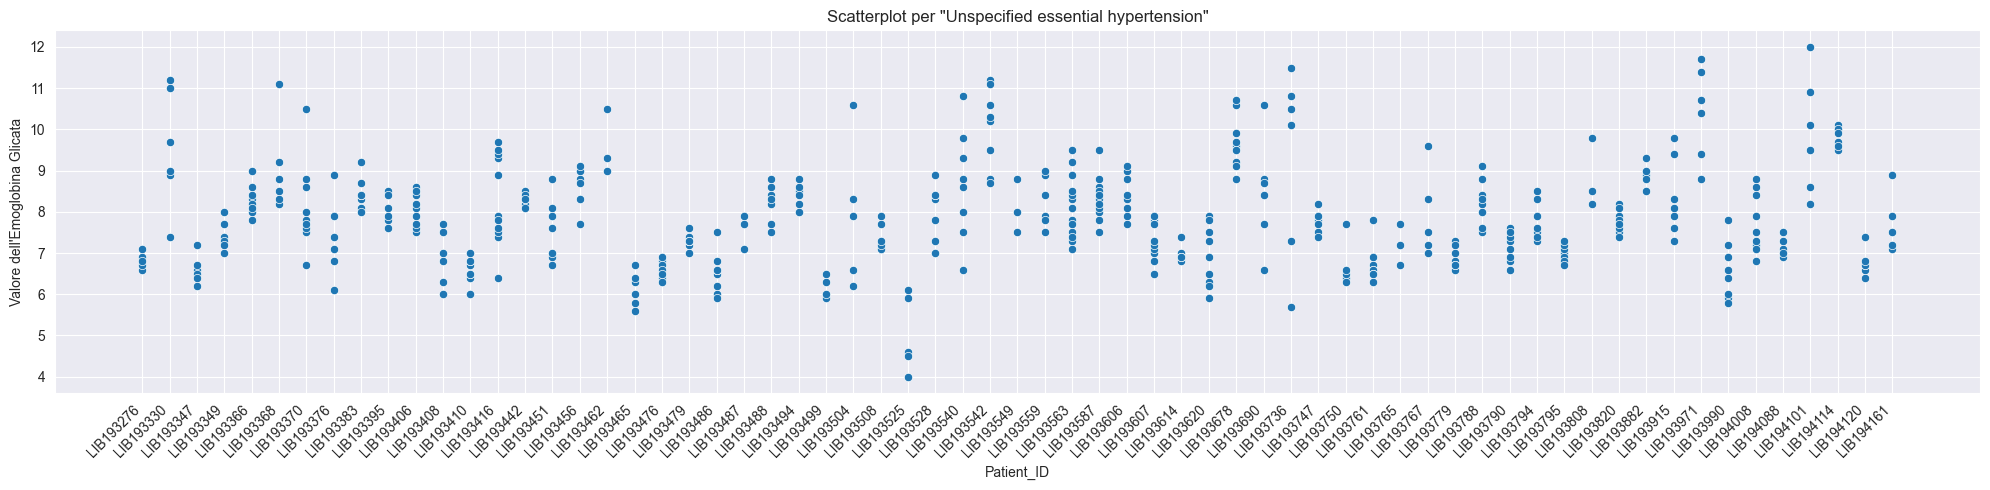

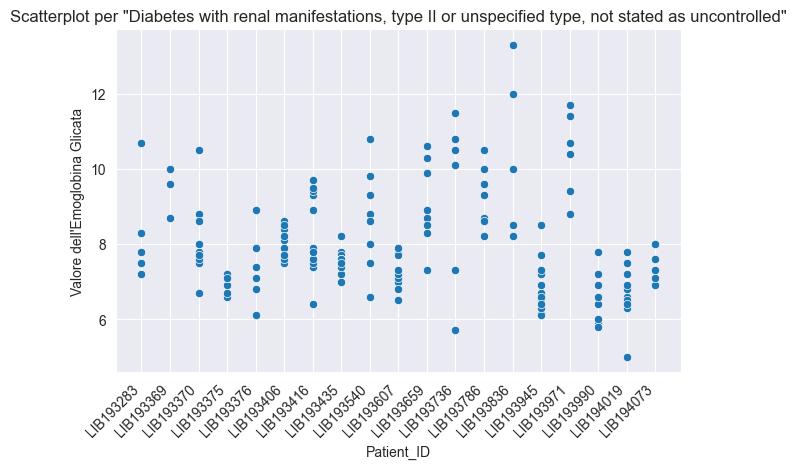

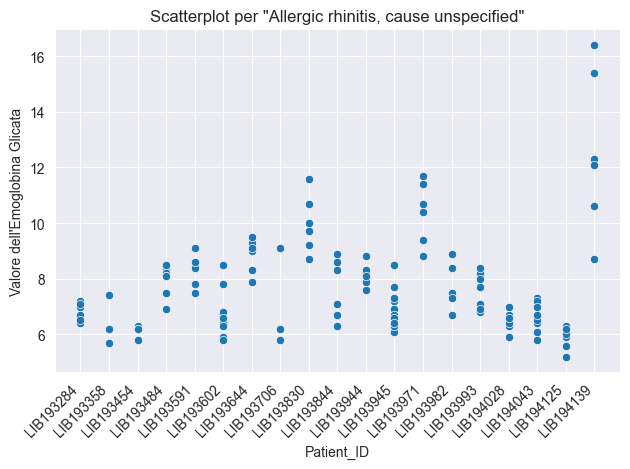

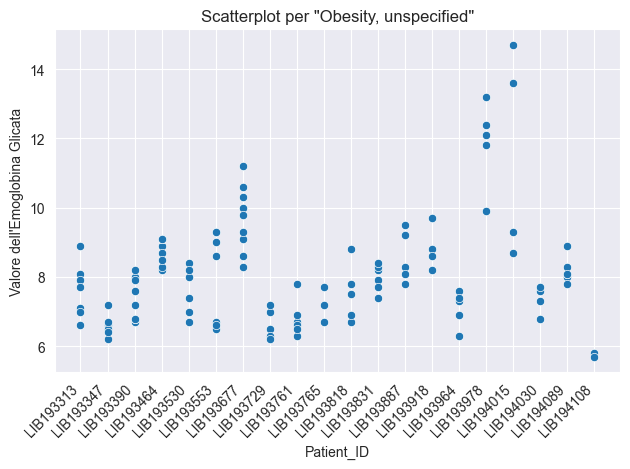

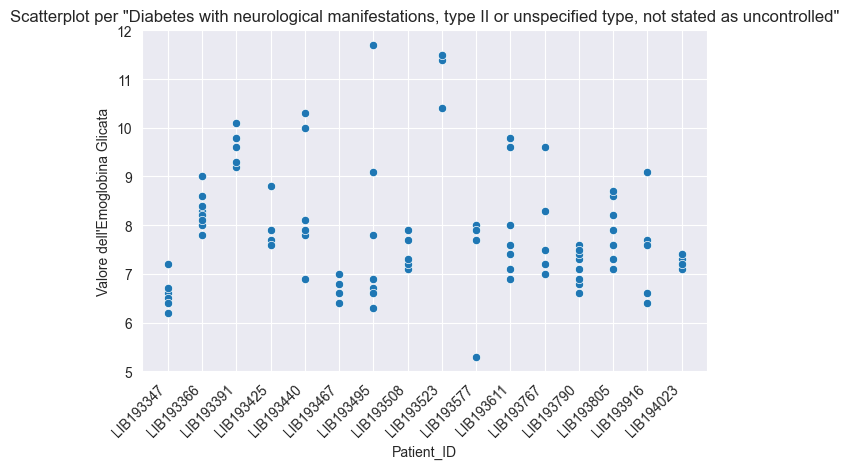

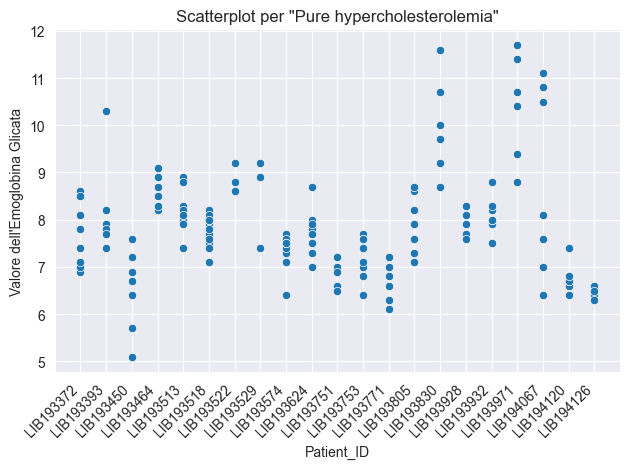

In [97]:
for description in A1c_diagnostic['Description'].unique():
    subset = A1c_diagnostic[A1c_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore dell\'Emoglobina Glicata')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Thyrotropin (TSH)

In [98]:
TSH_subset = Biochemical[(Biochemical['Name'] == 'Thyrotropin (TSH)')].copy()
TSH_subset.drop(['Name'], axis=1, inplace=True)
TSH_subset.describe()

Value
count  4570.000000
mean      2.866165
std       4.679146
min       0.006000
25%       1.475250
50%       2.217500
75%       3.317750
max     204.890000

In [99]:
TSH_diagnostic = pd.merge(TSH_subset, Diagnostics, on='Patient_ID').copy()
TSH_diagnostic.drop(['Code'], axis=1, inplace=True)
TSH_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24  1.678   
1      LIB193266     2020-08-24  1.678   
2      LIB193266     2021-04-05  1.590   
3      LIB193266     2021-04-05  1.590   
4      LIB193266     2021-11-05  1.329   
...          ...            ...    ...   
12749  LIB194164     2021-02-24  1.363   
12750  LIB194164     2021-04-14  1.963   
12751  LIB194164     2021-09-20  2.691   
12752  LIB194164     2021-11-19  1.741   
12753  LIB194164     2022-01-12  2.176   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
12749  Unspecified abortion, without mention of compl...  
12750  Unspecified abortion, without mention of compl...  
12751  Unspecified abortion, without mention of compl...  
12752  Unspecified abortion, without mention of compl...  
12753  Unspecified abortion, without mention of compl...  

[12754 rows x 4 columns]

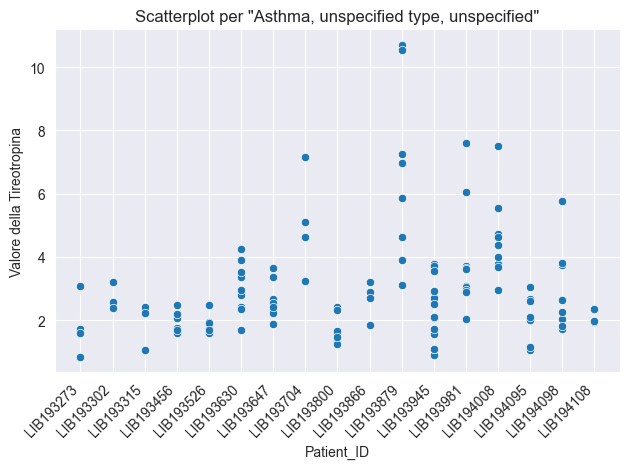

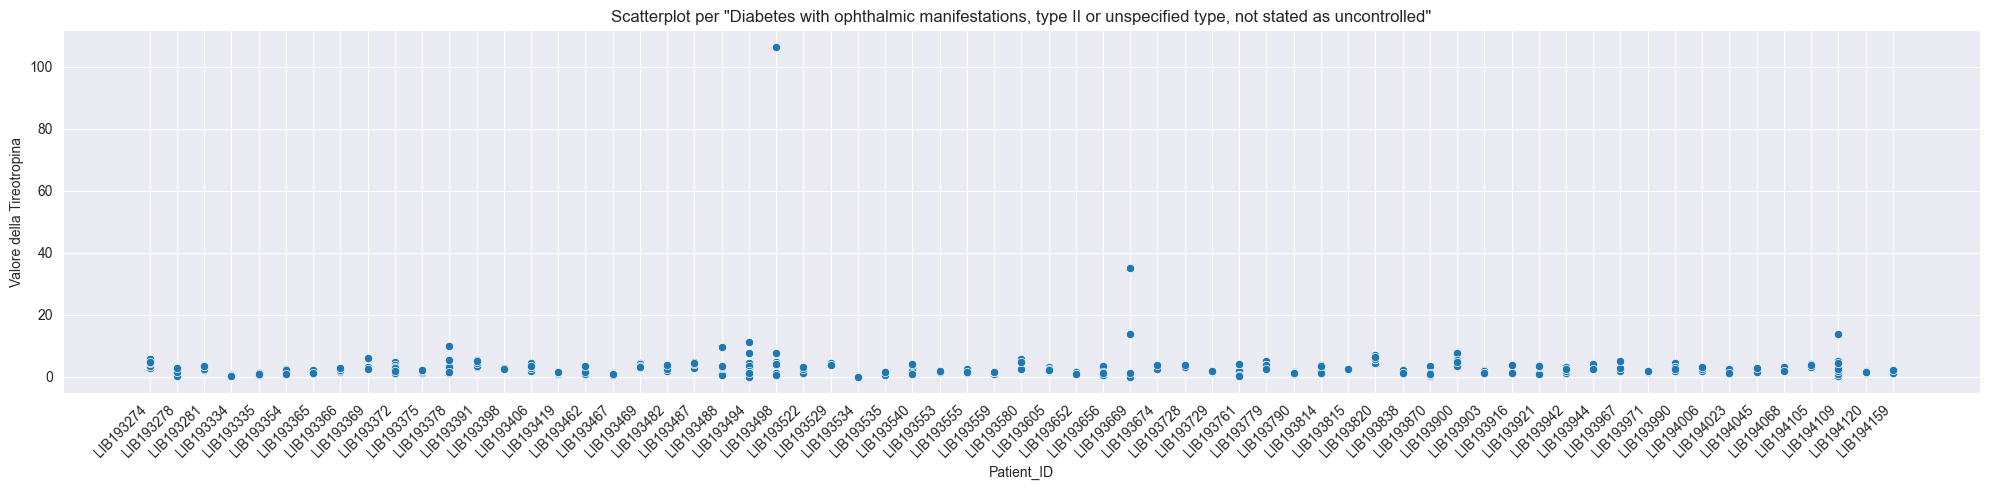

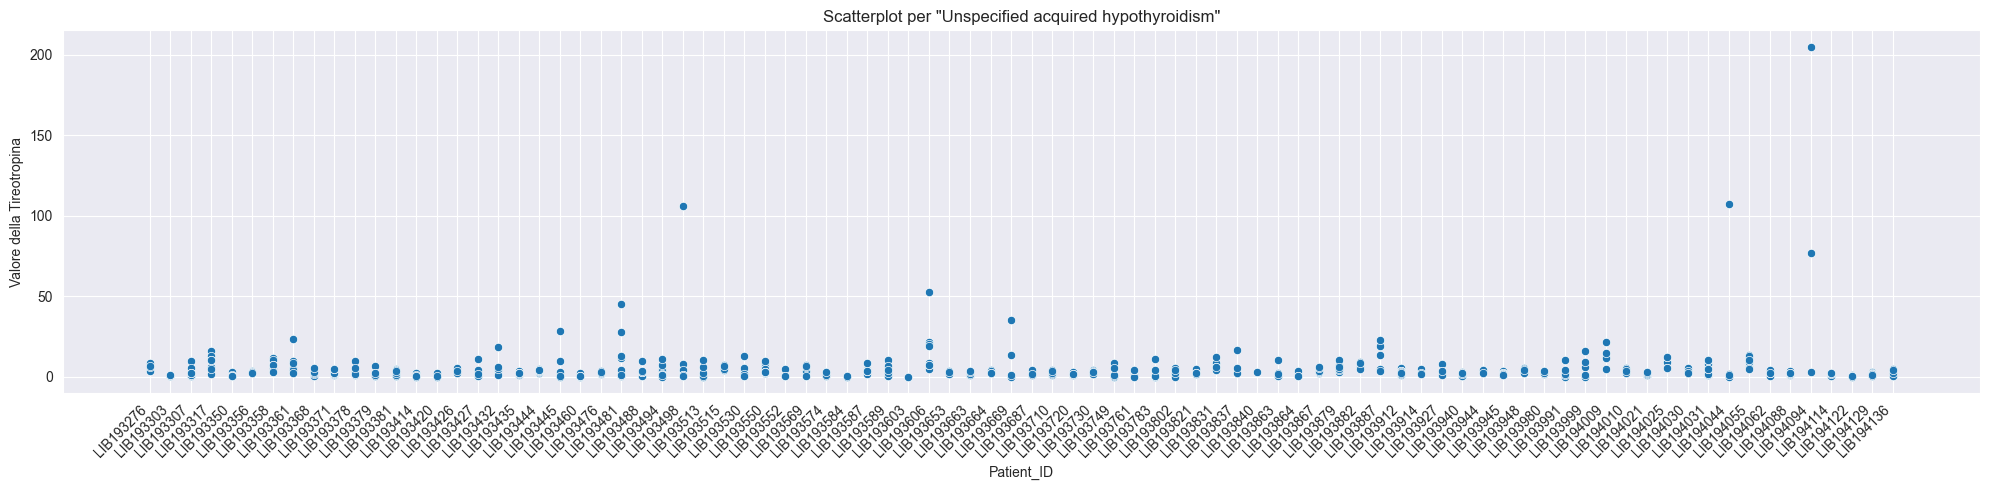

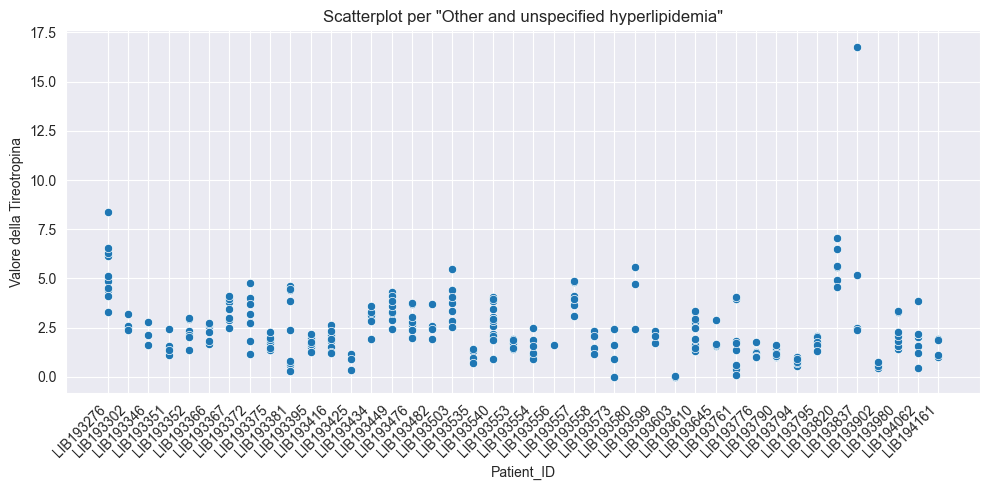

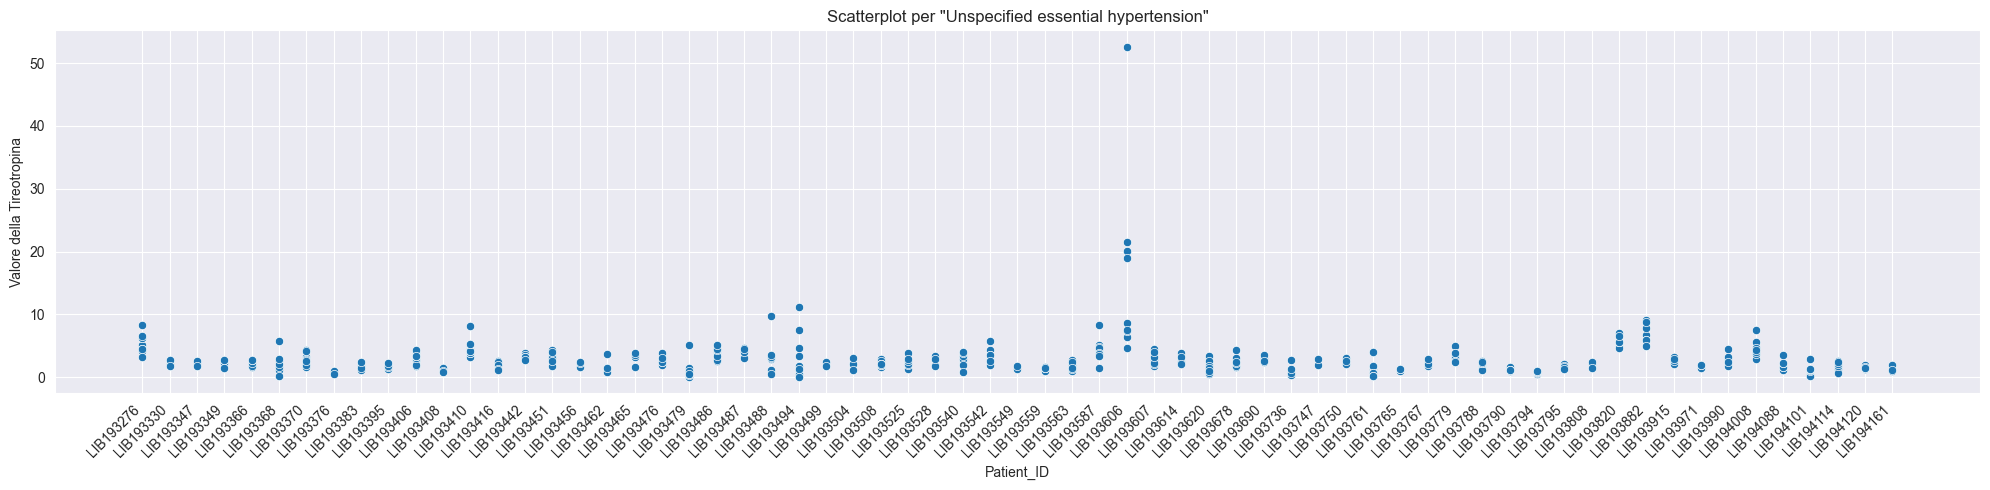

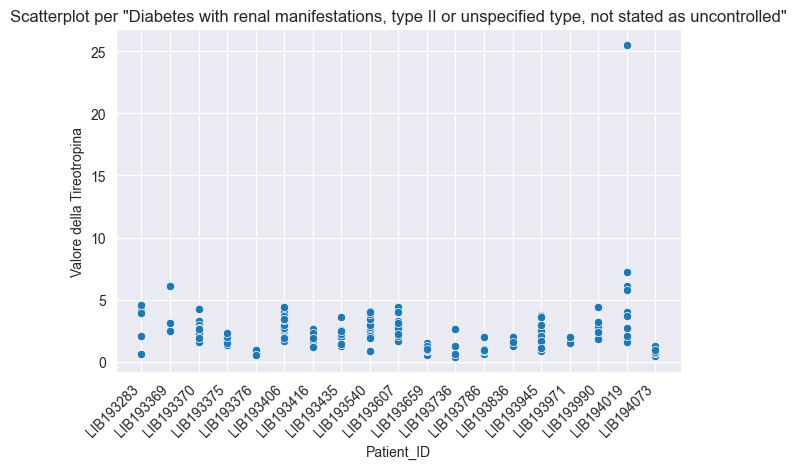

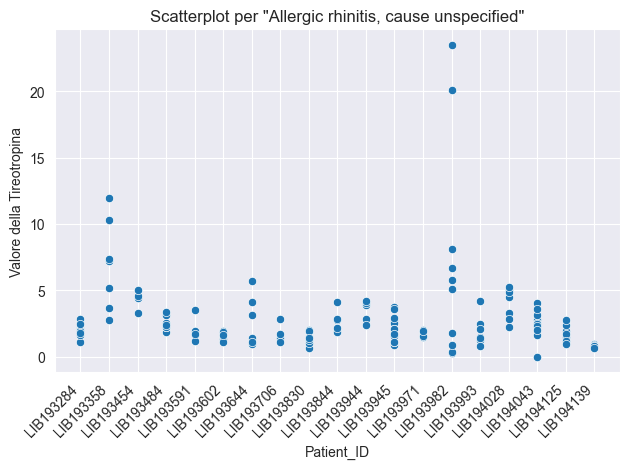

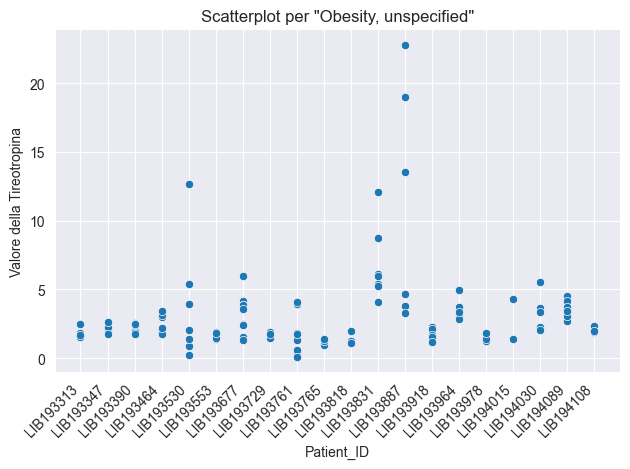

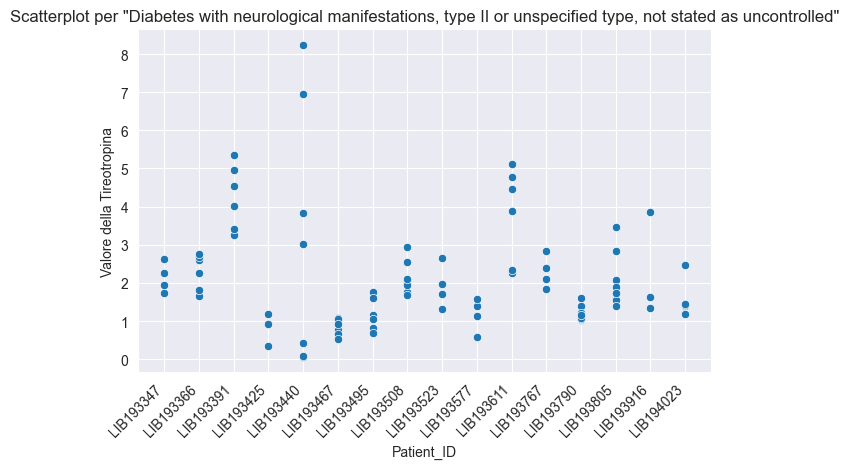

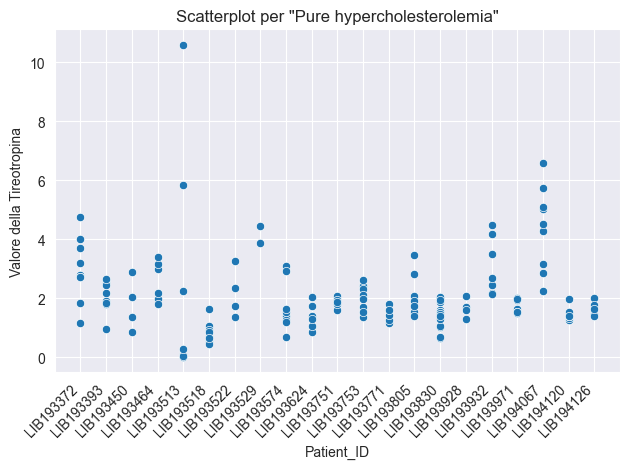

In [100]:
for description in TSH_diagnostic['Description'].unique():
    subset = TSH_diagnostic[TSH_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Tireotropina')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Creatinine (urine)

In [102]:
CreatinineUrine_subset = Biochemical[(Biochemical['Name'] == 'Creatinine (urine)')].copy()
CreatinineUrine_subset.drop(['Name'], axis=1, inplace=True)
CreatinineUrine_subset.describe()

Value
count  4412.000000
mean    114.140306
std      66.798995
min       2.000000
25%      63.162500
50%     101.410000
75%     150.755000
max     543.460000

In [103]:
CreatinineUrine_diagnostic = pd.merge(CreatinineUrine_subset, Diagnostics, on='Patient_ID').copy()
CreatinineUrine_diagnostic.drop(['Code'], axis=1, inplace=True)
CreatinineUrine_diagnostic

Patient_ID Reception_date   Value  \
0      LIB193266     2020-08-24  111.05   
1      LIB193266     2020-08-24  111.05   
2      LIB193266     2021-04-05  216.31   
3      LIB193266     2021-04-05  216.31   
4      LIB193266     2021-11-05  119.47   
...          ...            ...     ...   
12123  LIB194164     2020-12-30  240.41   
12124  LIB194164     2021-02-24  118.46   
12125  LIB194164     2021-04-14   86.38   
12126  LIB194164     2021-09-20  115.52   
12127  LIB194164     2022-01-12  213.53   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
12123  Unspecified abortion, without mention of compl...  
12124  Unspecified abortion, without mention of compl...  
12125  Unspecified abortion, without mention of compl...  
12126  Unspecified abortion, without mention of compl...  
12127  Unspecified abortion, without mention of compl...  

[12128 rows x 4 columns]

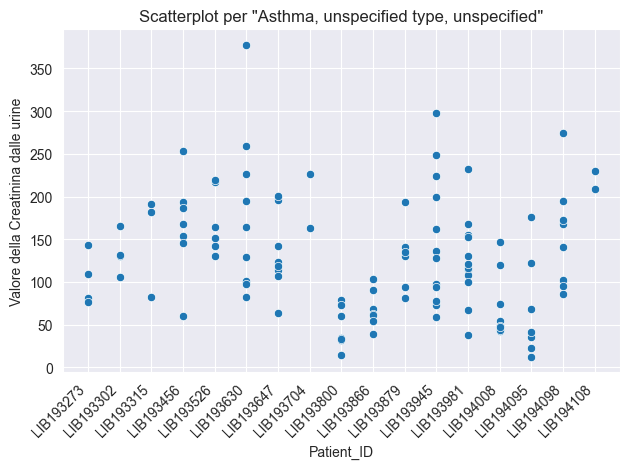

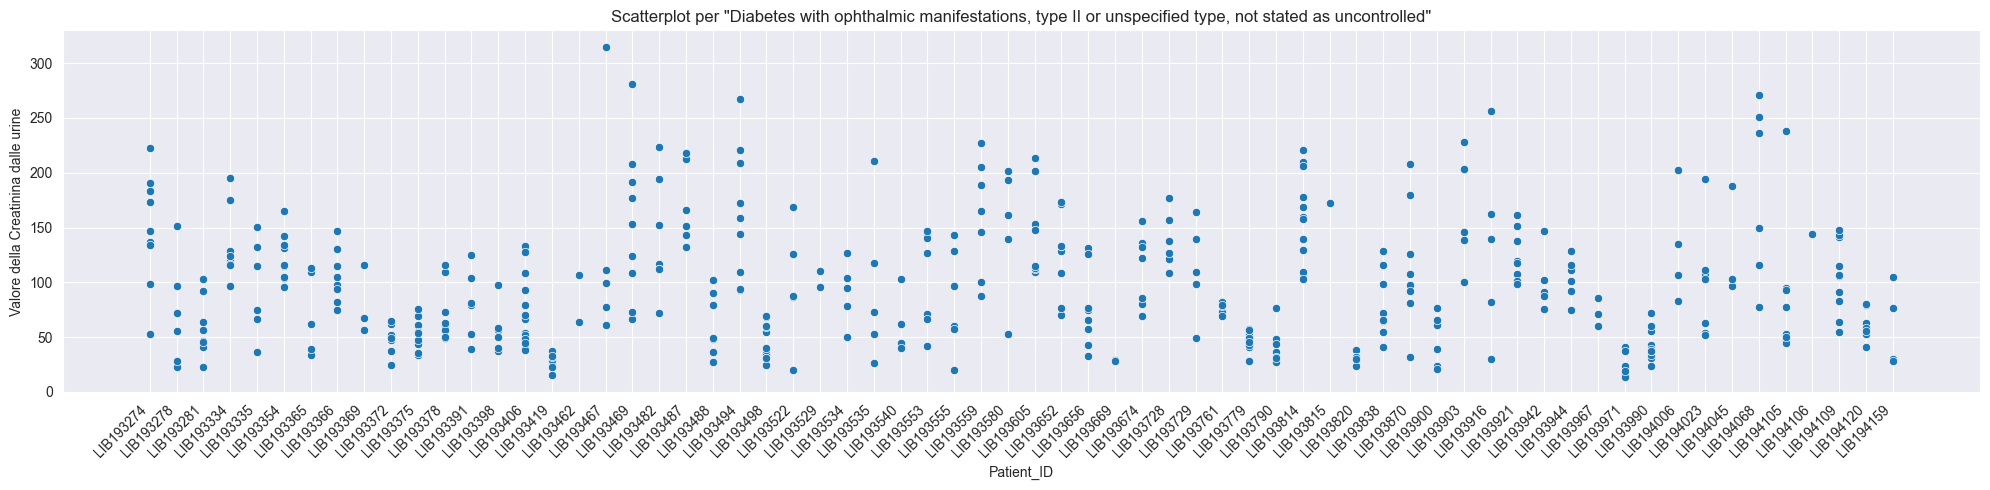

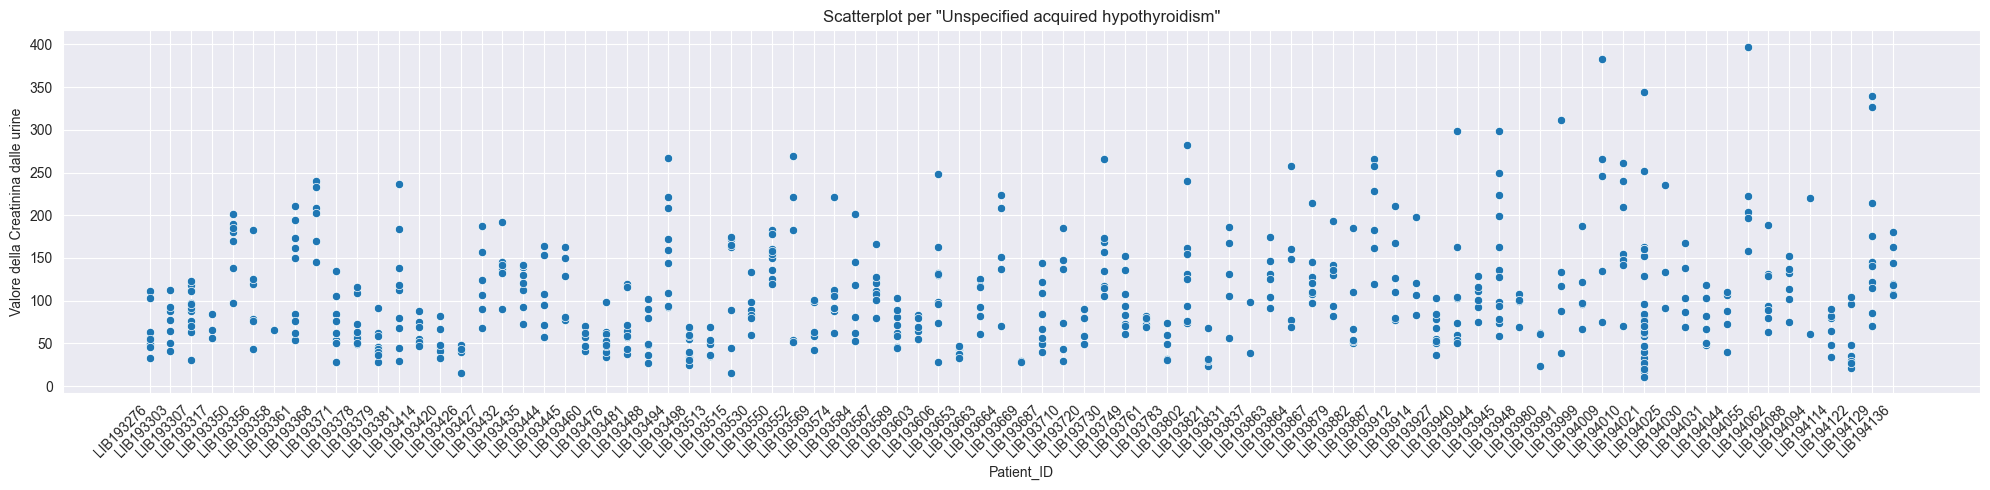

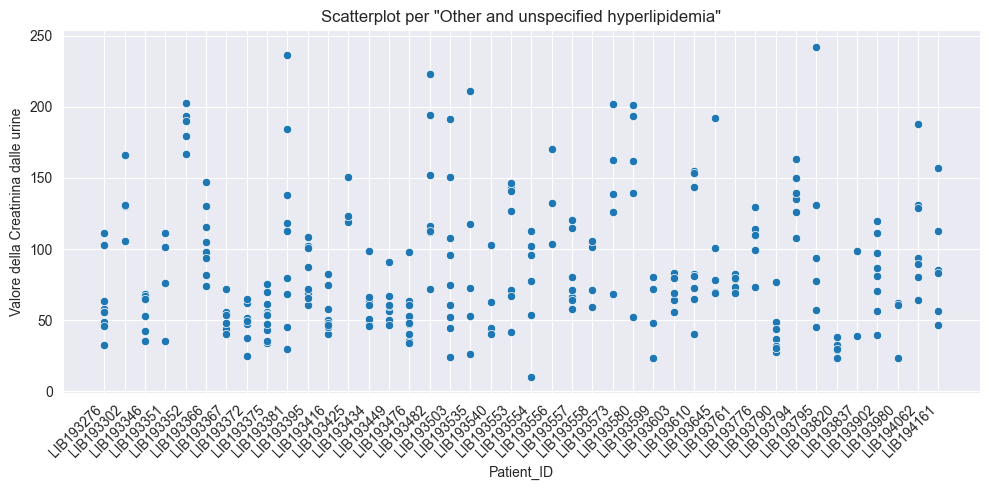

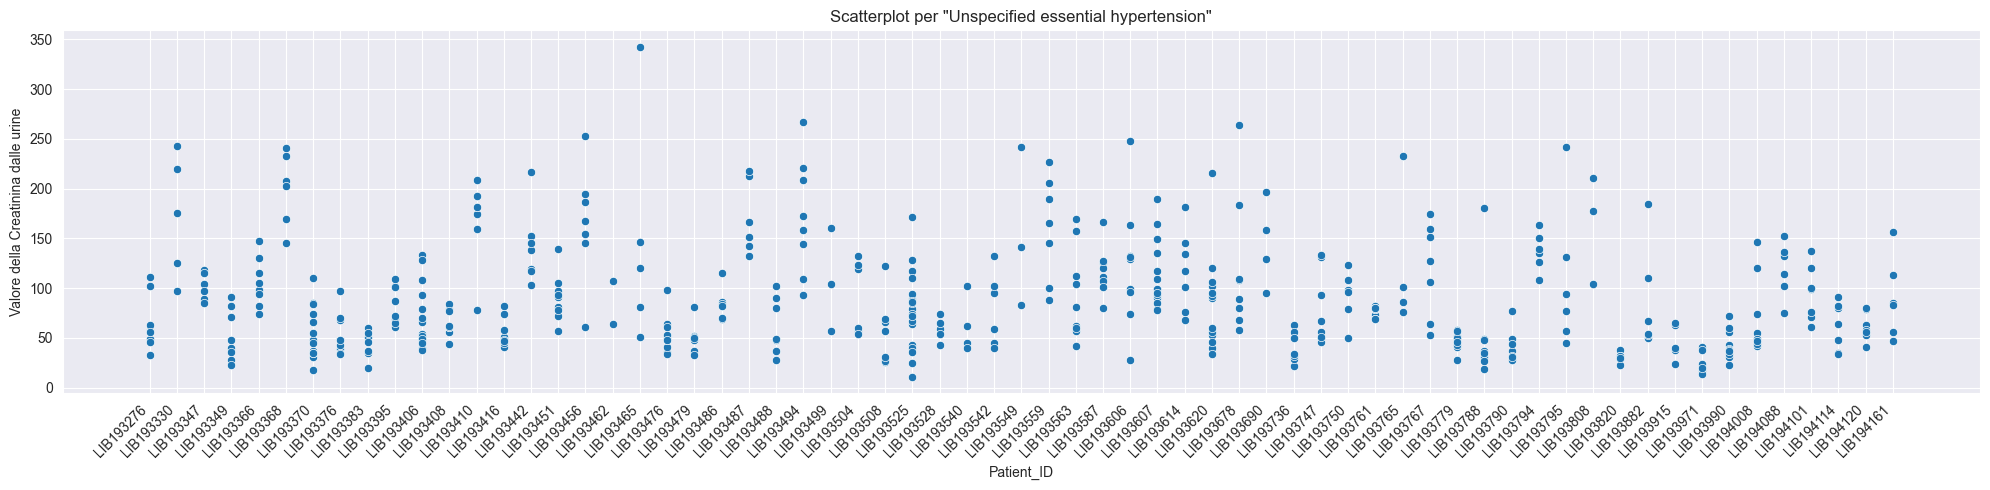

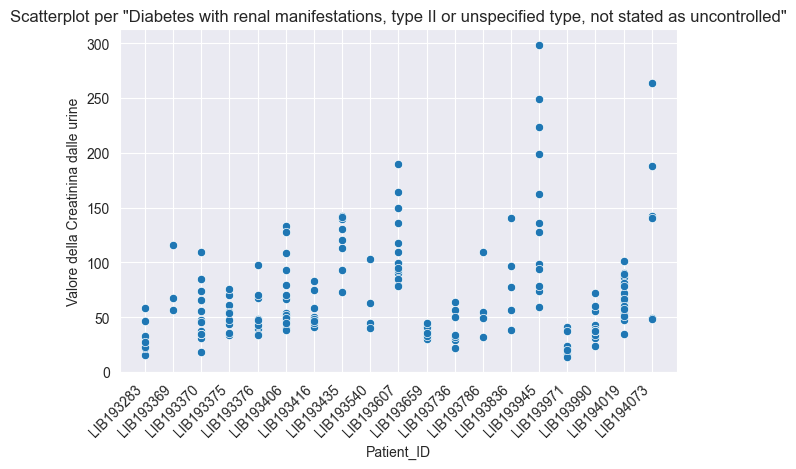

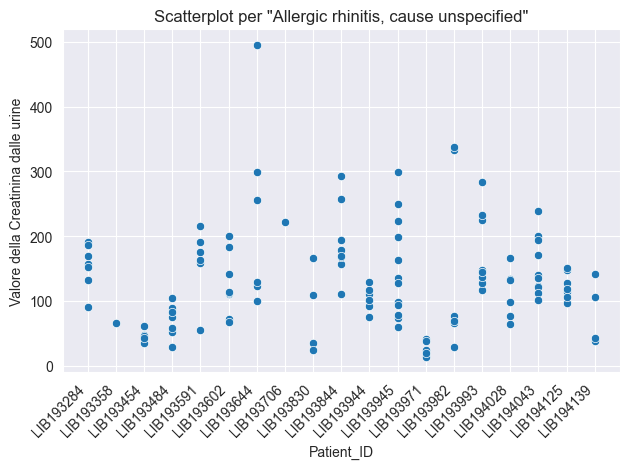

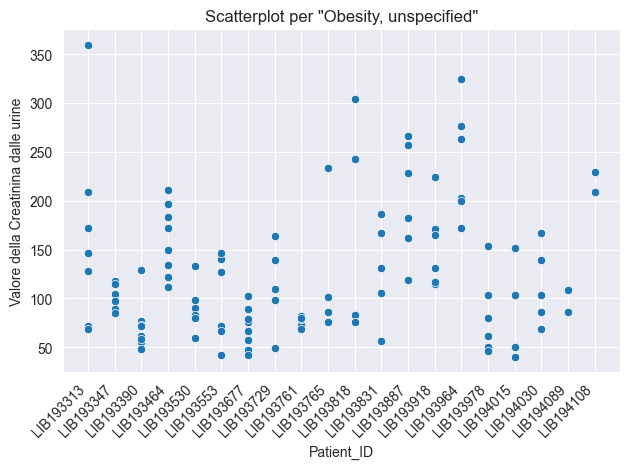

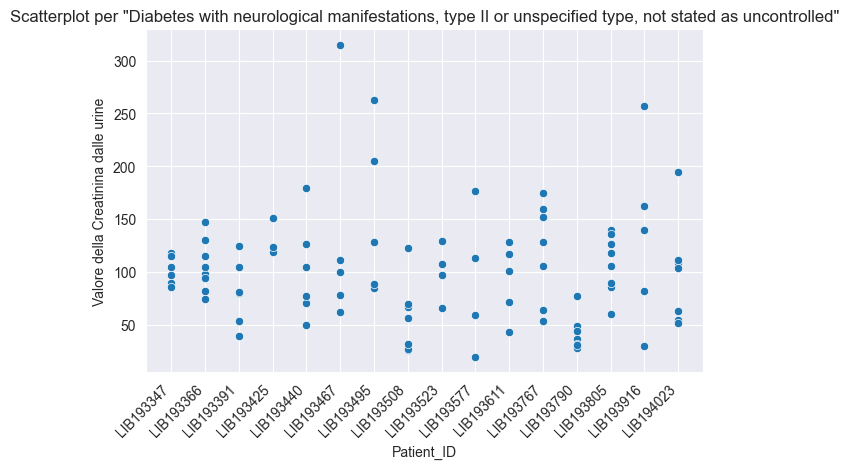

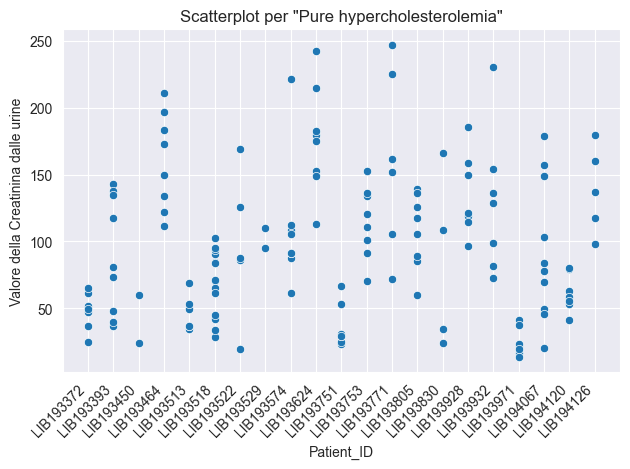

In [104]:
for description in CreatinineUrine_diagnostic['Description'].unique():
    subset = CreatinineUrine_diagnostic[CreatinineUrine_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Creatinina dalle urine')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Albumin (urine)

In [105]:
Albumin_subset = Biochemical[(Biochemical['Name'] == 'Albumin (urine)')].copy()
Albumin_subset.drop(['Name'], axis=1, inplace=True)
Albumin_subset.describe()

Value
count  4283.000000
mean      4.863133
std      26.560691
min       0.010000
25%       0.700000
50%       0.700000
75%       1.260000
max     992.200000

In [106]:
Albumin_diagnostic = pd.merge(Albumin_subset, Diagnostics, on='Patient_ID').copy()
Albumin_diagnostic.drop(['Code'], axis=1, inplace=True)
Albumin_diagnostic

Patient_ID Reception_date  Value  \
0      LIB193266     2020-08-24   0.70   
1      LIB193266     2020-08-24   0.70   
2      LIB193266     2021-04-05   0.70   
3      LIB193266     2021-04-05   0.70   
4      LIB193266     2021-11-05   0.70   
...          ...            ...    ...   
11528  LIB194164     2020-12-30   0.90   
11529  LIB194164     2021-02-24   0.70   
11530  LIB194164     2021-04-14   0.70   
11531  LIB194164     2021-09-20   0.70   
11532  LIB194164     2022-01-12   0.86   

                                             Description  
0                                     Diabetes insipidus  
1                  Other chronic allergic conjunctivitis  
2                                     Diabetes insipidus  
3                  Other chronic allergic conjunctivitis  
4                                     Diabetes insipidus  
...                                                  ...  
11528  Unspecified abortion, without mention of compl...  
11529  Unspecified abortion, without mention of compl...  
11530  Unspecified abortion, without mention of compl...  
11531  Unspecified abortion, without mention of compl...  
11532  Unspecified abortion, without mention of compl...  

[11533 rows x 4 columns]

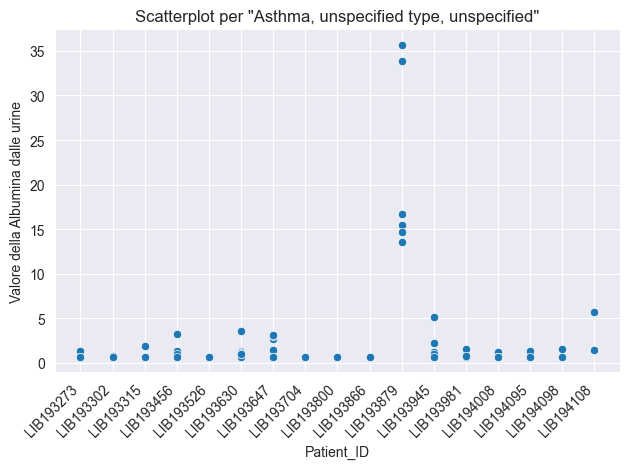

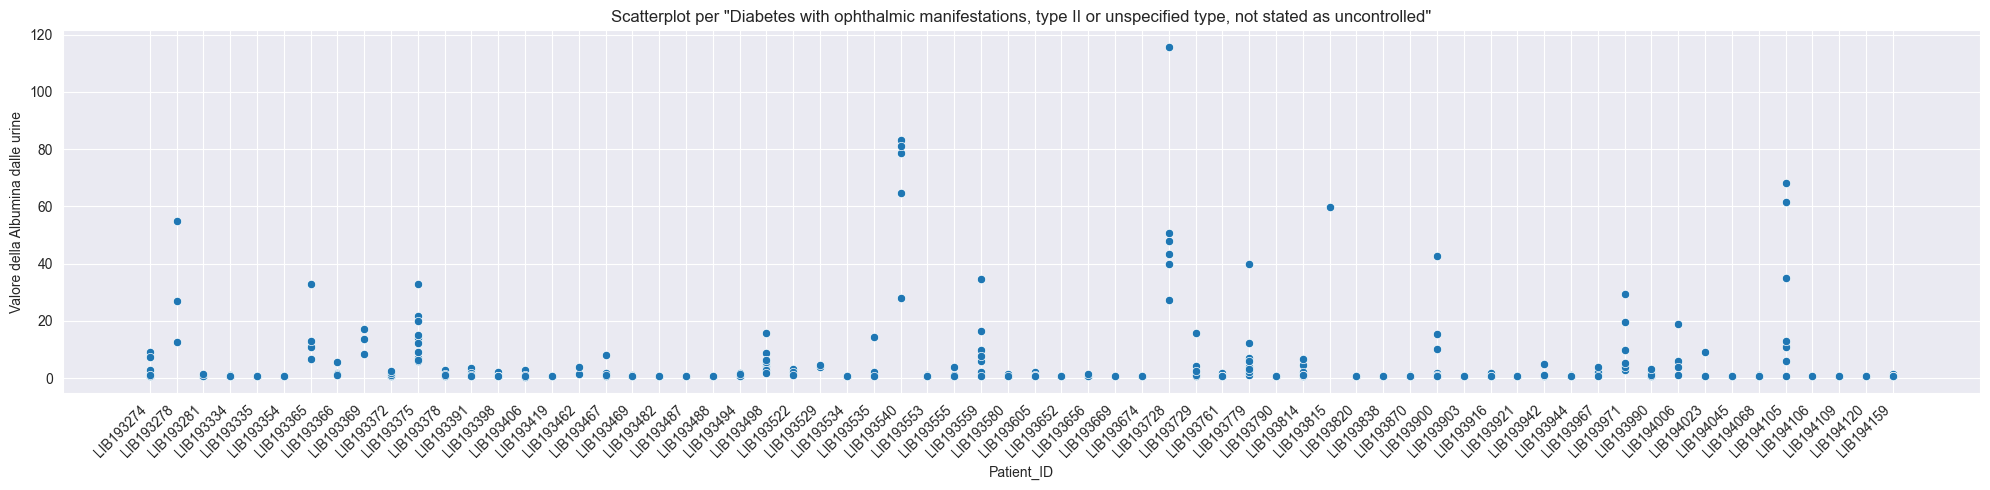

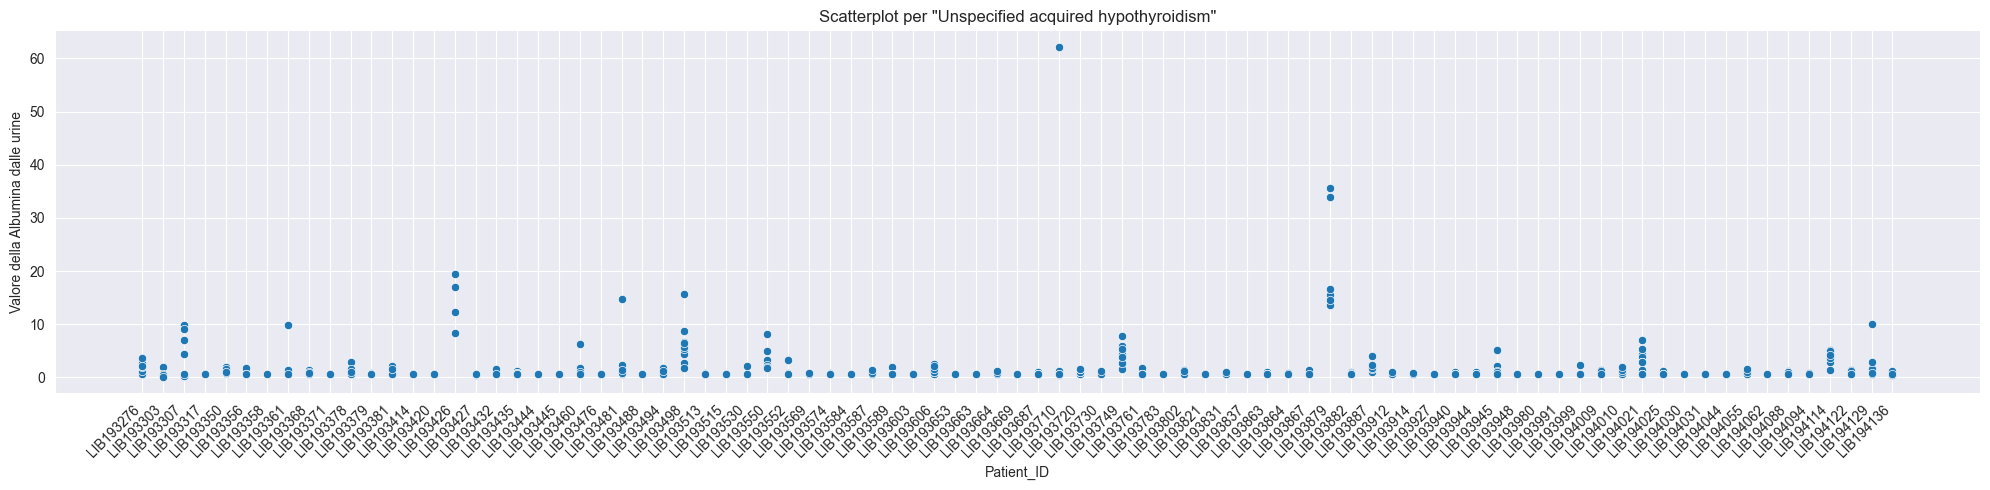

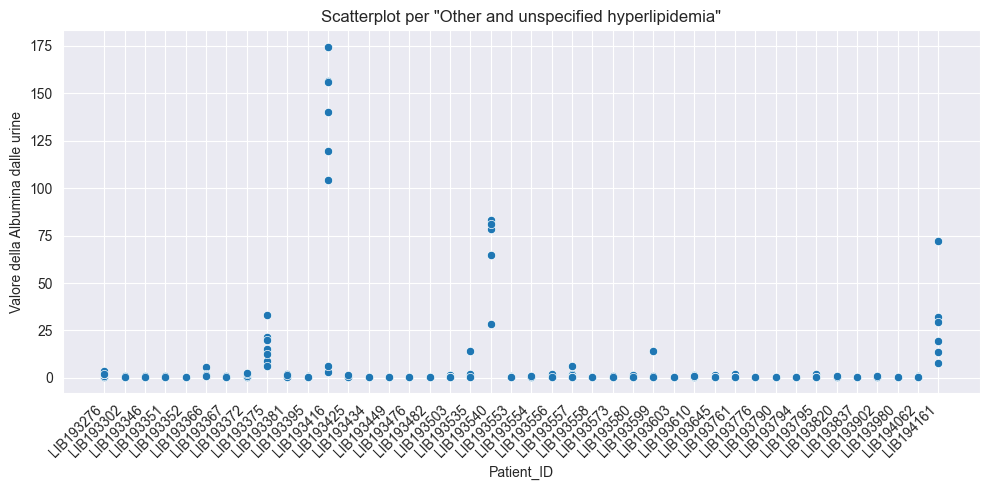

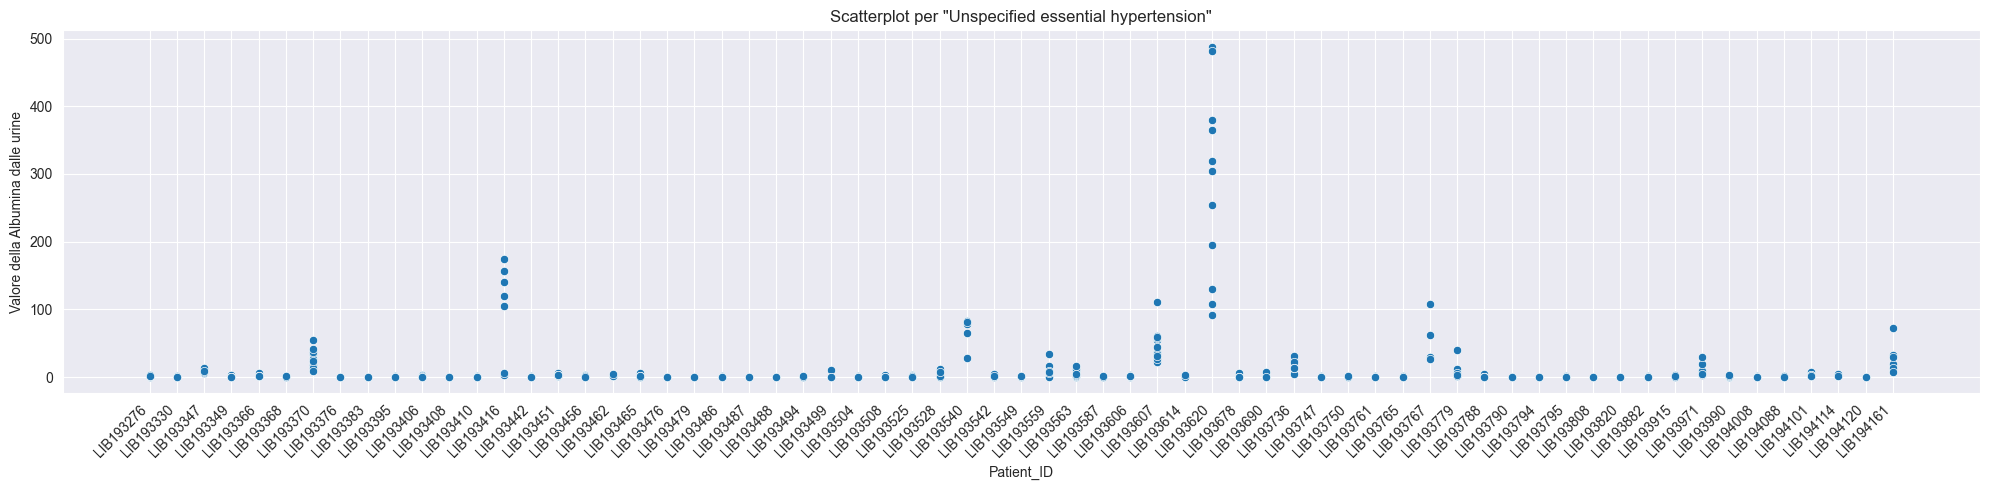

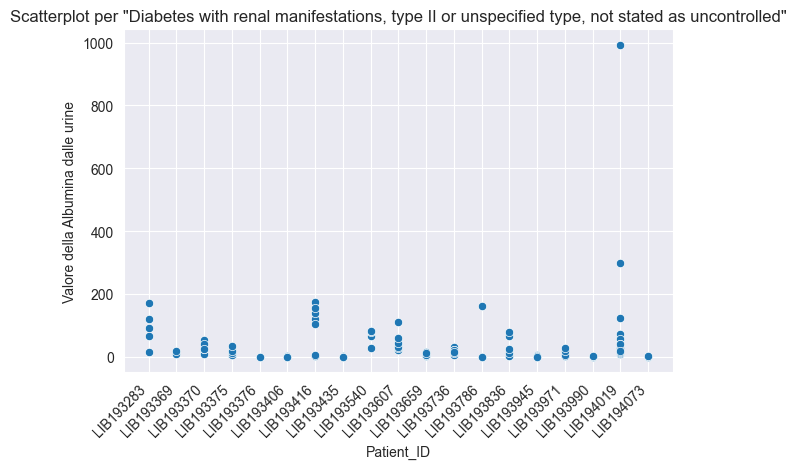

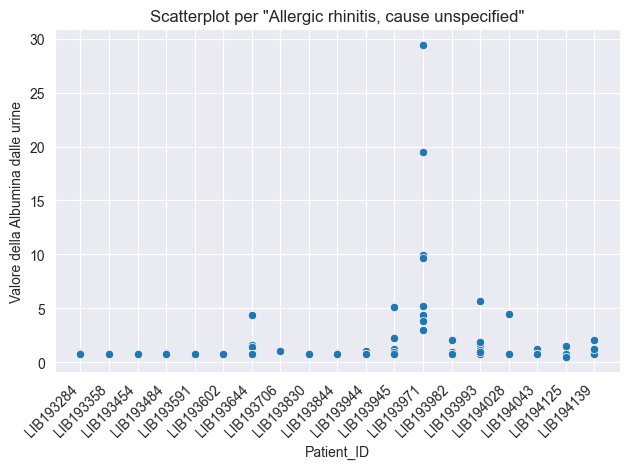

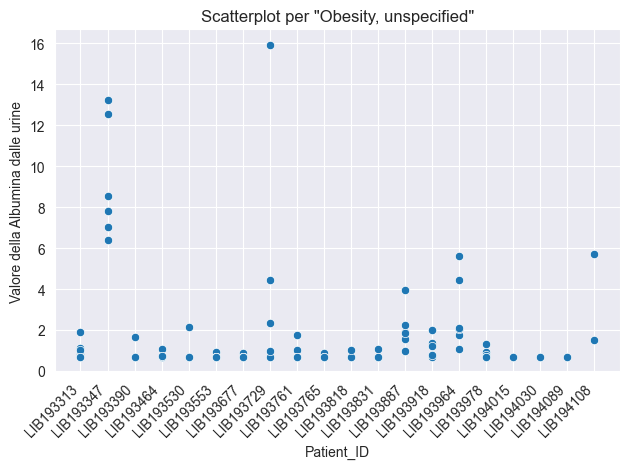

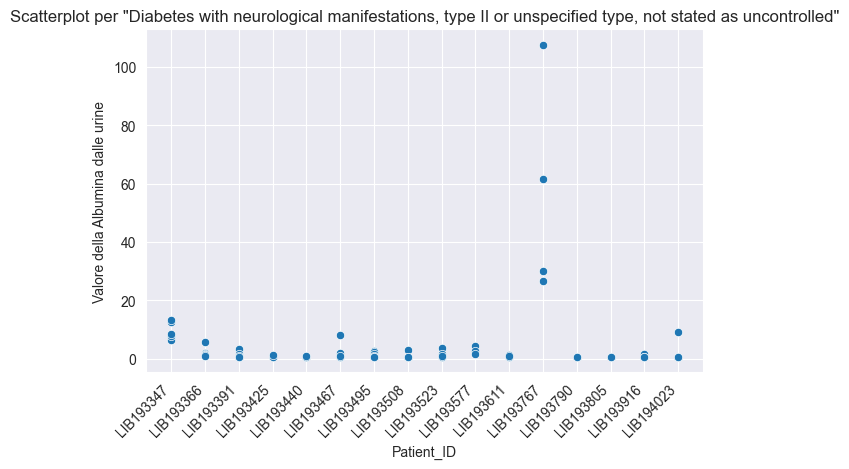

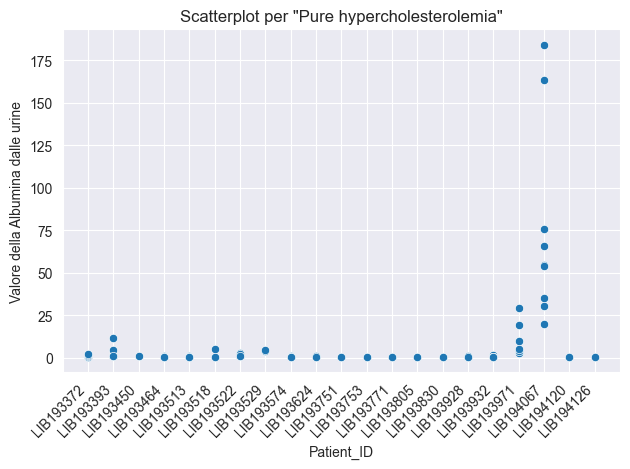

In [107]:
for description in Albumin_diagnostic['Description'].unique():
    subset = Albumin_diagnostic[Albumin_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Albumina dalle urine')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### Chlorine

In [108]:
Chlorine_subset = Biochemical[(Biochemical['Name'] == 'Chlorine')].copy()
Chlorine_subset.drop(['Name'], axis=1, inplace=True)
Chlorine_subset.describe()

Value
count  1935.000000
mean    102.961395
std       5.339634
min      76.000000
25%     100.000000
50%     103.000000
75%     106.000000
max     136.000000

In [116]:
Chlorine_diagnostic = pd.merge(Chlorine_subset, Diagnostics, on='Patient_ID').copy()
Chlorine_diagnostic.drop(['Code'], axis=1, inplace=True)
Chlorine_diagnostic

Patient_ID Reception_date  Value  \
0     LIB193266     2020-08-21  100.0   
1     LIB193266     2020-08-21  100.0   
2     LIB193267     2020-11-09   94.0   
3     LIB193267     2020-11-10  106.0   
4     LIB193273     2018-09-12  103.0   
...         ...            ...    ...   
8652  LIB194164     2021-02-11  103.0   
8653  LIB194164     2021-05-18  108.0   
8654  LIB194164     2021-05-28  108.0   
8655  LIB194164     2021-08-26  100.0   
8656  LIB194164     2021-11-23  105.0   

                                            Description  
0                                    Diabetes insipidus  
1                 Other chronic allergic conjunctivitis  
2                                    Other drug allergy  
3                                    Other drug allergy  
4                                      Chronic rhinitis  
...                                                 ...  
8652  Unspecified abortion, without mention of compl...  
8653  Unspecified abortion, without mention of compl...  
8654  Unspecified abortion, without mention of compl...  
8655  Unspecified abortion, without mention of compl...  
8656  Unspecified abortion, without mention of compl...  

[8657 rows x 4 columns]

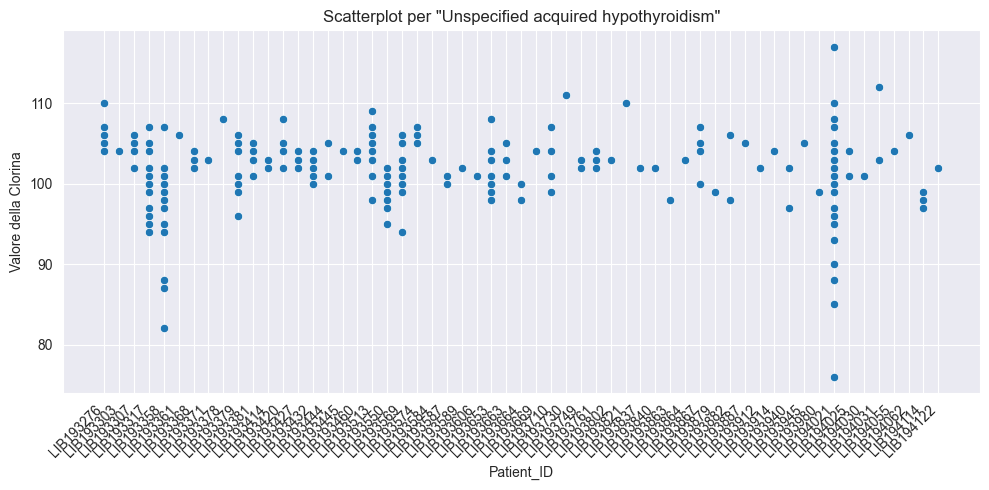

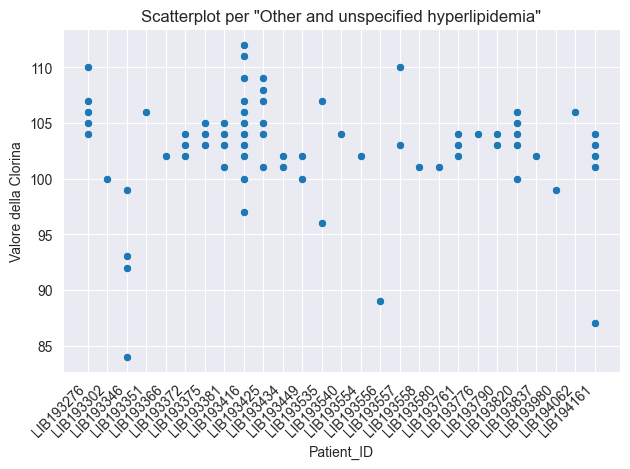

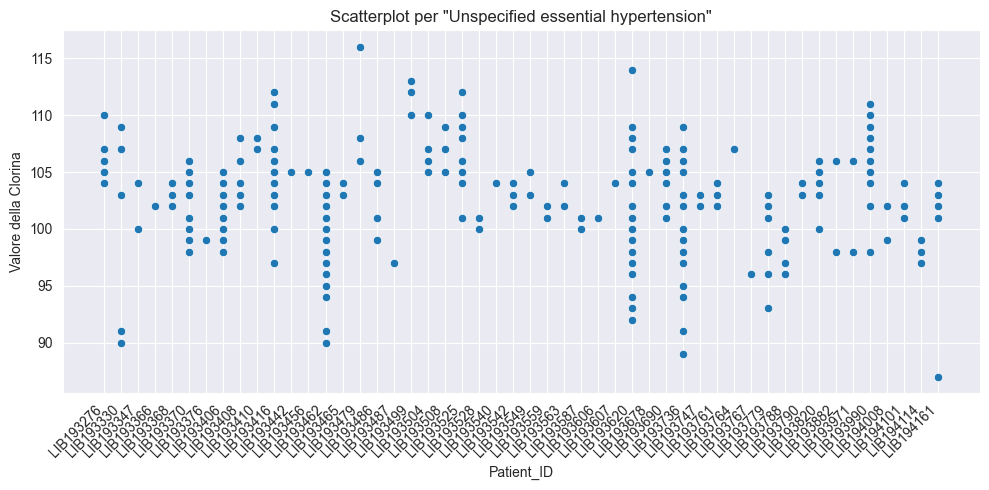

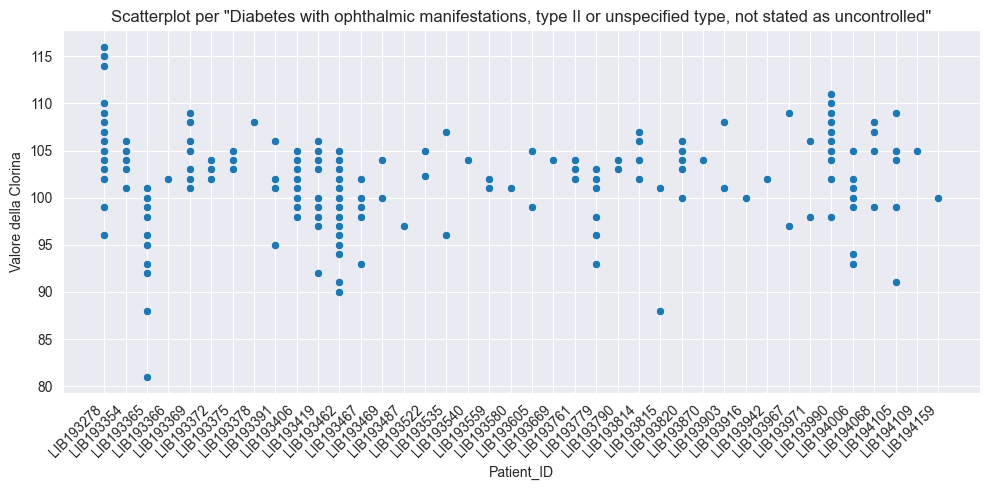

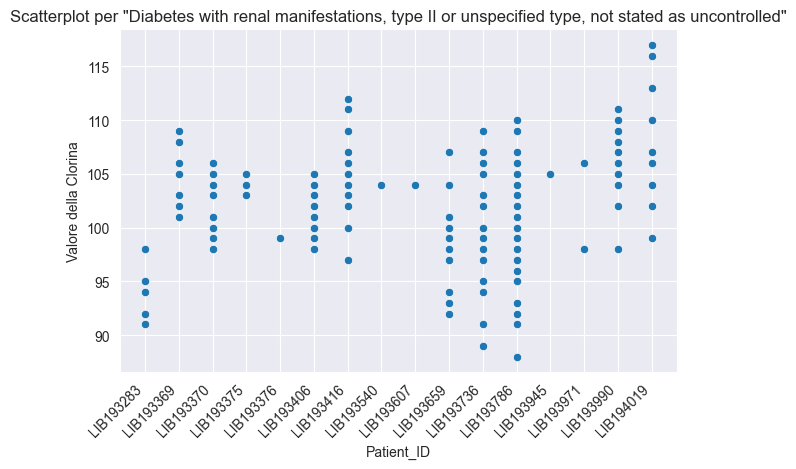

In [117]:
for description in Chlorine_diagnostic['Description'].unique():
    subset = Chlorine_diagnostic[Chlorine_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore della Clorina')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#### IA2 ANTIBODIES

In [112]:
IA2_subset = Biochemical[(Biochemical['Name'] == 'IA2 ANTIBODIES')].copy()
IA2_subset.drop(['Name'], axis=1, inplace=True)
IA2_subset.describe()

Value
count    66.000000
mean    409.637424
std    1237.697950
min       0.210000
25%       0.622500
50%       1.150000
75%      62.095000
max    6446.740000

In [118]:
IA2_diagnostic = pd.merge(IA2_subset, Diagnostics, on='Patient_ID').copy()
IA2_diagnostic.drop(['Code'], axis=1, inplace=True)
IA2_diagnostic

Patient_ID Reception_date  Value  \
0    LIB193277     2018-06-20   0.22   
1    LIB193277     2018-06-20   0.22   
2    LIB193277     2018-06-20   0.22   
3    LIB193281     2019-03-11   0.21   
4    LIB193281     2019-03-11   0.21   
..         ...            ...    ...   
151  LIB194108     2021-12-01  62.49   
152  LIB194108     2021-12-01  62.49   
153  LIB194108     2021-12-01  62.49   
154  LIB194159     2019-10-21  99.39   
155  LIB194159     2019-10-21  99.39   

                                           Description  
0       Venous (peripheral) insufficiency, unspecified  
1                         Routine postpartum follow-up  
2    Follow-up examination, following surgery, unsp...  
3    Diabetes with ophthalmic manifestations, type ...  
4                      Background diabetic retinopathy  
..                                                 ...  
151                               Obesity, unspecified  
152              Asthma, unspecified type, unspecified  
153                              Syphilis, unspecified  
154  Diabetes with ophthalmic manifestations, type ...  
155  Diabetes with unspecified complication, type I...  

[156 rows x 4 columns]

In [123]:
for description in IA2_diagnostic['Description'].unique():
    subset = IA2_diagnostic[IA2_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore degli Anticorpi anti-tirosinchinasi (IA2)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

non esistono grafici con almeno 16 persone che abbiano fatto analisi per questo parametro biochimico

#### Insulin

In [124]:
Insulin_subset = Biochemical[(Biochemical['Name'] == 'Insulin')].copy()
Insulin_subset.drop(['Name'], axis=1, inplace=True)
Insulin_subset.describe()

Value
count   64.000000
mean    22.694688
std     40.537998
min      0.740000
25%      6.537500
50%     10.235000
75%     24.607500
max    298.500000

In [125]:
Insulin_diagnostic = pd.merge(Insulin_subset, Diagnostics, on='Patient_ID').copy()
Insulin_diagnostic.drop(['Code'], axis=1, inplace=True)
Insulin_diagnostic

Patient_ID Reception_date   Value  \
0    LIB193274     2019-05-15   26.82   
1    LIB193274     2019-05-15   26.82   
2    LIB193274     2019-05-15   26.82   
3    LIB193274     2019-05-15   26.82   
4    LIB193319     2018-04-23   15.22   
..         ...            ...     ...   
159  LIB194095     2021-05-06   21.46   
160  LIB194125     2020-06-01    8.60   
161  LIB194125     2020-06-01    8.60   
162  LIB194130     2018-11-21  298.50   
163  LIB194130     2018-11-21  298.50   

                                           Description  
0              Other specified acquired hypothyroidism  
1    Diabetes with ophthalmic manifestations, type ...  
2                               Carpal tunnel syndrome  
3                                  Ocular hypertension  
4    Malignant neoplasm of other endocrine glands a...  
..                                                 ...  
159                         Bereavement, uncomplicated  
160               Allergic rhinitis, cause unspecified  
161                     Lordosis (acquired) (postural)  
162                                         Other acne  
163  Closed fracture of unspecified part of radius ...  

[164 rows x 4 columns]

In [126]:
for description in Insulin_diagnostic['Description'].unique():
    subset = Insulin_diagnostic[Insulin_diagnostic['Description'] == description]
    unique_patients = subset['Patient_ID'].nunique()

    if unique_patients >= 16:
        if 60 > unique_patients >= 30:
            plt.figure(figsize=(10, 5))
        elif unique_patients >= 60:
            plt.figure(figsize=(20, 5))
        else:
            plt.figure()
        sns.scatterplot(x='Patient_ID', y='Value', data=subset)
        plt.title(f'Scatterplot per \"{description}\"')
        plt.xlabel('Patient_ID')
        plt.ylabel('Valore degli Anticorpi anti-tirosinchinasi (IA2)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

non esistono grafici con almeno 16 persone che abbiano fatto analisi per questo parametro biochimico

## Glucouse Measurements

In [20]:
Glucose

Patient_ID Measurement_date Measurement_time  Measurement
0         LIB193263       2020-06-09         19:08:00           99
1         LIB193263       2020-06-09         19:23:00           92
2         LIB193263       2020-06-09         19:38:00           86
3         LIB193263       2020-06-09         19:53:00           85
4         LIB193263       2020-06-09         20:08:00           85
...             ...              ...              ...          ...
22671703  LIB194166       2022-03-17         15:08:00          169
22671704  LIB194166       2022-03-17         15:23:00          206
22671705  LIB194166       2022-03-17         15:38:00          215
22671706  LIB194166       2022-03-17         15:53:00          204
22671707  LIB194166       2022-03-17         16:08:00          199

[22671708 rows x 4 columns]

In [21]:
Glucose.info()
Glucose.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22671708 entries, 0 to 22671707
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Patient_ID        object
 1   Measurement_date  object
 2   Measurement_time  object
 3   Measurement       int64 
dtypes: int64(1), object(3)
memory usage: 691.9+ MB


Measurement
count  2.267171e+07
mean   1.647837e+02
std    7.157474e+01
min    4.000000e+01
25%    1.120000e+02
50%    1.530000e+02
75%    2.060000e+02
max    5.000000e+02

In [22]:
Glucose.describe(include=['O'])

Patient_ID Measurement_date Measurement_time
count    22671708         22671708         22671708
unique        736             1536             1440
top     LIB193554       2022-01-20         07:31:00
freq       137293            45085            16665

In [23]:
nan_mask = Glucose.isna()
nan_count = nan_mask.sum()

nan_count

Patient_ID          0
Measurement_date    0
Measurement_time    0
Measurement         0
dtype: int64